In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import torch
import numpy as np
from utils import label2one_hot, plot_report
from generate_data import generate_data, generate_grid_data
from modules import Dropout
from modules import Linear, Sequential
from modules.losses import LossCrossEntropy, LossMSE
from optimizers import SGD

import networks

In [2]:
def plot_data(points, labels=0, minn=0, maxx=1, radius=1/np.sqrt(2*np.pi), center=np.array([0.5, 0.5])):
    circle = plt.Circle(center, radius, color='r', fill=False, linewidth=5)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.add_patch(circle)
    if torch.is_tensor(points):
        points = points.numpy()
    
    print("points: {} -- points: {}".format(type(points), points.shape))
    ax.scatter(points[:,0], points[:,1], c=labels)
    ax.set_xlim(minn, maxx)
    ax.set_ylim(minn, maxx)

In [3]:
points, labels = generate_data(num_of_points=1000)
points_grid, labels_grid = generate_grid_data(num_of_points_per_dim=51)
print("Points: {} -- labels: {}".format(points.shape, labels.shape))

Points: torch.Size([1000, 2]) -- labels: torch.Size([1000])


points: <class 'numpy.ndarray'> -- points: (1000, 2)


array([0., 1.], dtype=float32)

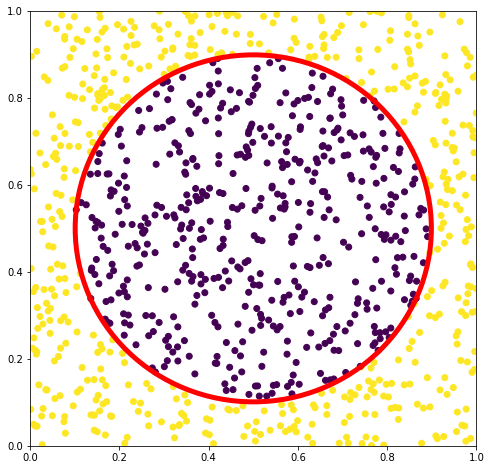

In [4]:
plot_data(points, labels)
np.unique(labels.numpy())

### Test with Categorical Crossentropy

In [18]:
x_all, y_all = generate_data(num_of_points=500)
y_all = label2one_hot(y_all, val=0)  # convert labels to 1-hot encoding

print("x_all.shape: {} -- y_all.shape: {}".format(x_all.shape, y_all.shape))

x_all.shape: torch.Size([500, 2]) -- y_all.shape: torch.Size([500, 2])


In [27]:
model1, report1 = networks.default_net(x_all, y_all, num_of_hidden_layers=1, loss='ce', num_of_neurons=(2, 25, 2), activation='relu', lr=0.1, momentum_coef=0.0, weight_decay=0.0, p_dropout=0.0, num_of_epochs=2000, val_split=0.2, verbose=0)

Added Module Name: 0_Linear 
Added Module Name: 1_ReLU 
Added Module Name: 2_Dropout 
Added Module Name: 3_Linear 
Added Module Name: 4_Softmax 
x_train.shape: torch.Size([400, 2]) -- y_train.shape: torch.Size([400, 2])
x_val.shape: torch.Size([100, 2]) -- y_val.shape: torch.Size([100, 2])


  0%|                                                                                         | 0/2000 [00:00<?, ?it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6905116438865662
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6771668195724487
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6901400685310364
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6762033104896545
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6897624135017395
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.675295

  0%|▏                                                                                | 4/2000 [00:00<01:04, 30.93it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6890062689781189
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6736559271812439
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6886656284332275
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6728904843330383
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6883548498153687
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.672192

  0%|▎                                                                                | 7/2000 [00:00<01:05, 30.49it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6880576610565186
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6715567111968994
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6877684593200684
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6709800958633423
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6874927282333374
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.670444

  1%|▍                                                                               | 11/2000 [00:00<01:05, 30.47it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6869779825210571
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6695020198822021
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6867376565933228
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6690767407417297
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6865019202232361
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.668686

  1%|▌                                                                               | 14/2000 [00:00<01:05, 30.29it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6862713694572449
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.668326199054718
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6860446929931641
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6679868102073669
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6858201026916504
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6676561

  1%|▋                                                                               | 17/2000 [00:00<01:06, 29.90it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6856022477149963
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6673327684402466
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.68538498878479
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6670268177986145
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6851859092712402
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.66675025

  1%|▊                                                                               | 20/2000 [00:00<01:06, 29.82it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6850040555000305
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.666503369808197
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6848466396331787
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6662675738334656
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6847037672996521
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6660557

  1%|▉                                                                               | 23/2000 [00:00<01:06, 29.79it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6845686435699463
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6658614277839661
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6844385266304016
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6656866669654846
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6843136548995972
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.665521

  1%|█                                                                               | 26/2000 [00:00<01:06, 29.74it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.68419349193573
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6653635501861572
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6840792894363403
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6652226448059082
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6839702725410461
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.66508668

  2%|█▏                                                                              | 30/2000 [00:01<01:06, 29.65it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6837669610977173
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6648303866386414
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.683666467666626
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6647093296051025
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6835662722587585
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6645948

  2%|█▎                                                                              | 33/2000 [00:01<01:06, 29.39it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.683470606803894
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.664487898349762
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6833775043487549
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6643837690353394
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6832875609397888
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.66428488

  2%|█▍                                                                              | 36/2000 [00:01<01:06, 29.38it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6831986308097839
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6641900539398193
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6831096410751343
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.664095401763916
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6830207109451294
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6639955

  2%|█▌                                                                              | 39/2000 [00:01<01:07, 29.14it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6829352378845215
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6638954877853394
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6828491687774658
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6637946963310242
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6827614307403564
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.663693

  2%|█▋                                                                              | 43/2000 [00:01<01:06, 29.56it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6825790405273438
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6634812951087952
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6824857592582703
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6633765697479248
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.682391345500946
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6632686

  2%|█▊                                                                              | 46/2000 [00:01<01:06, 29.45it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6822943091392517
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6631584763526917
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6821945905685425
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6630430817604065
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6820951700210571
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.662925

  2%|██                                                                              | 50/2000 [00:01<01:05, 29.59it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6818891763687134
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6626884341239929
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6817827820777893
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.662564218044281
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6816759705543518
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6624450

  3%|██▏                                                                             | 54/2000 [00:01<01:05, 29.77it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6814621686935425
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6622155904769897
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6813560724258423
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6621045470237732
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6812468767166138
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.661994

  3%|██▎                                                                             | 58/2000 [00:01<01:04, 29.97it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6810280680656433
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6617833971977234
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6809160113334656
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6616769433021545
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.680806040763855
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6615746

  3%|██▍                                                                             | 62/2000 [00:02<01:04, 30.08it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6805969476699829
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6613867878913879
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6804905533790588
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6612916588783264
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6803836822509766
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.661194

  3%|██▋                                                                             | 66/2000 [00:02<01:04, 30.00it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6801631450653076
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6609965562820435
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6800514459609985
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6609000563621521
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6799428462982178
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.660807

  4%|██▊                                                                             | 70/2000 [00:02<01:04, 30.05it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6797294616699219
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6606346368789673
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6796172261238098
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6605439186096191
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6795027256011963
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.660451

  4%|██▉                                                                             | 74/2000 [00:02<01:03, 30.17it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6792804002761841
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6602572798728943
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6791664361953735
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6601538062095642
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6790561079978943
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.660054

  4%|███                                                                             | 78/2000 [00:02<01:03, 30.23it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6788359880447388
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6598541736602783
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6787258982658386
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.659756600856781
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6786167025566101
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6596593

  4%|███▎                                                                            | 82/2000 [00:02<01:03, 30.31it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6784194707870483
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6594946384429932
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6783244609832764
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.659416139125824
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6782288551330566
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6593353

  4%|███▍                                                                            | 86/2000 [00:02<01:03, 30.37it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6780417561531067
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6591784954071045
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6779516339302063
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6591057777404785
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6778638362884521
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.659034

  4%|███▌                                                                            | 90/2000 [00:02<01:02, 30.45it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6776924133300781
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6588968634605408
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6776064038276672
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6588284373283386
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6775190830230713
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.658759

  5%|███▊                                                                            | 94/2000 [00:03<01:02, 30.49it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6773434281349182
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.65861976146698
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6772545576095581
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6585481762886047
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6771664619445801
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.65847414

  5%|███▉                                                                            | 98/2000 [00:03<01:02, 30.55it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6769976615905762
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6583429574966431
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6769144535064697
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6582763195037842
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6768322587013245
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.658208

  5%|████                                                                           | 102/2000 [00:03<01:02, 30.57it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6766698360443115
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6580824255943298
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6765881180763245
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6580196619033813
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6765069365501404
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.657955

  5%|████▏                                                                          | 106/2000 [00:03<01:01, 30.64it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6763426065444946
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6578178405761719
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6762624979019165
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6577511429786682
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.676181972026825
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6576839

  6%|████▎                                                                          | 110/2000 [00:03<01:01, 30.70it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6760242581367493
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6575533151626587
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6759461164474487
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6574876308441162
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6758672595024109
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.657420

  6%|████▌                                                                          | 114/2000 [00:03<01:01, 30.76it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6757095456123352
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.657284677028656
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6756316423416138
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6572189331054688
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6755548119544983
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6571531

  6%|████▋                                                                          | 118/2000 [00:03<01:01, 30.85it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6753973960876465
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6570187211036682
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6753179430961609
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6569497585296631
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6752378344535828
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.656880

  6%|████▊                                                                          | 122/2000 [00:03<01:00, 30.90it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6750765442848206
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6567389965057373
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6749953627586365
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6566680669784546
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6749138832092285
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.656596

  6%|████▉                                                                          | 126/2000 [00:04<01:00, 30.94it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6747510433197021
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6564499735832214
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6746686697006226
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6563751697540283
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6745858192443848
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.656299

  6%|█████▏                                                                         | 130/2000 [00:04<01:00, 30.96it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6744189262390137
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.656146228313446
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6743353009223938
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6560690999031067
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6742510795593262
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6559911

  7%|█████▎                                                                         | 134/2000 [00:04<01:00, 31.00it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6740863919258118
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6558404564857483
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6740062236785889
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6557676792144775
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6739251613616943
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.655695

  7%|█████▍                                                                         | 138/2000 [00:04<01:00, 31.03it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6737605929374695
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6555454134941101
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6736781597137451
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6554688215255737
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6735953688621521
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.655393

  7%|█████▌                                                                         | 142/2000 [00:04<00:59, 31.06it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6734300851821899
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6552422046661377
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6733464598655701
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6551646590232849
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6732639074325562
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.655089

  7%|█████▊                                                                         | 146/2000 [00:04<00:59, 31.09it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6730982065200806
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6549402475357056
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6730155348777771
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6548643708229065
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.672931969165802
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6547873

  8%|█████▉                                                                         | 150/2000 [00:04<00:59, 31.13it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6727648377418518
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6546311974525452
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6726816296577454
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6545541882514954
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6725984215736389
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.654477

  8%|██████                                                                         | 154/2000 [00:04<00:59, 31.07it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.672431230545044
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6543225049972534
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6723474264144897
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6542428731918335
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6722627282142639
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6541600

  8%|██████▏                                                                        | 158/2000 [00:05<00:59, 31.20it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.672092080116272
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6539895534515381
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6720063090324402
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6539042592048645
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6719204187393188
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6538186

  8%|██████▍                                                                        | 162/2000 [00:05<00:59, 30.96it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6717491149902344
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6536538600921631
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6716632843017578
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6535709500312805
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6715770959854126
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.653489

  8%|██████▌                                                                        | 166/2000 [00:05<00:59, 31.02it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6714041233062744
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6533260345458984
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6713166832923889
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6532436609268188
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6712293028831482
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.653158

  8%|██████▋                                                                        | 170/2000 [00:05<00:58, 31.08it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6710535287857056
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6529892683029175
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6709651947021484
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6529031991958618
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6708763837814331
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.652816

  9%|██████▊                                                                        | 174/2000 [00:05<00:58, 31.18it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6706984043121338
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6526404023170471
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6706090569496155
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6525532007217407
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.670519232749939
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6524636

  9%|███████                                                                        | 178/2000 [00:05<00:58, 31.22it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6703401803970337
key: train_acc -- value: 0.5450000166893005
key: val_loss -- value: 0.6522834300994873
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6702497005462646
key: train_acc -- value: 0.5475000143051147
key: val_loss -- value: 0.652192234992981
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6701589226722717
key: train_acc -- value: 0.5475000143051147
key: val_loss -- value: 0.6521018

  9%|███████▏                                                                       | 182/2000 [00:05<00:58, 31.24it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6699765920639038
key: train_acc -- value: 0.550000011920929
key: val_loss -- value: 0.6519208550453186
key: val_acc -- value: 0.6499999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6698855757713318
key: train_acc -- value: 0.550000011920929
key: val_loss -- value: 0.651826798915863
key: val_acc -- value: 0.6600000262260437
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6697937250137329
key: train_acc -- value: 0.550000011920929
key: val_loss -- value: 0.6517344713

  9%|███████▎                                                                       | 186/2000 [00:05<00:57, 31.28it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6696093082427979
key: train_acc -- value: 0.5525000095367432
key: val_loss -- value: 0.6515472531318665
key: val_acc -- value: 0.6600000262260437
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6695165038108826
key: train_acc -- value: 0.5525000095367432
key: val_loss -- value: 0.6514533162117004
key: val_acc -- value: 0.6600000262260437
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6694234609603882
key: train_acc -- value: 0.5525000095367432
key: val_loss -- value: 0.651359

 10%|███████▌                                                                       | 190/2000 [00:06<00:57, 31.31it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6692367792129517
key: train_acc -- value: 0.5525000095367432
key: val_loss -- value: 0.6511712074279785
key: val_acc -- value: 0.6600000262260437
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.669142484664917
key: train_acc -- value: 0.5525000095367432
key: val_loss -- value: 0.6510772109031677
key: val_acc -- value: 0.6600000262260437
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6690478324890137
key: train_acc -- value: 0.5525000095367432
key: val_loss -- value: 0.6509824

 10%|███████▋                                                                       | 194/2000 [00:06<00:57, 31.33it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6688581705093384
key: train_acc -- value: 0.5550000071525574
key: val_loss -- value: 0.6507918834686279
key: val_acc -- value: 0.6600000262260437
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6687623858451843
key: train_acc -- value: 0.5550000071525574
key: val_loss -- value: 0.6506966352462769
key: val_acc -- value: 0.6600000262260437
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.668666660785675
key: train_acc -- value: 0.5550000071525574
key: val_loss -- value: 0.6506004

 10%|███████▊                                                                       | 198/2000 [00:06<00:57, 31.35it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6684738397598267
key: train_acc -- value: 0.5550000071525574
key: val_loss -- value: 0.6504056453704834
key: val_acc -- value: 0.6600000262260437
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6683769226074219
key: train_acc -- value: 0.5550000071525574
key: val_loss -- value: 0.6503082513809204
key: val_acc -- value: 0.6600000262260437
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6682795882225037
key: train_acc -- value: 0.5550000071525574
key: val_loss -- value: 0.650208

 10%|███████▉                                                                       | 202/2000 [00:06<00:57, 31.35it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6680843830108643
key: train_acc -- value: 0.5575000047683716
key: val_loss -- value: 0.6500146985054016
key: val_acc -- value: 0.6600000262260437
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6679861545562744
key: train_acc -- value: 0.5575000047683716
key: val_loss -- value: 0.6499178409576416
key: val_acc -- value: 0.6600000262260437
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6678875088691711
key: train_acc -- value: 0.5575000047683716
key: val_loss -- value: 0.649820

 10%|████████▏                                                                      | 206/2000 [00:06<00:57, 31.38it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6676895022392273
key: train_acc -- value: 0.5575000047683716
key: val_loss -- value: 0.6496221423149109
key: val_acc -- value: 0.6600000262260437
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6675897836685181
key: train_acc -- value: 0.5575000047683716
key: val_loss -- value: 0.6495199799537659
key: val_acc -- value: 0.6700000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6674898266792297
key: train_acc -- value: 0.5600000023841858
key: val_loss -- value: 0.649421

 10%|████████▎                                                                      | 210/2000 [00:06<00:57, 31.40it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6672890186309814
key: train_acc -- value: 0.5600000023841858
key: val_loss -- value: 0.649222195148468
key: val_acc -- value: 0.6700000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6671874523162842
key: train_acc -- value: 0.5600000023841858
key: val_loss -- value: 0.6491210460662842
key: val_acc -- value: 0.6700000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6670857071876526
key: train_acc -- value: 0.5649999976158142
key: val_loss -- value: 0.6490204

 11%|████████▍                                                                      | 214/2000 [00:06<00:56, 31.44it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6668817400932312
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 0.6488149166107178
key: val_acc -- value: 0.6700000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6667791604995728
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 0.648712694644928
key: val_acc -- value: 0.6700000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.666675865650177
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 0.64860838

 11%|████████▌                                                                      | 218/2000 [00:06<00:56, 31.46it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6664682626724243
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 0.6484013199806213
key: val_acc -- value: 0.6800000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6663638949394226
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 0.6482966542243958
key: val_acc -- value: 0.6800000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6662591695785522
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 0.648191988

 11%|████████▊                                                                      | 222/2000 [00:07<00:56, 31.49it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6660485863685608
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 0.6479802131652832
key: val_acc -- value: 0.6800000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6659423112869263
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 0.6478724479675293
key: val_acc -- value: 0.6800000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6658358573913574
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 0.647767186

 11%|████████▉                                                                      | 226/2000 [00:07<00:56, 31.51it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6656213402748108
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 0.6475536227226257
key: val_acc -- value: 0.6800000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6655135154724121
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 0.6474470496177673
key: val_acc -- value: 0.6800000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6654053330421448
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 0.647338867

 12%|█████████                                                                      | 230/2000 [00:07<00:56, 31.54it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.665188193321228
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 0.6471176743507385
key: val_acc -- value: 0.6800000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6650791168212891
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 0.6470059752464294
key: val_acc -- value: 0.6800000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.664969801902771
key: train_acc -- value: 0.5824999809265137
key: val_loss -- value: 0.64689874

 12%|█████████▏                                                                     | 234/2000 [00:07<00:55, 31.56it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6647491455078125
key: train_acc -- value: 0.5824999809265137
key: val_loss -- value: 0.6466749310493469
key: val_acc -- value: 0.6899999976158142
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6646382212638855
key: train_acc -- value: 0.5849999785423279
key: val_loss -- value: 0.6465637683868408
key: val_acc -- value: 0.6899999976158142
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6645265817642212
key: train_acc -- value: 0.5849999785423279
key: val_loss -- value: 0.646449

 12%|█████████▍                                                                     | 238/2000 [00:07<00:55, 31.58it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6643033027648926
key: train_acc -- value: 0.5874999761581421
key: val_loss -- value: 0.6462252736091614
key: val_acc -- value: 0.6899999976158142
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6641910672187805
key: train_acc -- value: 0.5874999761581421
key: val_loss -- value: 0.6461168527603149
key: val_acc -- value: 0.6899999976158142
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6640785336494446
key: train_acc -- value: 0.5874999761581421
key: val_loss -- value: 0.646003

 12%|█████████▌                                                                     | 242/2000 [00:07<00:55, 31.60it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6638516783714294
key: train_acc -- value: 0.5950000286102295
key: val_loss -- value: 0.6457805633544922
key: val_acc -- value: 0.699999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6637375354766846
key: train_acc -- value: 0.5950000286102295
key: val_loss -- value: 0.6456693410873413
key: val_acc -- value: 0.699999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6636227965354919
key: train_acc -- value: 0.5950000286102295
key: val_loss -- value: 0.64555823

 12%|█████████▋                                                                     | 246/2000 [00:07<00:55, 31.62it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6633923053741455
key: train_acc -- value: 0.5975000262260437
key: val_loss -- value: 0.6453337669372559
key: val_acc -- value: 0.699999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6632764339447021
key: train_acc -- value: 0.5975000262260437
key: val_loss -- value: 0.6452203392982483
key: val_acc -- value: 0.699999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6631601452827454
key: train_acc -- value: 0.6000000238418579
key: val_loss -- value: 0.64510750

 12%|█████████▉                                                                     | 250/2000 [00:07<00:55, 31.70it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6629259586334229
key: train_acc -- value: 0.6025000214576721
key: val_loss -- value: 0.6448771953582764
key: val_acc -- value: 0.699999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6628082394599915
key: train_acc -- value: 0.6050000190734863
key: val_loss -- value: 0.6447620987892151
key: val_acc -- value: 0.699999988079071
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6626900434494019
key: train_acc -- value: 0.6050000190734863
key: val_loss -- value: 0.64464497

 13%|██████████                                                                     | 254/2000 [00:08<00:55, 31.72it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6624528765678406
key: train_acc -- value: 0.6075000166893005
key: val_loss -- value: 0.6444113850593567
key: val_acc -- value: 0.7099999785423279
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6623337268829346
key: train_acc -- value: 0.6075000166893005
key: val_loss -- value: 0.6442925333976746
key: val_acc -- value: 0.7099999785423279
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6622135043144226
key: train_acc -- value: 0.6075000166893005
key: val_loss -- value: 0.644165

 13%|██████████▏                                                                    | 258/2000 [00:08<00:54, 31.71it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6619726419448853
key: train_acc -- value: 0.6075000166893005
key: val_loss -- value: 0.6439246535301208
key: val_acc -- value: 0.7200000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6618515253067017
key: train_acc -- value: 0.6175000071525574
key: val_loss -- value: 0.6438035368919373
key: val_acc -- value: 0.7200000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6617299914360046
key: train_acc -- value: 0.6175000071525574
key: val_loss -- value: 0.643680

 13%|██████████▎                                                                    | 262/2000 [00:08<00:54, 31.70it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.661485493183136
key: train_acc -- value: 0.6225000023841858
key: val_loss -- value: 0.6434357166290283
key: val_acc -- value: 0.7200000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6613624691963196
key: train_acc -- value: 0.625
key: val_loss -- value: 0.6433099508285522
key: val_acc -- value: 0.7300000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.661238431930542
key: train_acc -- value: 0.625
key: val_loss -- value: 0.6431851983070374
key: val_acc -- v

 13%|██████████▌                                                                    | 266/2000 [00:08<00:54, 31.56it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6609894633293152
key: train_acc -- value: 0.625
key: val_loss -- value: 0.6429331302642822
key: val_acc -- value: 0.7300000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6608641147613525
key: train_acc -- value: 0.625
key: val_loss -- value: 0.6428099274635315
key: val_acc -- value: 0.7300000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.660738468170166
key: train_acc -- value: 0.625
key: val_loss -- value: 0.6426828503608704
key: val_acc -- value: 0.7300

 14%|██████████▋                                                                    | 270/2000 [00:08<00:54, 31.56it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6604843139648438
key: train_acc -- value: 0.6274999976158142
key: val_loss -- value: 0.6424313187599182
key: val_acc -- value: 0.7400000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6603575348854065
key: train_acc -- value: 0.6274999976158142
key: val_loss -- value: 0.6423064470291138
key: val_acc -- value: 0.7400000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.660229504108429
key: train_acc -- value: 0.6299999952316284
key: val_loss -- value: 0.6421793

 14%|██████████▊                                                                    | 274/2000 [00:08<00:54, 31.50it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6599727869033813
key: train_acc -- value: 0.6324999928474426
key: val_loss -- value: 0.6419265270233154
key: val_acc -- value: 0.7400000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6598444581031799
key: train_acc -- value: 0.6324999928474426
key: val_loss -- value: 0.6417993903160095
key: val_acc -- value: 0.7400000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6597142815589905
key: train_acc -- value: 0.6324999928474426
key: val_loss -- value: 0.641670

 14%|██████████▉                                                                    | 278/2000 [00:08<00:54, 31.50it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6594539880752563
key: train_acc -- value: 0.6324999928474426
key: val_loss -- value: 0.6414124965667725
key: val_acc -- value: 0.7400000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6593227982521057
key: train_acc -- value: 0.637499988079071
key: val_loss -- value: 0.6412847638130188
key: val_acc -- value: 0.7400000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6591911315917969
key: train_acc -- value: 0.637499988079071
key: val_loss -- value: 0.64115351

 14%|███████████▏                                                                   | 282/2000 [00:08<00:54, 31.50it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6589270830154419
key: train_acc -- value: 0.637499988079071
key: val_loss -- value: 0.640890896320343
key: val_acc -- value: 0.7400000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6587940454483032
key: train_acc -- value: 0.637499988079071
key: val_loss -- value: 0.6407614350318909
key: val_acc -- value: 0.7400000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.658660888671875
key: train_acc -- value: 0.637499988079071
key: val_loss -- value: 0.64062762260

 14%|███████████▎                                                                   | 286/2000 [00:09<00:54, 31.52it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6583928465843201
key: train_acc -- value: 0.637499988079071
key: val_loss -- value: 0.6403708457946777
key: val_acc -- value: 0.7400000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6582583785057068
key: train_acc -- value: 0.6399999856948853
key: val_loss -- value: 0.6402366161346436
key: val_acc -- value: 0.7400000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6581230163574219
key: train_acc -- value: 0.6399999856948853
key: val_loss -- value: 0.6401047

 14%|███████████▍                                                                   | 290/2000 [00:09<00:54, 31.52it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6578512787818909
key: train_acc -- value: 0.6399999856948853
key: val_loss -- value: 0.639840841293335
key: val_acc -- value: 0.7400000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6577156186103821
key: train_acc -- value: 0.6399999856948853
key: val_loss -- value: 0.6397086977958679
key: val_acc -- value: 0.7400000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6575789451599121
key: train_acc -- value: 0.6399999856948853
key: val_loss -- value: 0.6395757

 15%|███████████▌                                                                   | 294/2000 [00:09<00:54, 31.52it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6573047041893005
key: train_acc -- value: 0.6399999856948853
key: val_loss -- value: 0.6393057107925415
key: val_acc -- value: 0.7400000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6571663022041321
key: train_acc -- value: 0.6399999856948853
key: val_loss -- value: 0.6391727924346924
key: val_acc -- value: 0.75
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6570281386375427
key: train_acc -- value: 0.6424999833106995
key: val_loss -- value: 0.6390397548675537
key

 15%|███████████▊                                                                   | 298/2000 [00:09<00:54, 31.50it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6567497849464417
key: train_acc -- value: 0.6424999833106995
key: val_loss -- value: 0.6387706398963928
key: val_acc -- value: 0.75
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.656609296798706
key: train_acc -- value: 0.6424999833106995
key: val_loss -- value: 0.6386339068412781
key: val_acc -- value: 0.75
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6564689874649048
key: train_acc -- value: 0.6424999833106995
key: val_loss -- value: 0.6384942531585693
key: val_acc -- va

 15%|███████████▉                                                                   | 302/2000 [00:09<00:53, 31.51it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6561868190765381
key: train_acc -- value: 0.6424999833106995
key: val_loss -- value: 0.6382152438163757
key: val_acc -- value: 0.7599999904632568
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6560449004173279
key: train_acc -- value: 0.6424999833106995
key: val_loss -- value: 0.6380760669708252
key: val_acc -- value: 0.7599999904632568
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6559023261070251
key: train_acc -- value: 0.6424999833106995
key: val_loss -- value: 0.637936

 15%|████████████                                                                   | 306/2000 [00:09<00:53, 31.53it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6556156277656555
key: train_acc -- value: 0.6424999833106995
key: val_loss -- value: 0.6376570463180542
key: val_acc -- value: 0.7599999904632568
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6554723381996155
key: train_acc -- value: 0.6424999833106995
key: val_loss -- value: 0.6375169157981873
key: val_acc -- value: 0.7599999904632568
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6553279161453247
key: train_acc -- value: 0.6424999833106995
key: val_loss -- value: 0.637376

 16%|████████████▏                                                                  | 310/2000 [00:09<00:53, 31.57it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6550371646881104
key: train_acc -- value: 0.6474999785423279
key: val_loss -- value: 0.6371007561683655
key: val_acc -- value: 0.7599999904632568
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6548908352851868
key: train_acc -- value: 0.6474999785423279
key: val_loss -- value: 0.6369612812995911
key: val_acc -- value: 0.7699999809265137
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6547450423240662
key: train_acc -- value: 0.6474999785423279
key: val_loss -- value: 0.636813

 16%|████████████▍                                                                  | 314/2000 [00:09<00:53, 31.58it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6544507741928101
key: train_acc -- value: 0.6499999761581421
key: val_loss -- value: 0.6365297436714172
key: val_acc -- value: 0.7699999809265137
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6543033123016357
key: train_acc -- value: 0.6524999737739563
key: val_loss -- value: 0.6363848447799683
key: val_acc -- value: 0.7799999713897705
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.654155433177948
key: train_acc -- value: 0.6524999737739563
key: val_loss -- value: 0.6362418

 16%|████████████▌                                                                  | 318/2000 [00:10<00:53, 31.59it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6538580060005188
key: train_acc -- value: 0.6524999737739563
key: val_loss -- value: 0.6359466910362244
key: val_acc -- value: 0.7799999713897705
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6537085175514221
key: train_acc -- value: 0.6524999737739563
key: val_loss -- value: 0.6358029246330261
key: val_acc -- value: 0.7799999713897705
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6535586714744568
key: train_acc -- value: 0.6549999713897705
key: val_loss -- value: 0.635661

 16%|████████████▋                                                                  | 322/2000 [00:10<00:53, 31.59it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6532576084136963
key: train_acc -- value: 0.6575000286102295
key: val_loss -- value: 0.6353686451911926
key: val_acc -- value: 0.7799999713897705
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6531059741973877
key: train_acc -- value: 0.6575000286102295
key: val_loss -- value: 0.6352244019508362
key: val_acc -- value: 0.7799999713897705
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6529541611671448
key: train_acc -- value: 0.6575000286102295
key: val_loss -- value: 0.635076

 16%|████████████▉                                                                  | 326/2000 [00:10<00:52, 31.59it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6526483297348022
key: train_acc -- value: 0.6600000262260437
key: val_loss -- value: 0.634781002998352
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6524947881698608
key: train_acc -- value: 0.6625000238418579
key: val_loss -- value: 0.6346311569213867
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6523404717445374
key: train_acc -- value: 0.6625000238418579
key: val_loss -- value: 0.6344835

 16%|█████████████                                                                  | 330/2000 [00:10<00:52, 31.62it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6520306468009949
key: train_acc -- value: 0.6650000214576721
key: val_loss -- value: 0.6341809034347534
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6518750786781311
key: train_acc -- value: 0.6650000214576721
key: val_loss -- value: 0.6340321898460388
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6517190337181091
key: train_acc -- value: 0.6650000214576721
key: val_loss -- value: 0.633879

 17%|█████████████▏                                                                 | 334/2000 [00:10<00:52, 31.63it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6514047980308533key: val_loss -- value: 0.6323577761650085
key: val_acc -- value: 0.7900000214576721


 17%|█████████████▌                                                                 | 343/2000 [00:10<00:52, 31.75it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6499636769294739
key: train_acc -- value: 0.6650000214576721
key: val_loss -- value: 0.6322018504142761
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6498003602027893
key: train_acc -- value: 0.6650000214576721
key: val_loss -- value: 0.6320486664772034
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.64963698387146
key: train_acc -- value: 0.6650000214576721
key: val_loss -- value: 0.63189142

 17%|█████████████▋                                                                 | 347/2000 [00:10<00:52, 31.76it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6493082642555237
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.6315787434577942
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6491434574127197
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.6314201354980469
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.648978054523468
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.6312643

 18%|█████████████▊                                                                 | 351/2000 [00:11<00:51, 31.76it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6486453413963318
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.6309511065483093
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6484775543212891
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.6307929158210754
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6483102440834045
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.630635

 18%|██████████████                                                                 | 355/2000 [00:11<00:51, 31.78it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6479726433753967
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.6303165555000305
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6478028297424316
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.6301533579826355
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6476330757141113
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.629997

 18%|██████████████▏                                                                | 359/2000 [00:11<00:51, 31.84it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.647291362285614
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.6296725273132324
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6471189856529236
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.6295070052146912
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6469462513923645
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.6293411

 18%|██████████████▎                                                                | 363/2000 [00:11<00:51, 31.88it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6465979814529419
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.6290163397789001
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6464225053787231
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.6288573741912842
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6462467312812805
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.628692

 18%|██████████████▍                                                                | 367/2000 [00:11<00:51, 31.90it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6458926200866699
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.6283628344535828
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6457151770591736
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.6281945109367371
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6455367803573608
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.628030

 19%|██████████████▋                                                                | 371/2000 [00:11<00:51, 31.89it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6451778411865234
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.6276865601539612
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6449974179267883
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.6275166869163513
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6448159217834473
key: train_acc -- value: 0.6725000143051147
key: val_loss -- value: 0.627341

 19%|██████████████▊                                                                | 375/2000 [00:11<00:50, 31.91it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6444528102874756
key: train_acc -- value: 0.6725000143051147
key: val_loss -- value: 0.626991868019104
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6442701816558838
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.6268168091773987
key: val_acc -- value: 0.7900000214576721
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6440874338150024
key: train_acc -- value: 0.6700000166893005
key: val_loss -- value: 0.6266408

 21%|████████████████▍                                                              | 415/2000 [00:12<00:49, 32.16it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6365917325019836
key: train_acc -- value: 0.6725000143051147
key: val_loss -- value: 0.6196630597114563
key: val_acc -- value: 0.8100000023841858
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6363793015480042
key: train_acc -- value: 0.6725000143051147
key: val_loss -- value: 0.6194672584533691
key: val_acc -- value: 0.8100000023841858
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6361666321754456
key: train_acc -- value: 0.6725000143051147
key: val_loss -- value: 0.619271

 21%|████████████████▌                                                              | 419/2000 [00:13<00:49, 32.19it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.635738730430603
key: train_acc -- value: 0.6725000143051147
key: val_loss -- value: 0.6188663244247437
key: val_acc -- value: 0.8199999928474426
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.635524570941925
key: train_acc -- value: 0.6725000143051147
key: val_loss -- value: 0.6186650991439819
key: val_acc -- value: 0.8199999928474426
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6353091597557068
key: train_acc -- value: 0.675000011920929
key: val_loss -- value: 0.618462502

 21%|████████████████▋                                                              | 423/2000 [00:13<00:48, 32.19it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6348782181739807
key: train_acc -- value: 0.6775000095367432
key: val_loss -- value: 0.6180734038352966
key: val_acc -- value: 0.8199999928474426
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6346620321273804
key: train_acc -- value: 0.6775000095367432
key: val_loss -- value: 0.6178863644599915
key: val_acc -- value: 0.8199999928474426
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6344450116157532
key: train_acc -- value: 0.6775000095367432
key: val_loss -- value: 0.617700

 21%|████████████████▊                                                              | 427/2000 [00:13<00:48, 32.21it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6340091824531555
key: train_acc -- value: 0.6775000095367432
key: val_loss -- value: 0.6173131465911865
key: val_acc -- value: 0.8199999928474426
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6337903738021851
key: train_acc -- value: 0.6800000071525574
key: val_loss -- value: 0.6171218752861023
key: val_acc -- value: 0.8199999928474426
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6335706114768982
key: train_acc -- value: 0.6800000071525574
key: val_loss -- value: 0.616924

 22%|█████████████████                                                              | 431/2000 [00:13<00:48, 32.23it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6331292390823364
key: train_acc -- value: 0.6775000095367432
key: val_loss -- value: 0.6165258884429932
key: val_acc -- value: 0.8199999928474426
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6329073905944824
key: train_acc -- value: 0.6775000095367432
key: val_loss -- value: 0.6163250803947449
key: val_acc -- value: 0.8199999928474426
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6326847672462463
key: train_acc -- value: 0.6775000095367432
key: val_loss -- value: 0.616123

 22%|█████████████████▏                                                             | 435/2000 [00:13<00:48, 32.26it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6322369575500488
key: train_acc -- value: 0.6775000095367432
key: val_loss -- value: 0.6157165765762329
key: val_acc -- value: 0.8199999928474426
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6320125460624695
key: train_acc -- value: 0.6775000095367432
key: val_loss -- value: 0.6155153512954712
key: val_acc -- value: 0.8199999928474426
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6317865252494812
key: train_acc -- value: 0.6775000095367432
key: val_loss -- value: 0.615311

 22%|█████████████████▎                                                             | 439/2000 [00:13<00:48, 32.31it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6313331127166748
key: train_acc -- value: 0.6800000071525574
key: val_loss -- value: 0.6149044036865234
key: val_acc -- value: 0.8199999928474426
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6311053037643433
key: train_acc -- value: 0.6825000047683716
key: val_loss -- value: 0.6146990060806274
key: val_acc -- value: 0.8199999928474426
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6308767199516296
key: train_acc -- value: 0.6825000047683716
key: val_loss -- value: 0.614492

 22%|█████████████████▍                                                             | 443/2000 [00:13<00:48, 32.34it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6304169297218323
key: train_acc -- value: 0.6850000023841858
key: val_loss -- value: 0.6140764951705933
key: val_acc -- value: 0.8100000023841858
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6301863789558411
key: train_acc -- value: 0.6850000023841858
key: val_loss -- value: 0.6138697862625122
key: val_acc -- value: 0.8100000023841858
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6299546957015991
key: train_acc -- value: 0.6850000023841858
key: val_loss -- value: 0.613654

 22%|█████████████████▋                                                             | 447/2000 [00:13<00:47, 32.38it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6294891238212585
key: train_acc -- value: 0.6850000023841858
key: val_loss -- value: 0.6132296919822693
key: val_acc -- value: 0.8100000023841858
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6292548775672913
key: train_acc -- value: 0.6850000023841858
key: val_loss -- value: 0.6130160689353943
key: val_acc -- value: 0.8100000023841858
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6290204524993896
key: train_acc -- value: 0.6850000023841858
key: val_loss -- value: 0.612803

 25%|███████████████████▍                                                           | 491/2000 [00:15<00:46, 32.64it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6184145212173462
key: train_acc -- value: 0.699999988079071
key: val_loss -- value: 0.6031988263130188
key: val_acc -- value: 0.8299999833106995
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6181442141532898
key: train_acc -- value: 0.7024999856948853
key: val_loss -- value: 0.6029560565948486
key: val_acc -- value: 0.8299999833106995
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6178722977638245
key: train_acc -- value: 0.7024999856948853
key: val_loss -- value: 0.6027058

 25%|███████████████████▌                                                           | 495/2000 [00:15<00:46, 32.64it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6173267960548401
key: train_acc -- value: 0.7074999809265137
key: val_loss -- value: 0.6022175550460815
key: val_acc -- value: 0.8299999833106995
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6170526742935181
key: train_acc -- value: 0.7074999809265137
key: val_loss -- value: 0.6019625663757324
key: val_acc -- value: 0.8299999833106995
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6167777180671692
key: train_acc -- value: 0.7074999809265137
key: val_loss -- value: 0.601715

 25%|███████████████████▋                                                           | 499/2000 [00:15<00:45, 32.64it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6162248253822327
key: train_acc -- value: 0.7074999809265137
key: val_loss -- value: 0.6012192964553833
key: val_acc -- value: 0.8299999833106995
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6159468293190002
key: train_acc -- value: 0.7074999809265137
key: val_loss -- value: 0.6009635329246521
key: val_acc -- value: 0.8299999833106995
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6156669855117798
key: train_acc -- value: 0.7074999809265137
key: val_loss -- value: 0.600699

 25%|███████████████████▉                                                           | 504/2000 [00:15<00:45, 32.70it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.614822268486023
key: train_acc -- value: 0.7074999809265137
key: val_loss -- value: 0.5999159812927246
key: val_acc -- value: 0.8299999833106995
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6145389080047607
key: train_acc -- value: 0.7124999761581421
key: val_loss -- value: 0.5996643900871277
key: val_acc -- value: 0.8299999833106995
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.614254891872406
key: train_acc -- value: 0.7149999737739563
key: val_loss -- value: 0.59939855

 25%|████████████████████                                                           | 508/2000 [00:15<00:45, 32.72it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6136845350265503
key: train_acc -- value: 0.7149999737739563
key: val_loss -- value: 0.598889946937561
key: val_acc -- value: 0.8299999833106995
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6133983731269836
key: train_acc -- value: 0.7149999737739563
key: val_loss -- value: 0.5986371636390686
key: val_acc -- value: 0.8399999737739563
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6131117939949036
key: train_acc -- value: 0.7174999713897705
key: val_loss -- value: 0.5983891

 26%|████████████████████▏                                                          | 512/2000 [00:15<00:45, 32.75it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6125359535217285
key: train_acc -- value: 0.7200000286102295
key: val_loss -- value: 0.5978679060935974
key: val_acc -- value: 0.8399999737739563
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6122467517852783
key: train_acc -- value: 0.7200000286102295
key: val_loss -- value: 0.5976042747497559
key: val_acc -- value: 0.8399999737739563
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6119566559791565
key: train_acc -- value: 0.7200000286102295
key: val_loss -- value: 0.597342

 26%|████████████████████▍                                                          | 516/2000 [00:15<00:45, 32.79it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6113733053207397
key: train_acc -- value: 0.7225000262260437
key: val_loss -- value: 0.5968058109283447
key: val_acc -- value: 0.8399999737739563
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6110796928405762
key: train_acc -- value: 0.7225000262260437
key: val_loss -- value: 0.5965254306793213
key: val_acc -- value: 0.8399999737739563
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6107856631278992
key: train_acc -- value: 0.7275000214576721
key: val_loss -- value: 0.596272

 26%|████████████████████▌                                                          | 520/2000 [00:15<00:45, 32.81it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.610192060470581
key: train_acc -- value: 0.7275000214576721
key: val_loss -- value: 0.5957136154174805
key: val_acc -- value: 0.8600000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.6098942756652832
key: train_acc -- value: 0.7300000190734863
key: val_loss -- value: 0.5954365134239197
key: val_acc -- value: 0.8600000143051147
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([4

 28%|██████████████████████▏                                                        | 561/2000 [00:16<00:43, 33.00it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5970705151557922
key: train_acc -- value: 0.7774999737739563
key: val_loss -- value: 0.5837294459342957
key: val_acc -- value: 0.8799999952316284
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5967185497283936
key: train_acc -- value: 0.7774999737739563
key: val_loss -- value: 0.5834085941314697
key: val_acc -- value: 0.8799999952316284
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5963644981384277
key: train_acc -- value: 0.7799999713897705
key: val_loss -- value: 0.583080

 28%|██████████████████████▎                                                        | 565/2000 [00:17<00:43, 33.00it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5956470370292664
key: train_acc -- value: 0.7799999713897705
key: val_loss -- value: 0.5824158191680908
key: val_acc -- value: 0.8899999856948853
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5952857732772827
key: train_acc -- value: 0.7799999713897705
key: val_loss -- value: 0.582079291343689
key: val_acc -- value: 0.8899999856948853
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5949229598045349
key: train_acc -- value: 0.7825000286102295
key: val_loss -- value: 0.5817463

 28%|██████████████████████▍                                                        | 569/2000 [00:17<00:43, 33.00it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5941924452781677
key: train_acc -- value: 0.7825000286102295
key: val_loss -- value: 0.5810751914978027
key: val_acc -- value: 0.8899999856948853
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5938270092010498
key: train_acc -- value: 0.7825000286102295
key: val_loss -- value: 0.580729603767395
key: val_acc -- value: 0.8899999856948853
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5934591293334961
key: train_acc -- value: 0.7825000286102295
key: val_loss -- value: 0.5803951

 29%|██████████████████████▋                                                        | 573/2000 [00:17<00:43, 33.02it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5927249193191528
key: train_acc -- value: 0.7850000262260437
key: val_loss -- value: 0.5797314643859863
key: val_acc -- value: 0.8899999856948853
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5923600792884827
key: train_acc -- value: 0.7875000238418579
key: val_loss -- value: 0.5793920755386353
key: val_acc -- value: 0.8899999856948853
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5919952988624573
key: train_acc -- value: 0.7900000214576721
key: val_loss -- value: 0.579085

 29%|██████████████████████▊                                                        | 577/2000 [00:17<00:43, 33.05it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5912696719169617
key: train_acc -- value: 0.7925000190734863
key: val_loss -- value: 0.5784449577331543
key: val_acc -- value: 0.8899999856948853
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5909072756767273
key: train_acc -- value: 0.7925000190734863
key: val_loss -- value: 0.5781351327896118
key: val_acc -- value: 0.8899999856948853
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5905431509017944
key: train_acc -- value: 0.7925000190734863
key: val_loss -- value: 0.577820

 29%|██████████████████████▉                                                        | 581/2000 [00:17<00:42, 33.07it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5898115038871765
key: train_acc -- value: 0.7950000166893005
key: val_loss -- value: 0.5771806836128235
key: val_acc -- value: 0.8899999856948853
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5894463658332825
key: train_acc -- value: 0.7950000166893005
key: val_loss -- value: 0.5768564343452454
key: val_acc -- value: 0.8899999856948853
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.589081346988678
key: train_acc -- value: 0.7975000143051147
key: val_loss -- value: 0.5765457

 29%|███████████████████████                                                        | 585/2000 [00:17<00:42, 33.10it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5883508920669556
key: train_acc -- value: 0.800000011920929
key: val_loss -- value: 0.5758979916572571
key: val_acc -- value: 0.8899999856948853
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5879858136177063
key: train_acc -- value: 0.8025000095367432
key: val_loss -- value: 0.575584352016449
key: val_acc -- value: 0.8899999856948853
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5876195430755615
key: train_acc -- value: 0.8050000071525574
key: val_loss -- value: 0.57525557

 29%|███████████████████████▎                                                       | 589/2000 [00:17<00:42, 33.13it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5868863463401794
key: train_acc -- value: 0.8075000047683716
key: val_loss -- value: 0.5746089816093445
key: val_acc -- value: 0.8899999856948853
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5865185260772705
key: train_acc -- value: 0.8100000023841858
key: val_loss -- value: 0.5742910504341125
key: val_acc -- value: 0.8899999856948853
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5861494541168213
key: train_acc -- value: 0.8125
key: val_loss -- value: 0.5739660263061523
k

 30%|███████████████████████▍                                                       | 593/2000 [00:17<00:42, 33.15it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5854108333587646
key: train_acc -- value: 0.8199999928474426
key: val_loss -- value: 0.5733286142349243
key: val_acc -- value: 0.8899999856948853
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  -- torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.570837140083313
key: train_acc -- value: 0.8475000262260437
key: val_loss -- value: 0.5605196952819824
key: val_acc -- value: 0.8999999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5704421997070312
key: train_acc -- value: 0.8475000262260437
key: val

 32%|█████████████████████████                                                      | 633/2000 [00:19<00:41, 33.30it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5700462460517883
key: train_acc -- value: 0.8475000262260437
key: val_loss -- value: 0.5598189830780029
key: val_acc -- value: 0.8999999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5696496963500977
key: train_acc -- value: 0.8475000262260437
key: val_loss -- value: 0.5594683289527893
key: val_acc -- value: 0.8999999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5692522525787354
key: train_acc -- value: 0.8475000262260437
key: val_loss -- value: 0.559119

 32%|█████████████████████████▏                                                     | 637/2000 [00:19<00:40, 33.29it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5684554576873779
key: train_acc -- value: 0.8475000262260437
key: val_loss -- value: 0.558407723903656
key: val_acc -- value: 0.8999999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5680561065673828
key: train_acc -- value: 0.8500000238418579
key: val_loss -- value: 0.5580465793609619
key: val_acc -- value: 0.8999999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.567655622959137
key: train_acc -- value: 0.8525000214576721
key: val_loss -- value: 0.55769813

 32%|█████████████████████████▎                                                     | 641/2000 [00:19<00:40, 33.32it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5668538212776184
key: train_acc -- value: 0.8525000214576721
key: val_loss -- value: 0.5569913983345032
key: val_acc -- value: 0.8999999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5664514899253845
key: train_acc -- value: 0.8525000214576721
key: val_loss -- value: 0.556650698184967
key: val_acc -- value: 0.8999999761581421
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5660489201545715
key: train_acc -- value: 0.8525000214576721
key: val_loss -- value: 0.5562855

 32%|█████████████████████████▍                                                     | 645/2000 [00:19<00:40, 33.34it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.565241277217865
key: train_acc -- value: 0.8550000190734863
key: val_loss -- value: 0.5556056499481201
key: val_acc -- value: 0.9100000262260437
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5648362636566162
key: train_acc -- value: 0.8575000166893005
key: val_loss -- value: 0.5552527904510498
key: val_acc -- value: 0.9100000262260437
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5644304156303406
key: train_acc -- value: 0.8575000166893005
key: val_loss -- value: 0.5548935

 32%|█████████████████████████▋                                                     | 649/2000 [00:19<00:40, 33.35it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.563616931438446
key: train_acc -- value: 0.8600000143051147
key: val_loss -- value: 0.5541892051696777
key: val_acc -- value: 0.9100000262260437
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5632089376449585
key: train_acc -- value: 0.8600000143051147
key: val_loss -- value: 0.5538458824157715
key: val_acc -- value: 0.9100000262260437
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5628003478050232
key: train_acc -- value: 0.8600000143051147
key: val_loss -- value: 0.5534789

 33%|█████████████████████████▊                                                     | 653/2000 [00:19<00:40, 33.37it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5619811415672302
key: train_acc -- value: 0.8600000143051147
key: val_loss -- value: 0.5527566075325012
key: val_acc -- value: 0.9100000262260437
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5615707635879517
key: train_acc -- value: 0.8600000143051147
key: val_loss -- value: 0.5523979067802429
key: val_acc -- value: 0.9100000262260437
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5611593723297119
key: train_acc -- value: 0.862500011920929
key: val_loss -- value: 0.5520337

 33%|█████████████████████████▉                                                     | 657/2000 [00:19<00:40, 33.38it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5603348016738892
key: train_acc -- value: 0.8650000095367432
key: val_loss -- value: 0.5513112545013428
key: val_acc -- value: 0.9200000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5599217414855957
key: train_acc -- value: 0.8650000095367432
key: val_loss -- value: 0.5509346127510071
key: val_acc -- value: 0.9200000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.559507429599762
key: train_acc -- value: 0.8650000095367432
key: val_loss -- value: 0.5505720

 33%|██████████████████████████                                                     | 661/2000 [00:19<00:40, 33.39it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5586771368980408
key: train_acc -- value: 0.8725000023841858
key: val_loss -- value: 0.5498337745666504
key: val_acc -- value: 0.9200000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.558261513710022
key: train_acc -- value: 0.875
key: val_loss -- value: 0.5494606494903564
key: val_acc -- value: 0.9200000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5578442811965942
key: train_acc -- value: 0.875
key: val_loss -- value: 0.5490975379943848
key: val_acc -- 

 33%|██████████████████████████▎                                                    | 665/2000 [00:19<00:39, 33.40it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5570065975189209
key: train_acc -- value: 0.875
key: val_loss -- value: 0.5483801960945129
key: val_acc -- value: 0.9200000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_acc -- value: 0.8924999833106995
key: val_loss -- value: 0.5332119464874268
key: val_acc -- value: 0.9300000071525574


 35%|███████████████████████████▊                                                   | 705/2000 [00:20<00:38, 33.57it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5397164225578308
key: train_acc -- value: 0.8924999833106995
key: val_loss -- value: 0.5328302979469299
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5392723679542542
key: train_acc -- value: 0.8949999809265137
key: val_loss -- value: 0.5324185490608215
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5388278961181641
key: train_acc -- value: 0.8924999833106995
key: val_loss -- value: 0.532028

 35%|████████████████████████████                                                   | 709/2000 [00:21<00:38, 33.57it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5379366278648376
key: train_acc -- value: 0.8899999856948853
key: val_loss -- value: 0.5312355756759644
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5374898314476013
key: train_acc -- value: 0.8924999833106995
key: val_loss -- value: 0.5308250188827515
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5370427966117859
key: train_acc -- value: 0.8924999833106995
key: val_loss -- value: 0.530440

 36%|████████████████████████████▏                                                  | 713/2000 [00:21<00:38, 33.57it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5361470580101013
key: train_acc -- value: 0.8899999856948853
key: val_loss -- value: 0.5296342372894287
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5356979966163635
key: train_acc -- value: 0.8899999856948853
key: val_loss -- value: 0.5292182564735413
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5352466702461243
key: train_acc -- value: 0.8899999856948853
key: val_loss -- value: 0.528794

 36%|████████████████████████████▎                                                  | 717/2000 [00:21<00:38, 33.57it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5343433618545532
key: train_acc -- value: 0.8899999856948853
key: val_loss -- value: 0.5279184579849243
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5338904857635498
key: train_acc -- value: 0.8899999856948853
key: val_loss -- value: 0.5275083184242249
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5334375500679016
key: train_acc -- value: 0.8899999856948853
key: val_loss -- value: 0.527090

 36%|████████████████████████████▍                                                  | 721/2000 [00:21<00:38, 33.59it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5325304269790649
key: train_acc -- value: 0.8899999856948853
key: val_loss -- value: 0.5262429714202881
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5320751070976257
key: train_acc -- value: 0.8899999856948853
key: val_loss -- value: 0.5258126258850098
key: val_acc -- value: 0.9200000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5316171050071716
key: train_acc -- value: 0.8899999856948853
key: val_loss -- value: 0.525341

 36%|████████████████████████████▋                                                  | 726/2000 [00:21<00:37, 33.63it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5302419662475586
key: train_acc -- value: 0.8924999833106995
key: val_loss -- value: 0.5240370631217957
key: val_acc -- value: 0.9200000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5297856330871582
key: train_acc -- value: 0.8924999833106995
key: val_loss -- value: 0.523603081703186
key: val_acc -- value: 0.9200000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5293281674385071
key: train_acc -- value: 0.8974999785423279
key: val_loss -- value: 0.5232185

 37%|████████████████████████████▊                                                  | 731/2000 [00:21<00:37, 33.67it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5279537439346313
key: train_acc -- value: 0.8999999761581421
key: val_loss -- value: 0.5219902396202087
key: val_acc -- value: 0.9200000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5274946093559265
key: train_acc -- value: 0.8999999761581421
key: val_loss -- value: 0.5215807557106018
key: val_acc -- value: 0.9200000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.527035653591156
key: train_acc -- value: 0.8999999761581421
key: val_loss -- value: 0.5211636

 37%|█████████████████████████████                                                  | 735/2000 [00:21<00:37, 33.69it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5261168479919434
key: train_acc -- value: 0.8999999761581421
key: val_loss -- value: 0.5203723311424255
key: val_acc -- value: 0.9200000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.525656521320343
key: train_acc -- value: 0.9024999737739563
key: val_loss -- value: 0.5199640393257141
key: val_acc -- value: 0.9200000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5251963138580322
key: train_acc -- value: 0.9049999713897705
key: val_loss -- value: 0.5195447

 37%|█████████████████████████████▏                                                 | 739/2000 [00:21<00:37, 33.70it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5242735743522644
key: train_acc -- value: 0.9049999713897705
key: val_loss -- value: 0.51874178647995
key: val_acc -- value: 0.9200000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])   --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5060076713562012
key: train_acc -- value: 0.9150000214576721
key: val_loss -- value: 0.5023595690727234
key: val_acc -- value: 0.9200000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5055338144302368
key: train_acc -- value: 0.9150000214576721
key: val_loss -- value: 0.5019458532333374
key: val_acc -- value: 0.920000016689

 39%|██████████████████████████████▊                                                | 781/2000 [00:23<00:36, 33.82it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5045844912528992
key: train_acc -- value: 0.9150000214576721
key: val_loss -- value: 0.5010944604873657
key: val_acc -- value: 0.9200000166893005
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5041100978851318
key: train_acc -- value: 0.9150000214576721
key: val_loss -- value: 0.5006976127624512
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5036351680755615
key: train_acc -- value: 0.9150000214576721
key: val_loss -- value: 0.500254

 39%|███████████████████████████████                                                | 785/2000 [00:23<00:35, 33.82it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5026848912239075
key: train_acc -- value: 0.9200000166893005
key: val_loss -- value: 0.49943894147872925
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5022091269493103
key: train_acc -- value: 0.9200000166893005
key: val_loss -- value: 0.4990155100822449
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.501733660697937
key: train_acc -- value: 0.9225000143051147
key: val_loss -- value: 0.498603

 39%|███████████████████████████████▏                                               | 789/2000 [00:23<00:35, 33.81it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5007819533348083
key: train_acc -- value: 0.9225000143051147
key: val_loss -- value: 0.4977625608444214
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.5003052353858948
key: train_acc -- value: 0.9225000143051147
key: val_loss -- value: 0.4973268508911133
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4998290538787842
key: train_acc -- value: 0.9225000143051147
key: val_loss -- value: 0.496908

 40%|███████████████████████████████▎                                               | 793/2000 [00:23<00:35, 33.84it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4988757371902466
key: train_acc -- value: 0.9225000143051147
key: val_loss -- value: 0.4960561692714691
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.49839890003204346
key: train_acc -- value: 0.9225000143051147
key: val_loss -- value: 0.49563416838645935
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4979218542575836
key: train_acc -- value: 0.925000011920929
key: val_loss -- value: 0.49521

 40%|███████████████████████████████▍                                               | 797/2000 [00:23<00:35, 33.85it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4969674050807953
key: train_acc -- value: 0.925000011920929
key: val_loss -- value: 0.4943663477897644
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.49648988246917725
key: train_acc -- value: 0.925000011920929
key: val_loss -- value: 0.49390217661857605
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4960121810436249
key: train_acc -- value: 0.925000011920929
key: val_loss -- value: 0.4934467

 40%|███████████████████████████████▋                                               | 801/2000 [00:23<00:35, 33.87it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.49505615234375
key: train_acc -- value: 0.9275000095367432
key: val_loss -- value: 0.49259912967681885
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4945780038833618
key: train_acc -- value: 0.9275000095367432
key: val_loss -- value: 0.49216407537460327
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4940996468067169
key: train_acc -- value: 0.9275000095367432
key: val_loss -- value: 0.491742

 40%|███████████████████████████████▊                                               | 805/2000 [00:23<00:35, 33.89it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4931422472000122
key: train_acc -- value: 0.9275000095367432
key: val_loss -- value: 0.49086281657218933
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.49266311526298523
key: train_acc -- value: 0.9275000095367432
key: val_loss -- value: 0.4904143512248993
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4921843409538269
key: train_acc -- value: 0.9275000095367432
key: val_loss -- value: 0.4899

 40%|███████████████████████████████▉                                               | 809/2000 [00:23<00:35, 33.91it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4912252426147461
key: train_acc -- value: 0.9275000095367432
key: val_loss -- value: 0.4890792965888977
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.49074485898017883
key: train_acc -- value: 0.9275000095367432
key: val_loss -- value: 0.4886522591114044
key: val_acc -- value: 0.9300000071525574
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.49026402831077576
key: train_acc -- value: 0.9275000095367432
key: val_loss -- value: 0.4882

 41%|████████████████████████████████                                               | 813/2000 [00:23<00:34, 33.92it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4709499478340149
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.4708689749240875
key: val_acc -- value: 0.9599999785423279
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4704643487930298
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.4704340994358063
key: val_acc -- value: 0.9599999785423279


 43%|█████████████████████████████████▋                                             | 853/2000 [00:25<00:33, 34.04it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4699788987636566
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.4699716866016388
key: val_acc -- value: 0.9599999785423279
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4694932699203491
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.46953609585762024
key: val_acc -- value: 0.9599999785423279
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4690072238445282
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.46906909346580505
key: val_acc -- value: 

 43%|█████████████████████████████████▊                                             | 857/2000 [00:25<00:33, 34.02it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4680357277393341
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.4681614935398102
key: val_acc -- value: 0.9599999785423279
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4675498306751251
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.46775364875793457
key: val_acc -- value: 0.9599999785423279
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4670637845993042
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.4673139154911041
key: val_acc -- value: 0

 43%|██████████████████████████████████                                             | 861/2000 [00:25<00:33, 34.01it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4660910665988922
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.4663921594619751
key: val_acc -- value: 0.9599999785423279
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4656054973602295
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.46594181656837463
key: val_acc -- value: 0.9599999785423279
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4651203453540802
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.46550503373146057
key: val_acc -- value: 

 43%|██████████████████████████████████▏                                            | 865/2000 [00:25<00:33, 34.02it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.46414852142333984
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.46463543176651
key: val_acc -- value: 0.9599999785423279
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4636625647544861
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.4642046093940735
key: val_acc -- value: 0.9599999785423279
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4631761610507965
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.46378186345100403
key: val_acc -- value: 0.

 43%|██████████████████████████████████▎                                            | 869/2000 [00:25<00:33, 34.03it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4622039496898651
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.46287932991981506
key: val_acc -- value: 0.9599999785423279
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4617178440093994
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.4624263346195221
key: val_acc -- value: 0.9599999785423279
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.46123215556144714
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.4620090126991272
key: val_acc -- value: 

 44%|██████████████████████████████████▍                                            | 873/2000 [00:25<00:33, 34.05it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4602621793746948
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.4610973000526428
key: val_acc -- value: 0.9599999785423279
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4597775340080261
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.4606715142726898
key: val_acc -- value: 0.9599999785423279
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4592934548854828
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.46023860573768616
key: val_acc -- value: 0

 44%|██████████████████████████████████▋                                            | 877/2000 [00:25<00:33, 34.02it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4583233892917633
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.459383100271225
key: val_acc -- value: 0.9599999785423279
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.45783793926239014
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.45898497104644775
key: val_acc -- value: 0.9599999785423279
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4573529064655304
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.45853865146636963
key: val_acc -- value: 

 44%|██████████████████████████████████▊                                            | 881/2000 [00:25<00:32, 34.02it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4563847482204437
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.4577261805534363
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4559011459350586
key: train_acc -- value: 0.9375
key: val_loss -- value: 0.4573015570640564
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.455417275428772
key: train_acc -- value: 0.9350000023841858
key: val_loss -- value: 0.4568934738636017
key: val_acc -

 44%|██████████████████████████████████▉                                            | 885/2000 [00:26<00:32, 34.03it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4544505178928375
key: train_acc -- value: 0.9350000023841858
key: val_loss -- value: 0.456013560295105
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.43578243255615234
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.43913790583610535
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4353116750717163
key: train_acc -- value: 0.9449999928474426
key: 

 46%|████████████████████████████████████▌                                          | 926/2000 [00:27<00:31, 34.15it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.43484100699424744
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.4382452070713043
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.43437114357948303
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.43781107664108276
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.43390148878097534
key: train_acc -- value: 0.9424999952316284
key: val_loss -- value: 0.43

 46%|████████████████████████████████████▋                                          | 930/2000 [00:27<00:31, 34.14it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.43296387791633606
key: train_acc -- value: 0.9424999952316284
key: val_loss -- value: 0.4365006983280182
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4324951171875
key: train_acc -- value: 0.9424999952316284
key: val_loss -- value: 0.4360710084438324
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.43202754855155945
key: train_acc -- value: 0.9424999952316284
key: val_loss -- value: 0.4356233

 47%|████████████████████████████████████▉                                          | 934/2000 [00:27<00:31, 34.12it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.431092768907547
key: train_acc -- value: 0.9424999952316284
key: val_loss -- value: 0.43477097153663635
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.43062683939933777
key: train_acc -- value: 0.9424999952316284
key: val_loss -- value: 0.43434765934944153
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.43016040325164795
key: train_acc -- value: 0.9424999952316284
key: val_loss -- value: 0.433

 47%|█████████████████████████████████████                                          | 938/2000 [00:27<00:31, 34.13it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4292299151420593
key: train_acc -- value: 0.9399999976158142
key: val_loss -- value: 0.43306654691696167
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4287647604942322
key: train_acc -- value: 0.9399999976158142
key: val_loss -- value: 0.432649701833725
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.42830029129981995
key: train_acc -- value: 0.9399999976158142
key: val_loss -- value: 0.43221

 47%|█████████████████████████████████████▏                                         | 942/2000 [00:27<00:30, 34.13it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4273720979690552
key: train_acc -- value: 0.9399999976158142
key: val_loss -- value: 0.43136337399482727
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4269085228443146
key: train_acc -- value: 0.9399999976158142
key: val_loss -- value: 0.43094033002853394
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.426445871591568
key: train_acc -- value: 0.9399999976158142
key: val_loss -- value: 0.43050

 47%|█████████████████████████████████████▎                                         | 946/2000 [00:27<00:30, 34.15it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4255216121673584
key: train_acc -- value: 0.9399999976158142
key: val_loss -- value: 0.429657518863678
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4250602424144745
key: train_acc -- value: 0.9399999976158142
key: val_loss -- value: 0.42921534180641174
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4245994985103607
key: train_acc -- value: 0.9399999976158142
key: val_loss -- value: 0.428785

 48%|█████████████████████████████████████▌                                         | 950/2000 [00:27<00:30, 34.15it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.42367884516716003
key: train_acc -- value: 0.9399999976158142
key: val_loss -- value: 0.42791759967803955
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.42321890592575073
key: train_acc -- value: 0.9399999976158142
key: val_loss -- value: 0.4275047183036804
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4227600395679474
key: train_acc -- value: 0.9399999976158142
key: val_loss -- value: 0.427

 48%|█████████████████████████████████████▋                                         | 954/2000 [00:27<00:30, 34.15it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.421843022108078
key: train_acc -- value: 0.9399999976158142
key: val_loss -- value: 0.42621657252311707
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4213848412036896
key: train_acc -- value: 0.9399999976158142
key: val_loss -- value: 0.4257771372795105
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.420926958322525
key: train_acc -- value: 0.9399999976158142
key: val_loss -- value: 0.4253607

 48%|█████████████████████████████████████▊                                         | 958/2000 [00:28<00:30, 34.16it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4200122356414795
key: train_acc -- value: 0.9399999976158142
key: val_loss -- value: 0.4244294762611389
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.41955456137657166
key: train_acc -- value: 0.9399999976158142
key: val_loss -- value: 0.42402321100234985
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.4084058105945587
key: val_acc -- value: 0.9800000190734863


 50%|███████████████████████████████████████▍                                       | 997/2000 [00:29<00:29, 34.29it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4024807810783386
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.407949298620224
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4020377993583679
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.4075319170951843
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.40159595012664795
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.407089

 50%|███████████████████████████████████████                                       | 1001/2000 [00:29<00:29, 34.29it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.4007135033607483
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.4062625765800476
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.40027350187301636
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.40585631132125854
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3998340666294098
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.4054

 50%|███████████████████████████████████████▏                                      | 1005/2000 [00:29<00:29, 34.28it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.39895638823509216
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.40458571910858154
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.398518830537796
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.4041864275932312
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.39808109402656555
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.4037

 50%|███████████████████████████████████████▎                                      | 1009/2000 [00:29<00:28, 34.28it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3972078561782837
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.40294304490089417
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.39677247405052185
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.4025448262691498
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3963383436203003
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.4021

 51%|███████████████████████████████████████▌                                      | 1013/2000 [00:29<00:28, 34.30it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3954707384109497
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.40136078000068665
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3950378894805908
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.4009806513786316
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.39460521936416626
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.4005

 51%|███████████████████████████████████████▋                                      | 1017/2000 [00:29<00:28, 34.32it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3937411606311798
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.39977791905403137
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.39330971240997314
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.39940688014030457
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3928789794445038
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.399

 51%|███████████████████████████████████████▊                                      | 1021/2000 [00:29<00:28, 34.32it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.39201977849006653
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.39820852875709534
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3915911614894867
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.3977854251861572
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3911631405353546
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.3973

 51%|███████████████████████████████████████▉                                      | 1025/2000 [00:29<00:28, 34.33it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.39030447602272034
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.3965369164943695
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.38987404108047485
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.3960953950881958
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3894452750682831
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.3956

 51%|████████████████████████████████████████▏                                     | 1029/2000 [00:29<00:28, 34.34it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3885893225669861
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.39485493302345276
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.388163685798645
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.39445728063583374
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3877392113208771
key: train_acc -- value: 0.9449999928474426
key: val_loss -- value: 0.39408

 54%|█████████████████████████████████████████▊                                    | 1073/2000 [00:31<00:26, 34.41it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.37041744589805603
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.3781742453575134
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.37001755833625793
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.37780559062957764
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.36961829662323
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.37741

 54%|██████████████████████████████████████████                                    | 1077/2000 [00:31<00:26, 34.40it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3688216805458069
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.37668877840042114
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.36842426657676697
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.3763377070426941
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3680272400379181
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.3759

 54%|██████████████████████████████████████████▏                                   | 1081/2000 [00:31<00:26, 34.40it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3672351837158203
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.37521305680274963
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3668402433395386
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.3748513460159302
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.366445928812027
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.374498

 54%|██████████████████████████████████████████▎                                   | 1085/2000 [00:31<00:26, 34.41it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3656589090824127
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.3737739622592926
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3652660846710205
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.3733874559402466
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3648741841316223
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.373037

 54%|██████████████████████████████████████████▍                                   | 1089/2000 [00:31<00:26, 34.42it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3640921413898468
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.37230488657951355
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3637016713619232
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.37193748354911804
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3633119463920593
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.3715

 55%|██████████████████████████████████████████▋                                   | 1093/2000 [00:31<00:26, 34.39it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3625342845916748
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.3708404302597046
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3621465563774109
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.3704906702041626
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3617592751979828
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.370121

 55%|██████████████████████████████████████████▊                                   | 1097/2000 [00:31<00:26, 34.41it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.36098653078079224
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.36936989426612854
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.36060091853141785
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.36905401945114136
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3602154850959778
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.36

 55%|██████████████████████████████████████████▉                                   | 1101/2000 [00:31<00:26, 34.42it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3594384491443634
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.367888480424881
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3590484857559204
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.3675228953361511
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3586593568325043
key: train_acc -- value: 0.9474999904632568
key: val_loss -- value: 0.3671227

 57%|████████████████████████████████████████████▋                                 | 1146/2000 [00:33<00:24, 34.52it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3425692319869995
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3522459864616394
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.34221017360687256
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3518972396850586
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.34185174107551575
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3515

 57%|████████████████████████████████████████████▊                                 | 1150/2000 [00:33<00:24, 34.50it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3411373198032379
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.35093605518341064
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3407811224460602
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.35056573152542114
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3404252231121063
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3502

 58%|█████████████████████████████████████████████                                 | 1154/2000 [00:33<00:24, 34.51it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.33971577882766724
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.34959301352500916
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3393619656562805
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.34924614429473877
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.33900848031044006
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.34

 58%|█████████████████████████████████████████████▏                                | 1158/2000 [00:33<00:24, 34.52it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3383033275604248
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.34831809997558594
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.33795174956321716
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.34798797965049744
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3376001715660095
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.347

 58%|█████████████████████████████████████████████▎                                | 1162/2000 [00:33<00:24, 34.52it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.33689990639686584
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.34701868891716003
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3365505337715149
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3466845452785492
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.33620205521583557
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.346

 58%|█████████████████████████████████████████████▌                                | 1167/2000 [00:33<00:24, 34.54it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.335159569978714
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3453682065010071
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.33481335639953613
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3450561463832855
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3344677686691284
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.344710

 59%|█████████████████████████████████████████████▋                                | 1171/2000 [00:33<00:23, 34.55it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3337782025337219
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.34406331181526184
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.33343419432640076
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.34373605251312256
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3330911695957184
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.343

 59%|█████████████████████████████████████████████▊                                | 1175/2000 [00:34<00:23, 34.55it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.33240655064582825
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.34279564023017883
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.33206498622894287
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.34244194626808167
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  
key: train_loss -- value: 0.31922832131385803
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.33023640513420105
key: val_acc -- value: 0.9700000286102295
row_sum:

 61%|███████████████████████████████████████████████▌                              | 1219/2000 [00:35<00:22, 34.55it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.317961722612381
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3290203809738159
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.31764647364616394
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.32872432470321655
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.31733229756355286
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3284

 61%|███████████████████████████████████████████████▋                              | 1223/2000 [00:35<00:22, 34.53it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3167044520378113
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.32781898975372314
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.31639164686203003
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3275304436683655
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.31607940793037415
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.327

 61%|███████████████████████████████████████████████▊                              | 1227/2000 [00:35<00:22, 34.52it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3154565393924713
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3266315460205078
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3151455223560333
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3263331949710846
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.31483569741249084
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.32603

 62%|████████████████████████████████████████████████                              | 1231/2000 [00:35<00:22, 34.52it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.31421780586242676
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.32546260952949524
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3139093220233917
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3251436948776245
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3136017918586731
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3248

 62%|████████████████████████████████████████████████▏                             | 1235/2000 [00:35<00:22, 34.53it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3129881024360657
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3242674171924591
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.31268179416656494
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3239445388317108
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.31237703561782837
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3237

 62%|████████████████████████████████████████████████▎                             | 1239/2000 [00:35<00:22, 34.52it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3117671012878418
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.32307425141334534
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3114638328552246
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3227766752243042
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.31116047501564026
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3225

 62%|████████████████████████████████████████████████▍                             | 1243/2000 [00:36<00:21, 34.53it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3105555772781372
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.32190144062042236
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3102540671825409
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3216472864151001
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3099519610404968
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.32133

 62%|████████████████████████████████████████████████▋                             | 1247/2000 [00:36<00:21, 34.52it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3093513548374176
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.32080185413360596
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3090508282184601
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.32043442130088806
key: val_acc -- value: 0.9700000286102295
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.3087517023086548
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3201

 63%|████████████████████████████████████████████████▊                             | 1251/2000 [00:36<00:21, 34.52it/s]

row_sum: (400,) -- row_sum_sum: 400

key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.29694265127182007
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.30865341424942017
key: val_acc -- value: 0.9800000190734863


 65%|██████████████████████████████████████████████████▎                           | 1291/2000 [00:37<00:20, 34.52it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2966651916503906
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3083934485912323
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2963882088661194
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3081084191799164
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2961125075817108
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.307892

 65%|██████████████████████████████████████████████████▌                           | 1295/2000 [00:37<00:20, 34.51it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.29556161165237427
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.30730706453323364
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.29528647661209106
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.30706626176834106
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.29501283168792725
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3

 65%|██████████████████████████████████████████████████▋                           | 1299/2000 [00:37<00:20, 34.50it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.29446589946746826
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.30620360374450684
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2941942811012268
key: train_acc -- value: 0.9549999833106995
key: val_loss -- value: 0.3059713542461395
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.29392141103744507
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.305

 65%|██████████████████████████████████████████████████▊                           | 1304/2000 [00:37<00:20, 34.51it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.29310929775238037
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.304843544960022
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2928397059440613
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.30465617775917053
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.29256996512413025
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.3043

 65%|███████████████████████████████████████████████████                           | 1309/2000 [00:37<00:20, 34.53it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2917650043964386
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.3035874366760254
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.29149705171585083
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.30325907468795776
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.29123079776763916
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.303

 66%|███████████████████████████████████████████████████▏                          | 1313/2000 [00:38<00:19, 34.53it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.29069840908050537
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.302516907453537
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2904322147369385
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.3022213280200958
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2901677191257477
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.301965

 66%|███████████████████████████████████████████████████▎                          | 1317/2000 [00:38<00:19, 34.53it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.28963905572891235
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.3014766573905945
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2893754243850708
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.30113857984542847
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2891124188899994
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.3009

 66%|███████████████████████████████████████████████████▌                          | 1321/2000 [00:38<00:19, 34.53it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.28858786821365356
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.3003973066806793
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2883260250091553
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.30011963844299316
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2880650758743286
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.2999

 66%|███████████████████████████████████████████████████▋                          | 1325/2000 [00:38<00:19, 34.54it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])

torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.27824458479881287
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2900201678276062
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.27800264954566956
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2898181080818176
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2777600586414337
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.289

 68%|█████████████████████████████████████████████████████▎                        | 1366/2000 [00:39<00:18, 34.55it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2772771120071411
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.28901803493499756
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.27703559398651123
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2888231575489044
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.276795357465744
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.28856

 68%|█████████████████████████████████████████████████████▍                        | 1370/2000 [00:39<00:18, 34.49it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.27631548047065735
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2880867123603821
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.27607667446136475
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2878595292568207
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.27583810687065125
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.287

 69%|█████████████████████████████████████████████████████▌                        | 1374/2000 [00:39<00:18, 34.49it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2753618359565735
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2871440052986145
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.27512437105178833
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.28681546449661255
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.27488672733306885
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.286

 69%|█████████████████████████████████████████████████████▋                        | 1378/2000 [00:39<00:18, 34.49it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2744143605232239
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2861133813858032
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2741784155368805
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.28595370054244995
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.27394285798072815
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2856

 69%|█████████████████████████████████████████████████████▉                        | 1382/2000 [00:40<00:17, 34.50it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.27347320318222046
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2852129638195038
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2732391655445099
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2850228548049927
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2730061113834381
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.28467

 69%|██████████████████████████████████████████████████████                        | 1386/2000 [00:40<00:17, 34.50it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.27253958582878113
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.28422772884368896
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2723075747489929
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2840387523174286
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.27207526564598083
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.283

 70%|██████████████████████████████████████████████████████▏                       | 1390/2000 [00:40<00:17, 34.46it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2716125249862671
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2833193838596344
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.27138224244117737
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2830502390861511
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2711517810821533
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.28282

 70%|██████████████████████████████████████████████████████▎                       | 1394/2000 [00:40<00:17, 34.46it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2706928253173828
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2823275625705719
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2704634964466095
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.28215181827545166
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.27023494243621826
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2819

 73%|█████████████████████████████████████████████████████████▏                    | 1467/2000 [00:42<00:15, 34.63it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2549891769886017
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.2665973901748657
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2547883689403534
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.26644840836524963
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2545880079269409
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.26614

 74%|█████████████████████████████████████████████████████████▎                    | 1471/2000 [00:42<00:15, 34.63it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.25418728590011597
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.2658176124095917
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2539871633052826
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.2655920684337616
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2537887394428253
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.26533

 74%|█████████████████████████████████████████████████████████▌                    | 1475/2000 [00:42<00:15, 34.62it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2533904016017914
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.26499444246292114
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.25319188833236694
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.26478052139282227
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.25299495458602905
key: train_acc -- value: 0.9574999809265137
key: val_loss -- value: 0.26

 74%|█████████████████████████████████████████████████████████▋                    | 1479/2000 [00:42<00:15, 34.62it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2525993287563324
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.26418599486351013
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2524022161960602
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2640012502670288
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2522067725658417
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.26373

 74%|█████████████████████████████████████████████████████████▊                    | 1483/2000 [00:42<00:14, 34.62it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.25181424617767334
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.26338014006614685
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.251618891954422
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2631624937057495
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2514231204986572
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.26301

 74%|█████████████████████████████████████████████████████████▉                    | 1487/2000 [00:42<00:14, 34.64it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.25103381276130676
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.26261940598487854
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2508404850959778
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.26233652234077454
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2506465017795563
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.262

 75%|██████████████████████████████████████████████████████████▏                   | 1491/2000 [00:43<00:14, 34.64it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2502603232860565
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.261796236038208
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.25006645917892456
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.26162928342819214
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.24987468123435974
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2614

 75%|██████████████████████████████████████████████████████████▎                   | 1495/2000 [00:43<00:14, 34.64it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2494906783103943
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2610360383987427
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2492995709180832
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2608487904071808
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.24910922348499298
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.26064

 75%|██████████████████████████████████████████████████████████▍                   | 1499/2000 [00:43<00:14, 34.64it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  -- 
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2417350709438324
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.25318148732185364
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2415568232536316
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2529529333114624
key: val_acc -- value: 0.9800000190734863


 77%|████████████████████████████████████████████████████████████                  | 1539/2000 [00:44<00:13, 34.65it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2413785308599472
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.25277429819107056
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.24120111763477325
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2525973618030548
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.24102333188056946
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.252

 77%|████████████████████████████████████████████████████████████▏                 | 1543/2000 [00:44<00:13, 34.64it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.24067002534866333
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.252079039812088
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.24049296975135803
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2518816590309143
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.24031735956668854
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2516

 77%|████████████████████████████████████████████████████████████▎                 | 1547/2000 [00:44<00:13, 34.64it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2399657815694809
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.25135338306427
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.23979061841964722
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2511599659919739
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.23961566388607025
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.250987

 78%|████████████████████████████████████████████████████████████▍                 | 1551/2000 [00:44<00:12, 34.63it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.23926618695259094
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2506035566329956
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.23909249901771545
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.25046780705451965
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.23891912400722504
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.25

 78%|████████████████████████████████████████████████████████████▋                 | 1555/2000 [00:44<00:12, 34.64it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.23857207596302032
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.24989891052246094
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.23839789628982544
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2497159242630005
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2382253259420395
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.249

 78%|████████████████████████████████████████████████████████████▊                 | 1559/2000 [00:45<00:12, 34.64it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2378787398338318
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.24917685985565186
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.23770613968372345
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.24899931252002716
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.23753350973129272
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.24

 78%|████████████████████████████████████████████████████████████▉                 | 1563/2000 [00:45<00:12, 34.65it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.23718975484371185
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2485177218914032
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.23701852560043335
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.24828596413135529
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.23684683442115784
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.24

 78%|█████████████████████████████████████████████████████████████                 | 1567/2000 [00:45<00:12, 34.64it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2365054339170456
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2478281855583191
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.23633557558059692
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.24761274456977844
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2361651360988617
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2474

 79%|█████████████████████████████████████████████████████████████▎                | 1571/2000 [00:45<00:12, 34.65it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.23582671582698822
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2470981776714325
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])
key: train_loss -- value: 0.22956544160842896
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.24076266586780548
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.22940683364868164
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.24057699739933014
key: val_acc -- value: 0.9800000190734863
row_sum: (400,)

 81%|██████████████████████████████████████████████████████████████▊               | 1612/2000 [00:46<00:11, 34.68it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.22909027338027954
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.24020932614803314
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.22893080115318298
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.24011395871639252
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.22877341508865356
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.2

 81%|███████████████████████████████████████████████████████████████               | 1616/2000 [00:46<00:11, 34.67it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.22845852375030518
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.23963913321495056
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.22830112278461456
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.23944538831710815
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.22814418375492096
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.2

 81%|███████████████████████████████████████████████████████████████▏              | 1620/2000 [00:46<00:10, 34.66it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2278311401605606
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.23898465931415558
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2276754528284073
key: train_acc -- value: 0.9599999785423279
key: val_loss -- value: 0.23877164721488953
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.22751875221729279
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.238

 81%|███████████████████████████████████████████████████████████████▎              | 1624/2000 [00:46<00:10, 34.67it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2272079437971115
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.23832422494888306
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.22705355286598206
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.23819810152053833
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2268982082605362
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.237

 81%|███████████████████████████████████████████████████████████████▍              | 1628/2000 [00:46<00:10, 34.67it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.22658924758434296
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.23765940964221954
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.22643522918224335
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.23755086958408356
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.22628185153007507
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.2

 82%|███████████████████████████████████████████████████████████████▋              | 1632/2000 [00:47<00:10, 34.68it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.22597476840019226
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.23703709244728088
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2258213609457016
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.23687762022018433
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.22566841542720795
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.23

 82%|███████████████████████████████████████████████████████████████▊              | 1636/2000 [00:47<00:10, 34.68it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.22536347806453705
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.23640774190425873
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.22521188855171204
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.23624944686889648
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.22505973279476166
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.2

 82%|███████████████████████████████████████████████████████████████▉              | 1640/2000 [00:47<00:10, 34.68it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.22475667297840118
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.23575511574745178
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.22460588812828064
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.23565611243247986
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2244551032781601
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.23

 82%|████████████████████████████████████████████████████████████████              | 1644/2000 [00:47<00:10, 34.69it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2241542935371399
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.2351399064064026
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400torch.Size([100, 2])
key: train_loss -- value: 0.2186131477355957
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.22943444550037384
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2184721976518631
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.22926127910614014
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torc

 84%|█████████████████████████████████████████████████████████████████▋            | 1685/2000 [00:48<00:09, 34.70it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2181902676820755
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.22901295125484467
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2180495262145996
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.22879137098789215
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21790878474712372
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.228

 84%|█████████████████████████████████████████████████████████████████▊            | 1689/2000 [00:48<00:08, 34.69it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21762843430042267
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.22839605808258057
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21748895943164825
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.22826598584651947
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2173495888710022
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.22

 85%|██████████████████████████████████████████████████████████████████            | 1693/2000 [00:48<00:08, 34.69it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2170707732439041
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.2277933955192566
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21693135797977448
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.22768020629882812
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21679317951202393
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.227

 85%|██████████████████████████████████████████████████████████████████▏           | 1697/2000 [00:48<00:08, 34.69it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21651601791381836
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.2272448092699051
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21637828648090363
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.2270835041999817
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21623973548412323
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.226

 85%|██████████████████████████████████████████████████████████████████▎           | 1701/2000 [00:49<00:08, 34.70it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2159653604030609
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.2266046106815338
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21582786738872528
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.226535364985466
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21569113433361053
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.22634

 85%|██████████████████████████████████████████████████████████████████▍           | 1705/2000 [00:49<00:08, 34.70it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21541766822338104
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.2261124551296234
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21528127789497375
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.22589880228042603
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21514490246772766
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.22

 85%|██████████████████████████████████████████████████████████████████▋           | 1709/2000 [00:49<00:08, 34.70it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21487288177013397
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.2255203276872635
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21473777294158936
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.22538907825946808
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21460255980491638
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.22

 86%|██████████████████████████████████████████████████████████████████▊           | 1713/2000 [00:49<00:08, 34.70it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21433240175247192
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.22492612898349762
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21419723331928253
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.22481518983840942
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2140631526708603
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.22

 86%|██████████████████████████████████████████████████████████████████▉           | 1717/2000 [00:49<00:08, 34.70it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.21379457414150238
key: train_acc -- value: 0.9624999761581421
key: val_loss -- value: 0.2244020253419876
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.20871959626674652
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.2190123349428177
key: val_acc -- value: 0.9800000190734863


 88%|████████████████████████████████████████████████████████████████████▌         | 1757/2000 [00:50<00:06, 34.75it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.20859290659427643
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.21888045966625214
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.20846736431121826
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.2187245935201645
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2083410769701004
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.218

 88%|████████████████████████████████████████████████████████████████████▋         | 1761/2000 [00:50<00:06, 34.75it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2080901563167572
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.2183283567428589
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.20796450972557068
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.21822623908519745
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.20783968269824982
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.218

 88%|████████████████████████████████████████████████████████████████████▊         | 1765/2000 [00:50<00:06, 34.74it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2075900137424469
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.21785585582256317
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.20746535062789917
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.21766994893550873
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.20734043419361115
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.21

 88%|████████████████████████████████████████████████████████████████████▉         | 1769/2000 [00:50<00:06, 34.75it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.20709228515625
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.21730199456214905
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.20696872472763062
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.2171810120344162
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2068449854850769
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.217004

 89%|█████████████████████████████████████████████████████████████████████▏        | 1773/2000 [00:51<00:06, 34.76it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.20659834146499634
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.21674448251724243
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.20647473633289337
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.2166297882795334
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.20635215938091278
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.21

 89%|█████████████████████████████████████████████████████████████████████▎        | 1778/2000 [00:51<00:06, 34.77it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2059844732284546
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.21608322858810425
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.205861896276474
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.2159929722547531
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2057400345802307
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.215875

 89%|█████████████████████████████████████████████████████████████████████▍        | 1782/2000 [00:51<00:06, 34.77it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.20549608767032623
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.21557970345020294
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.20537491142749786
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.21545156836509705
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.2052525281906128
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.21

 89%|█████████████████████████████████████████████████████████████████████▋        | 1786/2000 [00:51<00:06, 34.77it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.20500995218753815
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.21507957577705383
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.204888254404068
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.21496452391147614
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.20476782321929932
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.214

 90%|█████████████████████████████████████████████████████████████████████▊        | 1790/2000 [00:51<00:06, 34.78it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.20452600717544556
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.2145928144454956
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.20440582931041718
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.21442846953868866torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19991423189640045
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.2095693200826645
key: val_acc -- value: 0.9800000190734863


 92%|███████████████████████████████████████████████████████████████████████▎      | 1830/2000 [00:52<00:04, 34.83it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19979891180992126
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.2095048725605011
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1996837556362152
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.20935215055942535
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19956916570663452
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.209

 92%|███████████████████████████████████████████████████████████████████████▌      | 1834/2000 [00:52<00:04, 34.82it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19933967292308807
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.20894573628902435
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1992255002260208
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.20887869596481323
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19911126792430878
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.20

 92%|███████████████████████████████████████████████████████████████████████▋      | 1838/2000 [00:52<00:04, 34.82it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19888286292552948
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.20845669507980347
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19876934587955475
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.20834460854530334
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19865629076957703
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.2

 92%|███████████████████████████████████████████████████████████████████████▊      | 1842/2000 [00:52<00:04, 34.82it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19842883944511414
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.20798343420028687
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19831621646881104
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.20784011483192444
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1982032209634781
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.20

 92%|███████████████████████████████████████████████████████████████████████▉      | 1846/2000 [00:53<00:04, 34.83it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19797790050506592
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.2075282484292984
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19786521792411804
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.2073381245136261
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19775275886058807
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.207

 92%|████████████████████████████████████████████████████████████████████████▏     | 1850/2000 [00:53<00:04, 34.83it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1975286304950714
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.20696529746055603
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1974167674779892
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.2068784385919571
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1973051279783249
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.20678

 93%|████████████████████████████████████████████████████████████████████████▎     | 1854/2000 [00:53<00:04, 34.84it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1970820426940918
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.20649601519107819
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19697073101997375
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.2064172625541687
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19685979187488556
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.206

 93%|████████████████████████████████████████████████████████████████████████▍     | 1858/2000 [00:53<00:04, 34.84it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19663795828819275
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.20606404542922974
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19652733206748962
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.20587557554244995
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19641664624214172
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.2

 93%|████████████████████████████████████████████████████████████████████████▋     | 1863/2000 [00:53<00:03, 34.85it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19608613848686218
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.20542588829994202
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1921176016330719
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.201125830411911
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([

 95%|██████████████████████████████████████████████████████████████████████████▏   | 1902/2000 [00:54<00:02, 34.93it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1919083148241043
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.20091363787651062
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1918044537305832
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.20079770684242249
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19170044362545013
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.200

 95%|██████████████████████████████████████████████████████████████████████████▎   | 1906/2000 [00:54<00:02, 34.93it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19149242341518402
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.20045047998428345
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1913887858390808
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.20031405985355377
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.191284641623497
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.2002

 96%|██████████████████████████████████████████████████████████████████████████▍   | 1910/2000 [00:54<00:02, 34.93it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19107776880264282
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.1999843269586563
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19097383320331573
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19987228512763977
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1908707469701767
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.199

 96%|██████████████████████████████████████████████████████████████████████████▋   | 1914/2000 [00:54<00:02, 34.93it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1906643658876419
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19957317411899567
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1905619204044342
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19941948354244232
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1904587745666504
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.1993

 96%|██████████████████████████████████████████████████████████████████████████▊   | 1918/2000 [00:54<00:02, 34.94it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19025368988513947
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19909414649009705
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.19015108048915863
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19900789856910706
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1900486797094345
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19

 96%|██████████████████████████████████████████████████████████████████████████▉   | 1922/2000 [00:54<00:02, 34.95it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18984487652778625
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19869281351566315
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18974269926548004
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19854840636253357
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18964114785194397
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.1

 96%|███████████████████████████████████████████████████████████████████████████   | 1926/2000 [00:55<00:02, 34.95it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1894381195306778
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.1982431411743164
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18933692574501038
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19809490442276
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18923568725585938
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.198014

 97%|███████████████████████████████████████████████████████████████████████████▎  | 1931/2000 [00:55<00:01, 34.96it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18893283605575562
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.1976911872625351
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18883207440376282
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.1975662261247635
key: val_acc -- value: 0.9800000190734863
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1887318640947342
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.1974

 97%|███████████████████████████████████████████████████████████████████████████▍  | 1935/2000 [00:55<00:01, 34.97it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  -- row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18500353395938873
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19348061084747314
key: val_acc -- value: 0.9900000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18490850925445557
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.1933155506849289
key: val_acc -- value: 0.9900000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train

 99%|█████████████████████████████████████████████████████████████████████████████ | 1975/2000 [00:56<00:00, 35.02it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18462155759334564
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.1930258423089981
key: val_acc -- value: 0.9900000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1845262199640274
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19298675656318665
key: val_acc -- value: 0.9900000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18443159759044647
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.192

 99%|█████████████████████████████████████████████████████████████████████████████▏| 1979/2000 [00:56<00:00, 35.02it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18424130976200104
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19266800582408905
key: val_acc -- value: 0.9900000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1841462254524231
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19252285361289978
key: val_acc -- value: 0.9900000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18405121564865112
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19

 99%|█████████████████████████████████████████████████████████████████████████████▎| 1983/2000 [00:56<00:00, 35.02it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18386206030845642
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.1922571063041687
key: val_acc -- value: 0.9900000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18376831710338593
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19213445484638214
key: val_acc -- value: 0.9900000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18367403745651245
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19

 99%|█████████████████████████████████████████████████████████████████████████████▌| 1988/2000 [00:56<00:00, 35.03it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18339166045188904
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19176140427589417
key: val_acc -- value: 0.9900000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18329837918281555
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19162730872631073
key: val_acc -- value: 0.9900000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18320465087890625
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.1

100%|█████████████████████████████████████████████████████████████████████████████▋| 1993/2000 [00:56<00:00, 35.05it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18292386829853058
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19122901558876038
key: val_acc -- value: 0.9900000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.182831808924675
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19115258753299713
key: val_acc -- value: 0.9900000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18273845314979553
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.190

100%|█████████████████████████████████████████████████████████████████████████████▉| 1998/2000 [00:56<00:00, 35.06it/s]

row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.18245923519134521
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19072562456130981
key: val_acc -- value: 0.9900000095367432
row_sum: (400,) -- row_sum_sum: 400
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([400, 2])  --  torch.Size([400, 2])
torch.Size([100, 2])  --  torch.Size([100, 2])
key: train_loss -- value: 0.1823674589395523
key: train_acc -- value: 0.9649999737739563
key: val_loss -- value: 0.19062410295009613
key: val_acc -- value: 0.9900000095367432


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:57<00:00, 35.07it/s]


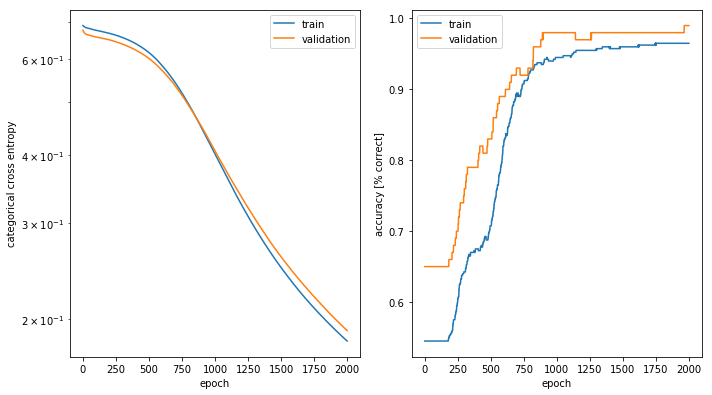

In [28]:
plot_report(report1);

In [29]:
x_test, y_test = generate_grid_data(minn=0, maxx=1, num_of_points_per_dim=51)
test_acc, test_loss, y_pred = model1.evaluate(x_test, label2one_hot(y_test, val=0), return_pred=True)
test_acc, test_loss

torch.Size([2601, 2])  --  torch.Size([2601, 2])


(tensor(0.9627), 0.19736509025096893)

torch.Size([2601, 2])  --  torch.Size([2601])
points: <class 'numpy.ndarray'> -- points: (2601, 2)


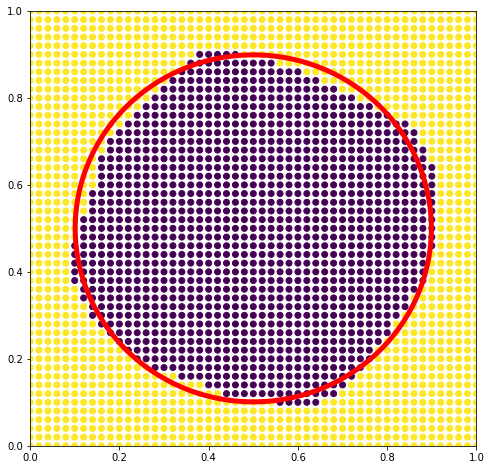

In [30]:
print(x_test.shape, " -- ", y_pred.shape)
plot_data(x_test, y_pred)

### Test with Mean Square Error

In [31]:
x_all, y_all = generate_data(num_of_points=500)
print(x_all.shape, " -- ", y_all.shape)
y_all = label2one_hot(y_all, val=-1)  # convert labels to 1-hot encoding

torch.Size([500, 2])  --  torch.Size([500])


In [33]:
model2, report2 = networks.default_net(x_all, y_all, num_of_hidden_layers=1, loss='mse', num_of_neurons=(2, 25, 2), activation='tanh', lr=0.1, momentum_coef=0.0, weight_decay=0.0, p_dropout=0.0, num_of_epochs=2000, val_split=0.2, verbose=0)

Added Module Name: 0_Linear 
Added Module Name: 1_Tanh 
Added Module Name: 2_Dropout 
Added Module Name: 3_Linear 
Added Module Name: 4_Tanh 
x_train.shape: torch.Size([400, 2]) -- y_train.shape: torch.Size([400, 2])
x_val.shape: torch.Size([100, 2]) -- y_val.shape: torch.Size([100, 2])


  0%|                                                                                         | 0/2000 [00:00<?, ?it/s]

key: train_loss -- value: 2.0146942138671875
key: train_acc -- value: 0.5024999976158142
key: val_loss -- value: 2.048708200454712
key: val_acc -- value: 0.4399999976158142


  0%|                                                                                 | 1/2000 [00:00<07:08,  4.66it/s]

key: train_loss -- value: 2.0092709064483643
key: train_acc -- value: 0.5625
key: val_loss -- value: 2.026299238204956
key: val_acc -- value: 0.49000000953674316
key: train_loss -- value: 2.007962703704834
key: train_acc -- value: 0.5924999713897705
key: val_loss -- value: 2.0182149410247803
key: val_acc -- value: 0.550000011920929
key: train_loss -- value: 2.007399082183838
key: train_acc -- value: 0.5874999761581421
key: val_loss -- value: 2.0152101516723633
key: val_acc -- value: 0.5400000214576721
key: train_loss -- value: 2.0069780349731445
key: train_acc -- value: 0.5600000023841858
key: val_loss -- value: 2.0141446590423584
key: val_acc -- value: 0.5400000214576721
key: train_loss -- value: 2.006594657897949
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0138540267944336
key: val_acc -- value: 0.5299999713897705
key: train_loss -- value: 2.006232261657715
key: train_acc -- value: 0.5649999976158142
key: val_loss -- value: 2.0138800144195557
key: val_acc --

  1%|▍                                                                               | 11/2000 [00:00<00:57, 34.50it/s]

key: train_loss -- value: 2.0046398639678955
key: train_acc -- value: 0.5550000071525574
key: val_loss -- value: 2.0149857997894287
key: val_acc -- value: 0.49000000953674316
key: train_loss -- value: 2.004359483718872
key: train_acc -- value: 0.5550000071525574
key: val_loss -- value: 2.0152411460876465
key: val_acc -- value: 0.47999998927116394
key: train_loss -- value: 2.0040903091430664
key: train_acc -- value: 0.5525000095367432
key: val_loss -- value: 2.015497922897339
key: val_acc -- value: 0.5
key: train_loss -- value: 2.003833293914795
key: train_acc -- value: 0.550000011920929
key: val_loss -- value: 2.0157556533813477
key: val_acc -- value: 0.49000000953674316
key: train_loss -- value: 2.0035860538482666
key: train_acc -- value: 0.5550000071525574
key: val_loss -- value: 2.0160131454467773
key: val_acc -- value: 0.47999998927116394
key: train_loss -- value: 2.003347873687744
key: train_acc -- value: 0.5525000095367432
key: val_loss -- value: 2.0162713527679443
key: val_acc -

  1%|▉                                                                               | 22/2000 [00:00<00:38, 51.63it/s]

key: train_loss -- value: 2.0021090507507324
key: train_acc -- value: 0.5600000023841858
key: val_loss -- value: 2.0178065299987793
key: val_acc -- value: 0.4699999988079071
key: train_loss -- value: 2.00192928314209
key: train_acc -- value: 0.5625
key: val_loss -- value: 2.0180585384368896
key: val_acc -- value: 0.4699999988079071
key: train_loss -- value: 2.001756191253662
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.018308401107788
key: val_acc -- value: 0.4699999988079071
key: train_loss -- value: 2.001591444015503
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0185577869415283
key: val_acc -- value: 0.4699999988079071
key: train_loss -- value: 2.0014305114746094
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 2.0188040733337402
key: val_acc -- value: 0.4699999988079071
key: train_loss -- value: 2.0012757778167725
key: train_acc -- value: 0.5774999856948853
key: val_loss -- value: 2.019049644470215
key: val_acc -- 

  2%|█▎                                                                              | 32/2000 [00:00<00:32, 60.10it/s]

key: train_loss -- value: 2.000587224960327
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 2.020242214202881
key: val_acc -- value: 0.47999998927116394
key: train_loss -- value: 2.0004637241363525
key: train_acc -- value: 0.5824999809265137
key: val_loss -- value: 2.0204732418060303
key: val_acc -- value: 0.49000000953674316
key: train_loss -- value: 2.000344753265381
key: train_acc -- value: 0.5950000286102295
key: val_loss -- value: 2.020702362060547
key: val_acc -- value: 0.49000000953674316
key: train_loss -- value: 2.000230073928833
key: train_acc -- value: 0.5924999713897705
key: val_loss -- value: 2.0209290981292725
key: val_acc -- value: 0.49000000953674316
key: train_loss -- value: 2.000119209289551
key: train_acc -- value: 0.5950000286102295
key: val_loss -- value: 2.021153211593628
key: val_acc -- value: 0.49000000953674316
key: train_loss -- value: 2.000012159347534
key: train_acc -- value: 0.5924999713897705
key: val_loss -- value: 2.021374464035034
ke

  2%|█▋                                                                              | 43/2000 [00:00<00:29, 67.43it/s]

key: train_loss -- value: 1.9994434118270874
key: train_acc -- value: 0.5774999856948853
key: val_loss -- value: 2.0226457118988037
key: val_acc -- value: 0.46000000834465027
key: train_loss -- value: 1.9993577003479004
key: train_acc -- value: 0.5774999856948853
key: val_loss -- value: 2.0228490829467773
key: val_acc -- value: 0.46000000834465027
key: train_loss -- value: 1.9992763996124268
key: train_acc -- value: 0.5774999856948853
key: val_loss -- value: 2.0230486392974854
key: val_acc -- value: 0.44999998807907104
key: train_loss -- value: 1.9991971254348755
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.0232458114624023
key: val_acc -- value: 0.44999998807907104
key: train_loss -- value: 1.9991215467453003
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.023439407348633
key: val_acc -- value: 0.44999998807907104
key: train_loss -- value: 1.9990479946136475
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.023631811141

  3%|██                                                                              | 53/2000 [00:00<00:27, 71.43it/s]

key: train_loss -- value: 1.998708963394165
key: train_acc -- value: 0.5649999976158142
key: val_loss -- value: 2.024548053741455
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9986484050750732
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.0247228145599365
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9985886812210083
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.024895429611206
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9985296726226807
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0250654220581055
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9984748363494873
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.0252318382263184
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9984190464019775
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.02539634704589

  3%|██▍                                                                             | 62/2000 [00:00<00:26, 73.44it/s]

key: train_loss -- value: 1.998213291168213
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0260283946990967
key: val_acc -- value: 0.4399999976158142
key: train_loss -- value: 1.9981647729873657
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.0261802673339844
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.998118281364441
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.026329517364502
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9980719089508057
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.0264761447906494
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9980279207229614
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.026620388031006
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9979841709136963
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0267622470855713
k

  4%|██▊                                                                             | 71/2000 [00:00<00:25, 74.85it/s]

key: train_loss -- value: 1.9978201389312744
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.027306079864502
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9977830648422241
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0274360179901123
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.997744083404541
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.027564287185669
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9977068901062012
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0276901721954346
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9976707696914673
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.027813196182251
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9976359605789185
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0279345512390137
ke

  4%|███▏                                                                            | 81/2000 [00:01<00:25, 76.65it/s]

key: train_loss -- value: 1.9974663257598877
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.028510093688965
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9974349737167358
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.028618812561035
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.997403621673584
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.028726100921631
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.997373342514038
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0288307666778564
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.997342824935913
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.028933525085449
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.997313380241394
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0290348529815674
key: v

  5%|███▋                                                                            | 91/2000 [00:01<00:24, 78.10it/s]

key: train_loss -- value: 1.9971704483032227
key: train_acc -- value: 0.5625
key: val_loss -- value: 2.0295140743255615
key: val_acc -- value: 0.4099999964237213
key: train_loss -- value: 1.9971435070037842
key: train_acc -- value: 0.5625
key: val_loss -- value: 2.029604434967041
key: val_acc -- value: 0.4099999964237213
key: train_loss -- value: 1.997115969657898
key: train_acc -- value: 0.5625
key: val_loss -- value: 2.0296928882598877
key: val_acc -- value: 0.4099999964237213
key: train_loss -- value: 1.9970901012420654
key: train_acc -- value: 0.5625
key: val_loss -- value: 2.029780149459839
key: val_acc -- value: 0.4099999964237213
key: train_loss -- value: 1.9970623254776
key: train_acc -- value: 0.5625
key: val_loss -- value: 2.0298659801483154
key: val_acc -- value: 0.4099999964237213
key: train_loss -- value: 1.997037649154663
key: train_acc -- value: 0.5625
key: val_loss -- value: 2.0299501419067383
key: val_acc -- value: 0.4099999964237213
key: train_loss -- value: 1.9970121

  5%|███▉                                                                           | 101/2000 [00:01<00:23, 79.19it/s]

key: train_loss -- value: 1.9969106912612915
key: train_acc -- value: 0.5649999976158142
key: val_loss -- value: 2.030346393585205
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9968857765197754
key: train_acc -- value: 0.5649999976158142
key: val_loss -- value: 2.030421257019043
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9968606233596802
key: train_acc -- value: 0.5649999976158142
key: val_loss -- value: 2.0304949283599854
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9968366622924805
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.030566453933716
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.996812343597412
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.03063702583313
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9967889785766602
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0307064056396484

  6%|████▍                                                                          | 111/2000 [00:01<00:23, 80.10it/s]

key: train_loss -- value: 1.9966707229614258
key: train_acc -- value: 0.5649999976158142
key: val_loss -- value: 2.0310328006744385
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.996648907661438
key: train_acc -- value: 0.5649999976158142
key: val_loss -- value: 2.0310938358306885
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9966254234313965
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0311543941497803
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.996604323387146
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.03121280670166
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9965803623199463
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.03127121925354
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9965574741363525
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.031327724456787


  6%|████▊                                                                          | 121/2000 [00:01<00:23, 81.05it/s]

key: train_loss -- value: 1.996444821357727
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0315957069396973
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9964208602905273
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0316457748413086
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9963985681533813
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0316953659057617
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9963786602020264
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.031743049621582
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.996354103088379
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0317912101745605
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9963326454162598
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0318372249603

  7%|█████▏                                                                         | 131/2000 [00:01<00:22, 82.02it/s]

key: train_loss -- value: 1.9962201118469238
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.032055139541626
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9961978197097778
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0320959091186523
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9961752891540527
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0321364402770996
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.996152639389038
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0321755409240723
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9961318969726562
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0322141647338867
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9961086511611938
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.032250881195

  7%|█████▌                                                                         | 141/2000 [00:01<00:22, 83.01it/s]

key: train_loss -- value: 1.995993971824646
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.03242826461792
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9959722757339478
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.032461643218994
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9959495067596436
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.032494306564331
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9959254264831543
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.0325253009796143
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9959036111831665
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.0325567722320557
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9958800077438354
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.032586097717285

  8%|█████▉                                                                         | 151/2000 [00:01<00:22, 83.62it/s]

key: train_loss -- value: 1.9957630634307861
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.032729148864746
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9957391023635864
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0327558517456055
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9957153797149658
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0327813625335693
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9956905841827393
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0328073501586914
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9956674575805664
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0328314304351807
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9956440925598145
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.03285574913

  8%|██████▎                                                                        | 161/2000 [00:01<00:21, 84.20it/s]

key: train_loss -- value: 1.995522141456604
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0329689979553223
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9954968690872192
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0329904556274414
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9954715967178345
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.033010959625244
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9954463243484497
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0330309867858887
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9954211711883545
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.033050775527954
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.995395541191101
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.03306961059570

  9%|██████▊                                                                        | 171/2000 [00:02<00:21, 84.72it/s]

key: train_loss -- value: 1.995267629623413
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.03315806388855
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9952412843704224
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.033174991607666
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9952129125595093
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0331907272338867
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9951878786087036
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0332062244415283
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9951603412628174
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0332212448120117
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9951341152191162
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.03323602676391

  9%|███████▏                                                                       | 181/2000 [00:02<00:21, 84.87it/s]

key: train_loss -- value: 1.9949971437454224
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.033303737640381
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.994968056678772
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0333168506622314
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.994939923286438
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0333287715911865
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9949132204055786
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0333404541015625
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9948841333389282
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0333518981933594
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9948549270629883
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0333626270294

 10%|███████▌                                                                       | 191/2000 [00:02<00:21, 85.04it/s]

key: train_loss -- value: 1.9947079420089722
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0334126949310303
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9946774244308472
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0334224700927734
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9946478605270386
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.0334312915802
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9946156740188599
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.0334393978118896
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.99458646774292
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.033447504043579
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9945547580718994
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.0334556102752686
key

 10%|███████▉                                                                       | 201/2000 [00:02<00:21, 85.34it/s]

key: train_loss -- value: 1.9943968057632446
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.0334904193878174
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9943652153015137
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.0334959030151367
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.99433171749115
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.033501625061035
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9942991733551025
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.0335075855255127
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9942660331726074
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.0335118770599365
key: val_acc -- value: 0.38999998569488525
key: train_loss -- value: 1.9942317008972168
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.0335168838500977
ke

 11%|████████▎                                                                      | 211/2000 [00:02<00:20, 85.68it/s]

key: train_loss -- value: 1.9940619468688965
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.0335378646850586
key: val_acc -- value: 0.4099999964237213
key: train_loss -- value: 1.9940273761749268
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.033541679382324
key: val_acc -- value: 0.4099999964237213
key: train_loss -- value: 1.9939911365509033
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.0335443019866943
key: val_acc -- value: 0.4099999964237213
key: train_loss -- value: 1.9939568042755127
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.0335469245910645
key: val_acc -- value: 0.4099999964237213
key: train_loss -- value: 1.9939205646514893
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.0335500240325928
key: val_acc -- value: 0.4099999964237213
key: train_loss -- value: 1.9938839673995972
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.0335519313812256

 11%|████████▋                                                                      | 221/2000 [00:02<00:20, 85.90it/s]

key: train_loss -- value: 1.993699550628662
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0335593223571777
key: val_acc -- value: 0.4099999964237213
key: train_loss -- value: 1.9936621189117432
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0335609912872314
key: val_acc -- value: 0.4099999964237213
key: train_loss -- value: 1.993622899055481
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0335612297058105
key: val_acc -- value: 0.4099999964237213
key: train_loss -- value: 1.9935842752456665
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.033561944961548
key: val_acc -- value: 0.4099999964237213
key: train_loss -- value: 1.9935458898544312
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.033561944961548
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9935073852539062
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.033561944961548
ke

 12%|█████████                                                                      | 231/2000 [00:02<00:20, 86.29it/s]

key: train_loss -- value: 1.9933053255081177
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.033557891845703
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9932644367218018
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0335564613342285
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9932233095169067
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0335538387298584
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.993180751800537
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.033552885055542
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9931385517120361
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0335500240325928
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.993094801902771
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.03354740142822

 12%|█████████▌                                                                     | 242/2000 [00:02<00:20, 86.94it/s]

key: train_loss -- value: 1.9928301572799683
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0335280895233154
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.992785930633545
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.0335237979888916
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9927407503128052
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.033519983291626
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9926949739456177
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.033515214920044
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9926481246948242
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.033510684967041
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.992600440979004
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.033505439758301

 13%|█████████▉                                                                     | 253/2000 [00:02<00:19, 87.43it/s]

key: train_loss -- value: 1.9923100471496582
key: train_acc -- value: 0.5674999952316284
key: val_loss -- value: 2.03347110748291
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9922599792480469
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.0334644317626953
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9922096729278564
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.0334577560424805
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.992158055305481
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.033450126647949
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9921072721481323
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.033442258834839
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9920555353164673
key: train_acc -- value: 0.5699999928474426
key: val_loss -- value: 2.033435583114624

 13%|██████████▍                                                                    | 263/2000 [00:02<00:19, 87.76it/s]

key: train_loss -- value: 1.9917887449264526
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0333938598632812
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9917323589324951
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0333852767944336
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9916778802871704
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0333757400512695
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9916229248046875
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0333662033081055
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9915655851364136
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.0333564281463623
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9915080070495605
key: train_acc -- value: 0.5724999904632568
key: val_loss -- value: 2.03334712982

 14%|██████████▊                                                                    | 273/2000 [00:03<00:19, 88.06it/s]

key: train_loss -- value: 1.9912163019180298
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.033292531967163
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.991155982017517
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.033280849456787
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.991094946861267
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.033268690109253
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.991033673286438
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.033256769180298
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9909727573394775
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.0332436561584473
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9909099340438843
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.033231735229492
key: val_acc

 14%|███████████▎                                                                   | 285/2000 [00:03<00:19, 89.02it/s]

key: train_loss -- value: 1.9904546737670898
key: train_acc -- value: 0.5774999856948853
key: val_loss -- value: 2.033135175704956
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9903873205184937
key: train_acc -- value: 0.5774999856948853
key: val_loss -- value: 2.033120632171631
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.990319848060608
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.0331053733825684
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9902503490447998
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.0330898761749268
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9901810884475708
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.033074140548706
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9901108741760254
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.033057689666748
key: va

 15%|███████████▋                                                                   | 296/2000 [00:03<00:19, 88.15it/s]

key: train_loss -- value: 1.9896764755249023
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.032954692840576
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9896007776260376
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.0329368114471436
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.989525556564331
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.0329177379608154
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9894475936889648
key: train_acc -- value: 0.574999988079071
key: val_loss -- value: 2.0328986644744873
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9893712997436523
key: train_acc -- value: 0.5774999856948853
key: val_loss -- value: 2.0328798294067383
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9892939329147339
key: train_acc -- value: 0.5774999856948853
key: val_loss -- value: 2.0328595638275146
key:

 15%|████████████▏                                                                  | 307/2000 [00:03<00:19, 88.65it/s]

key: train_loss -- value: 1.9888099431991577
key: train_acc -- value: 0.5774999856948853
key: val_loss -- value: 2.0327343940734863
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9887257814407349
key: train_acc -- value: 0.5774999856948853
key: val_loss -- value: 2.032712936401367
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9886409044265747
key: train_acc -- value: 0.5774999856948853
key: val_loss -- value: 2.0326905250549316
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9885562658309937
key: train_acc -- value: 0.5774999856948853
key: val_loss -- value: 2.032668113708496
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.988470196723938
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 2.032644510269165
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9883830547332764
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 2.032621383666992
key

 16%|████████████▌                                                                  | 319/2000 [00:03<00:18, 89.44it/s]

key: train_loss -- value: 1.9877499341964722
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 2.0324461460113525
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9876549243927002
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 2.032419204711914
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9875603914260864
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 2.0323925018310547
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9874625205993652
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 2.032364845275879
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.987366795539856
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 2.032336950302124
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.987268328666687
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 2.032308578491211
key:

 16%|█████████████                                                                  | 330/2000 [00:03<00:18, 89.78it/s]

key: train_loss -- value: 1.9866583347320557
key: train_acc -- value: 0.5824999809265137
key: val_loss -- value: 2.0321292877197266
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9865533113479614
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 2.0320980548858643
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9864469766616821
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 2.0320661067962646
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9863380193710327
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 2.0320334434509277
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.9862306118011475
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 2.032000780105591
key: val_acc -- value: 0.41999998688697815
key: train_loss -- value: 1.986120343208313
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 2.031968355178

 17%|█████████████▍                                                                 | 341/2000 [00:03<00:18, 89.71it/s]

key: train_loss -- value: 1.985438585281372
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 2.0317583084106445
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9853209257125854
key: train_acc -- value: 0.5799999833106995
key: val_loss -- value: 2.031721591949463
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.985201120376587
key: train_acc -- value: 0.5824999809265137
key: val_loss -- value: 2.031684637069702
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9850808382034302
key: train_acc -- value: 0.5824999809265137
key: val_loss -- value: 2.0316457748413086
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.984959602355957
key: train_acc -- value: 0.5824999809265137
key: val_loss -- value: 2.0316081047058105
key: val_acc -- value: 0.4300000071525574
key: train_loss -- value: 1.9848377704620361
key: train_acc -- value: 0.5824999809265137
key: val_loss -- value: 2.0315685272216797
key

 18%|█████████████▊                                                                 | 351/2000 [00:03<00:18, 89.78it/s]

key: train_loss -- value: 1.9842033386230469
key: train_acc -- value: 0.5849999785423279
key: val_loss -- value: 2.0313663482666016
key: val_acc -- value: 0.4399999976158142
key: train_loss -- value: 1.9840714931488037
key: train_acc -- value: 0.5849999785423279
key: val_loss -- value: 2.0313243865966797
key: val_acc -- value: 0.4399999976158142
key: train_loss -- value: 1.9839389324188232
key: train_acc -- value: 0.5849999785423279
key: val_loss -- value: 2.0312819480895996
key: val_acc -- value: 0.4399999976158142
key: train_loss -- value: 1.9838069677352905
key: train_acc -- value: 0.5849999785423279
key: val_loss -- value: 2.031238555908203
key: val_acc -- value: 0.4399999976158142
key: train_loss -- value: 1.9836702346801758
key: train_acc -- value: 0.5849999785423279
key: val_loss -- value: 2.0311946868896484
key: val_acc -- value: 0.4399999976158142
key: train_loss -- value: 1.983534336090088
key: train_acc -- value: 0.5824999809265137
key: val_loss -- value: 2.0311503410339355


 18%|██████████████▎                                                                | 361/2000 [00:04<00:18, 89.90it/s]

key: train_loss -- value: 1.9828320741653442
key: train_acc -- value: 0.5849999785423279
key: val_loss -- value: 2.030918598175049
key: val_acc -- value: 0.4399999976158142
key: train_loss -- value: 1.9826852083206177
key: train_acc -- value: 0.5849999785423279
key: val_loss -- value: 2.030869960784912
key: val_acc -- value: 0.4399999976158142
key: train_loss -- value: 1.9825389385223389
key: train_acc -- value: 0.5849999785423279
key: val_loss -- value: 2.0308210849761963
key: val_acc -- value: 0.4399999976158142
key: train_loss -- value: 1.9823898077011108
key: train_acc -- value: 0.5874999761581421
key: val_loss -- value: 2.0307722091674805
key: val_acc -- value: 0.4399999976158142
key: train_loss -- value: 1.9822405576705933
key: train_acc -- value: 0.5874999761581421
key: val_loss -- value: 2.030721664428711
key: val_acc -- value: 0.4399999976158142
key: train_loss -- value: 1.982089638710022
key: train_acc -- value: 0.5874999761581421
key: val_loss -- value: 2.030669927597046
key

 19%|██████████████▋                                                                | 372/2000 [00:04<00:18, 90.20it/s]

key: train_loss -- value: 1.9811460971832275
key: train_acc -- value: 0.5899999737739563
key: val_loss -- value: 2.0303516387939453
key: val_acc -- value: 0.44999998807907104
key: train_loss -- value: 1.9809843301773071
key: train_acc -- value: 0.5899999737739563
key: val_loss -- value: 2.0302956104278564
key: val_acc -- value: 0.44999998807907104
key: train_loss -- value: 1.9808191061019897
key: train_acc -- value: 0.5899999737739563
key: val_loss -- value: 2.0302393436431885
key: val_acc -- value: 0.44999998807907104
key: train_loss -- value: 1.9806509017944336
key: train_acc -- value: 0.5899999737739563
key: val_loss -- value: 2.030182123184204
key: val_acc -- value: 0.44999998807907104
key: train_loss -- value: 1.9804818630218506
key: train_acc -- value: 0.5899999737739563
key: val_loss -- value: 2.030125141143799
key: val_acc -- value: 0.44999998807907104
key: train_loss -- value: 1.9803117513656616
key: train_acc -- value: 0.5924999713897705
key: val_loss -- value: 2.030066251754

 19%|███████████████▏                                                               | 383/2000 [00:04<00:17, 90.50it/s]

key: train_loss -- value: 1.9792519807815552
key: train_acc -- value: 0.5975000262260437
key: val_loss -- value: 2.029698371887207
key: val_acc -- value: 0.46000000834465027
key: train_loss -- value: 1.9790687561035156
key: train_acc -- value: 0.6000000238418579
key: val_loss -- value: 2.0296339988708496
key: val_acc -- value: 0.46000000834465027
key: train_loss -- value: 1.9788832664489746
key: train_acc -- value: 0.6000000238418579
key: val_loss -- value: 2.0295698642730713
key: val_acc -- value: 0.46000000834465027
key: train_loss -- value: 1.9786959886550903
key: train_acc -- value: 0.5975000262260437
key: val_loss -- value: 2.0295040607452393
key: val_acc -- value: 0.44999998807907104
key: train_loss -- value: 1.978506326675415
key: train_acc -- value: 0.5975000262260437
key: val_loss -- value: 2.029437780380249
key: val_acc -- value: 0.44999998807907104
key: train_loss -- value: 1.9783145189285278
key: train_acc -- value: 0.6000000238418579
key: val_loss -- value: 2.0293703079223

 20%|███████████████▌                                                               | 394/2000 [00:04<00:17, 90.77it/s]

key: train_loss -- value: 1.9771205186843872
key: train_acc -- value: 0.6050000190734863
key: val_loss -- value: 2.0289485454559326
key: val_acc -- value: 0.46000000834465027
key: train_loss -- value: 1.9769145250320435
key: train_acc -- value: 0.6050000190734863
key: val_loss -- value: 2.0288755893707275
key: val_acc -- value: 0.46000000834465027
key: train_loss -- value: 1.9767051935195923
key: train_acc -- value: 0.6050000190734863
key: val_loss -- value: 2.028801202774048
key: val_acc -- value: 0.46000000834465027
key: train_loss -- value: 1.976495385169983
key: train_acc -- value: 0.6050000190734863
key: val_loss -- value: 2.0287256240844727
key: val_acc -- value: 0.46000000834465027
key: train_loss -- value: 1.9762818813323975
key: train_acc -- value: 0.6050000190734863
key: val_loss -- value: 2.0286495685577393
key: val_acc -- value: 0.46000000834465027
key: train_loss -- value: 1.9760671854019165
key: train_acc -- value: 0.6050000190734863
key: val_loss -- value: 2.028572320938

 20%|███████████████▉                                                               | 405/2000 [00:04<00:17, 91.16it/s]

key: train_loss -- value: 1.9747201204299927
key: train_acc -- value: 0.6050000190734863
key: val_loss -- value: 2.0280892848968506
key: val_acc -- value: 0.46000000834465027
key: train_loss -- value: 1.9744884967803955
key: train_acc -- value: 0.6050000190734863
key: val_loss -- value: 2.028005361557007
key: val_acc -- value: 0.46000000834465027
key: train_loss -- value: 1.9742525815963745
key: train_acc -- value: 0.6025000214576721
key: val_loss -- value: 2.0279200077056885
key: val_acc -- value: 0.46000000834465027
key: train_loss -- value: 1.9740146398544312
key: train_acc -- value: 0.6050000190734863
key: val_loss -- value: 2.027834415435791
key: val_acc -- value: 0.46000000834465027
key: train_loss -- value: 1.9737732410430908
key: train_acc -- value: 0.6050000190734863
key: val_loss -- value: 2.0277466773986816
key: val_acc -- value: 0.46000000834465027
key: train_loss -- value: 1.9735307693481445
key: train_acc -- value: 0.6050000190734863
key: val_loss -- value: 2.027658462524

 21%|████████████████▍                                                              | 416/2000 [00:04<00:17, 91.43it/s]

key: train_loss -- value: 1.9720137119293213
key: train_acc -- value: 0.6075000166893005
key: val_loss -- value: 2.0271053314208984
key: val_acc -- value: 0.4699999988079071
key: train_loss -- value: 1.9717514514923096
key: train_acc -- value: 0.6075000166893005
key: val_loss -- value: 2.027009963989258
key: val_acc -- value: 0.4699999988079071
key: train_loss -- value: 1.9714857339859009
key: train_acc -- value: 0.6050000190734863
key: val_loss -- value: 2.0269124507904053
key: val_acc -- value: 0.4699999988079071
key: train_loss -- value: 1.971217155456543
key: train_acc -- value: 0.6050000190734863
key: val_loss -- value: 2.0268142223358154
key: val_acc -- value: 0.4699999988079071
key: train_loss -- value: 1.9709458351135254
key: train_acc -- value: 0.6075000166893005
key: val_loss -- value: 2.026714563369751
key: val_acc -- value: 0.4699999988079071
key: train_loss -- value: 1.9706714153289795
key: train_acc -- value: 0.6075000166893005
key: val_loss -- value: 2.026613712310791
ke

 21%|████████████████▊                                                              | 427/2000 [00:04<00:17, 91.76it/s]

key: train_loss -- value: 1.9689581394195557
key: train_acc -- value: 0.6100000143051147
key: val_loss -- value: 2.0259816646575928
key: val_acc -- value: 0.4699999988079071
key: train_loss -- value: 1.968662142753601
key: train_acc -- value: 0.6100000143051147
key: val_loss -- value: 2.025871753692627
key: val_acc -- value: 0.4699999988079071
key: train_loss -- value: 1.9683624505996704
key: train_acc -- value: 0.6150000095367432
key: val_loss -- value: 2.0257606506347656
key: val_acc -- value: 0.4699999988079071
key: train_loss -- value: 1.9680595397949219
key: train_acc -- value: 0.6150000095367432
key: val_loss -- value: 2.025648593902588
key: val_acc -- value: 0.4699999988079071
key: train_loss -- value: 1.9677512645721436
key: train_acc -- value: 0.6175000071525574
key: val_loss -- value: 2.0255346298217773
key: val_acc -- value: 0.4699999988079071
key: train_loss -- value: 1.9674420356750488
key: train_acc -- value: 0.6175000071525574
key: val_loss -- value: 2.025419235229492
ke

 22%|█████████████████▎                                                             | 439/2000 [00:04<00:16, 92.25it/s]

key: train_loss -- value: 1.9651718139648438
key: train_acc -- value: 0.6175000071525574
key: val_loss -- value: 2.0245707035064697
key: val_acc -- value: 0.4699999988079071
key: train_loss -- value: 1.964833378791809
key: train_acc -- value: 0.6150000095367432
key: val_loss -- value: 2.0244438648223877
key: val_acc -- value: 0.4699999988079071
key: train_loss -- value: 1.9644896984100342
key: train_acc -- value: 0.6150000095367432
key: val_loss -- value: 2.0243146419525146
key: val_acc -- value: 0.4699999988079071
key: train_loss -- value: 1.9641451835632324
key: train_acc -- value: 0.6150000095367432
key: val_loss -- value: 2.024184226989746
key: val_acc -- value: 0.4699999988079071
key: train_loss -- value: 1.963793158531189
key: train_acc -- value: 0.612500011920929
key: val_loss -- value: 2.0240530967712402
key: val_acc -- value: 0.4699999988079071
key: train_loss -- value: 1.9634385108947754
key: train_acc -- value: 0.612500011920929
key: val_loss -- value: 2.0239193439483643
key

 22%|█████████████████▊                                                             | 450/2000 [00:04<00:16, 92.50it/s]

key: train_loss -- value: 1.9612277746200562
key: train_acc -- value: 0.6200000047683716
key: val_loss -- value: 2.0230815410614014
key: val_acc -- value: 0.47999998927116394
key: train_loss -- value: 1.9608443975448608
key: train_acc -- value: 0.6200000047683716
key: val_loss -- value: 2.0229358673095703
key: val_acc -- value: 0.47999998927116394
key: train_loss -- value: 1.9604567289352417
key: train_acc -- value: 0.6225000023841858
key: val_loss -- value: 2.0227880477905273
key: val_acc -- value: 0.47999998927116394
key: train_loss -- value: 1.9600657224655151
key: train_acc -- value: 0.6225000023841858
key: val_loss -- value: 2.0226383209228516
key: val_acc -- value: 0.47999998927116394
key: train_loss -- value: 1.9596693515777588
key: train_acc -- value: 0.6225000023841858
key: val_loss -- value: 2.0224874019622803
key: val_acc -- value: 0.47999998927116394
key: train_loss -- value: 1.95926833152771
key: train_acc -- value: 0.6225000023841858
key: val_loss -- value: 2.022334098815

 23%|██████████████████▏                                                            | 461/2000 [00:04<00:16, 92.47it/s]

key: train_loss -- value: 1.9567689895629883
key: train_acc -- value: 0.6225000023841858
key: val_loss -- value: 2.021371841430664
key: val_acc -- value: 0.5
key: train_loss -- value: 1.9563363790512085
key: train_acc -- value: 0.6225000023841858
key: val_loss -- value: 2.021205186843872
key: val_acc -- value: 0.5
key: train_loss -- value: 1.9558978080749512
key: train_acc -- value: 0.6225000023841858
key: val_loss -- value: 2.0210354328155518
key: val_acc -- value: 0.5
key: train_loss -- value: 1.9554543495178223
key: train_acc -- value: 0.6225000023841858
key: val_loss -- value: 2.0208632946014404
key: val_acc -- value: 0.5
key: train_loss -- value: 1.9550071954727173
key: train_acc -- value: 0.6225000023841858
key: val_loss -- value: 2.0206894874572754
key: val_acc -- value: 0.5
key: train_loss -- value: 1.9545537233352661
key: train_acc -- value: 0.6225000023841858
key: val_loss -- value: 2.0205132961273193
key: val_acc -- value: 0.5
key: train_loss -- value: 1.9540956020355225
key

 24%|██████████████████▋                                                            | 472/2000 [00:05<00:16, 92.70it/s]

key: train_loss -- value: 1.9517288208007812
key: train_acc -- value: 0.6274999976158142
key: val_loss -- value: 2.0194058418273926
key: val_acc -- value: 0.5
key: train_loss -- value: 1.951238751411438
key: train_acc -- value: 0.6225000023841858
key: val_loss -- value: 2.019212245941162
key: val_acc -- value: 0.5
key: train_loss -- value: 1.9507431983947754
key: train_acc -- value: 0.625
key: val_loss -- value: 2.019016981124878
key: val_acc -- value: 0.5
key: train_loss -- value: 1.9502437114715576
key: train_acc -- value: 0.625
key: val_loss -- value: 2.0188188552856445
key: val_acc -- value: 0.5
key: train_loss -- value: 1.9497370719909668
key: train_acc -- value: 0.625
key: val_loss -- value: 2.018618106842041
key: val_acc -- value: 0.5
key: train_loss -- value: 1.9492254257202148
key: train_acc -- value: 0.625
key: val_loss -- value: 2.0184144973754883
key: val_acc -- value: 0.5
key: train_loss -- value: 1.9487096071243286
key: train_acc -- value: 0.6274999976158142
key: val_loss

 24%|███████████████████                                                            | 483/2000 [00:05<00:16, 92.85it/s]

key: train_loss -- value: 1.9460368156433105
key: train_acc -- value: 0.625
key: val_loss -- value: 2.017134666442871
key: val_acc -- value: 0.5099999904632568
key: train_loss -- value: 1.9454846382141113
key: train_acc -- value: 0.625
key: val_loss -- value: 2.016911268234253
key: val_acc -- value: 0.5099999904632568
key: train_loss -- value: 1.9449251890182495
key: train_acc -- value: 0.6225000023841858
key: val_loss -- value: 2.0166847705841064
key: val_acc -- value: 0.5099999904632568
key: train_loss -- value: 1.9443598985671997
key: train_acc -- value: 0.6225000023841858
key: val_loss -- value: 2.0164551734924316
key: val_acc -- value: 0.5099999904632568
key: train_loss -- value: 1.943790078163147
key: train_acc -- value: 0.6225000023841858
key: val_loss -- value: 2.0162224769592285
key: val_acc -- value: 0.5099999904632568
key: train_loss -- value: 1.943212866783142
key: train_acc -- value: 0.6225000023841858
key: val_loss -- value: 2.015986204147339
key: val_acc -- value: 0.5099

 25%|███████████████████▌                                                           | 494/2000 [00:05<00:16, 93.08it/s]

key: train_loss -- value: 1.9396162033081055
key: train_acc -- value: 0.6225000023841858
key: val_loss -- value: 2.0145015716552734
key: val_acc -- value: 0.5099999904632568
key: train_loss -- value: 1.9389948844909668
key: train_acc -- value: 0.6225000023841858
key: val_loss -- value: 2.0142416954040527
key: val_acc -- value: 0.5099999904632568
key: train_loss -- value: 1.9383653402328491
key: train_acc -- value: 0.6225000023841858
key: val_loss -- value: 2.0139782428741455
key: val_acc -- value: 0.5099999904632568
key: train_loss -- value: 1.937729001045227
key: train_acc -- value: 0.6200000047683716
key: val_loss -- value: 2.013711929321289
key: val_acc -- value: 0.5099999904632568
key: train_loss -- value: 1.9370875358581543
key: train_acc -- value: 0.6200000047683716
key: val_loss -- value: 2.0134410858154297
key: val_acc -- value: 0.5099999904632568
key: train_loss -- value: 1.9364374876022339
key: train_acc -- value: 0.6200000047683716
key: val_loss -- value: 2.013166904449463
k

 25%|███████████████████▉                                                           | 505/2000 [00:05<00:16, 93.18it/s]

key: train_loss -- value: 1.9323936700820923
key: train_acc -- value: 0.6175000071525574
key: val_loss -- value: 2.01143741607666
key: val_acc -- value: 0.5199999809265137
key: train_loss -- value: 1.9316926002502441
key: train_acc -- value: 0.6175000071525574
key: val_loss -- value: 2.0111353397369385
key: val_acc -- value: 0.5199999809265137
key: train_loss -- value: 1.9309855699539185
key: train_acc -- value: 0.6200000047683716
key: val_loss -- value: 2.010828971862793
key: val_acc -- value: 0.5199999809265137
key: train_loss -- value: 1.9302717447280884
key: train_acc -- value: 0.6200000047683716
key: val_loss -- value: 2.0105173587799072
key: val_acc -- value: 0.5199999809265137
key: train_loss -- value: 1.9295495748519897
key: train_acc -- value: 0.6200000047683716
key: val_loss -- value: 2.010201930999756
key: val_acc -- value: 0.5199999809265137
key: train_loss -- value: 1.9288209676742554
key: train_acc -- value: 0.6225000023841858
key: val_loss -- value: 2.0098814964294434
ke

 26%|████████████████████▍                                                          | 516/2000 [00:05<00:15, 93.38it/s]

key: train_loss -- value: 1.9242844581604004
key: train_acc -- value: 0.6299999952316284
key: val_loss -- value: 2.007863998413086
key: val_acc -- value: 0.5099999904632568
key: train_loss -- value: 1.923500657081604
key: train_acc -- value: 0.6299999952316284
key: val_loss -- value: 2.0075104236602783
key: val_acc -- value: 0.5099999904632568
key: train_loss -- value: 1.9227076768875122
key: train_acc -- value: 0.6299999952316284
key: val_loss -- value: 2.0071518421173096
key: val_acc -- value: 0.5099999904632568
key: train_loss -- value: 1.9219096899032593
key: train_acc -- value: 0.6324999928474426
key: val_loss -- value: 2.006788969039917
key: val_acc -- value: 0.5099999904632568
key: train_loss -- value: 1.9211020469665527
key: train_acc -- value: 0.6324999928474426
key: val_loss -- value: 2.0064198970794678
key: val_acc -- value: 0.5099999904632568
key: train_loss -- value: 1.920285701751709
key: train_acc -- value: 0.6299999952316284
key: val_loss -- value: 2.0060460567474365
ke

 26%|████████████████████▊                                                          | 527/2000 [00:05<00:15, 93.54it/s]

key: train_loss -- value: 1.9152169227600098
key: train_acc -- value: 0.6449999809265137
key: val_loss -- value: 2.003688335418701
key: val_acc -- value: 0.5299999713897705
key: train_loss -- value: 1.9143426418304443
key: train_acc -- value: 0.6424999833106995
key: val_loss -- value: 2.0032758712768555
key: val_acc -- value: 0.5299999713897705
key: train_loss -- value: 1.9134615659713745
key: train_acc -- value: 0.6424999833106995
key: val_loss -- value: 2.0028574466705322
key: val_acc -- value: 0.5299999713897705
key: train_loss -- value: 1.912569522857666
key: train_acc -- value: 0.6474999785423279
key: val_loss -- value: 2.0024328231811523
key: val_acc -- value: 0.5299999713897705
key: train_loss -- value: 1.9116690158843994
key: train_acc -- value: 0.6499999761581421
key: val_loss -- value: 2.002002239227295
key: val_acc -- value: 0.5299999713897705
key: train_loss -- value: 1.910759687423706
key: train_acc -- value: 0.6499999761581421
key: val_loss -- value: 2.001565456390381
key

 27%|█████████████████████▎                                                         | 538/2000 [00:05<00:15, 93.66it/s]

key: train_loss -- value: 1.905122995376587
key: train_acc -- value: 0.6575000286102295
key: val_loss -- value: 1.998814582824707
key: val_acc -- value: 0.5400000214576721
key: train_loss -- value: 1.9041519165039062
key: train_acc -- value: 0.6575000286102295
key: val_loss -- value: 1.9983333349227905
key: val_acc -- value: 0.5400000214576721
key: train_loss -- value: 1.9031718969345093
key: train_acc -- value: 0.6625000238418579
key: val_loss -- value: 1.9978452920913696
key: val_acc -- value: 0.5400000214576721
key: train_loss -- value: 1.9021825790405273
key: train_acc -- value: 0.6625000238418579
key: val_loss -- value: 1.9973505735397339
key: val_acc -- value: 0.550000011920929
key: train_loss -- value: 1.90118408203125
key: train_acc -- value: 0.6650000214576721
key: val_loss -- value: 1.9968496561050415
key: val_acc -- value: 0.550000011920929
key: train_loss -- value: 1.9001784324645996
key: train_acc -- value: 0.6650000214576721
key: val_loss -- value: 1.9963409900665283
key:

 27%|█████████████████████▋                                                         | 549/2000 [00:05<00:15, 93.80it/s]

key: train_loss -- value: 1.893938422203064
key: train_acc -- value: 0.6675000190734863
key: val_loss -- value: 1.993141531944275
key: val_acc -- value: 0.5600000023841858
key: train_loss -- value: 1.8928648233413696
key: train_acc -- value: 0.6675000190734863
key: val_loss -- value: 1.9925826787948608
key: val_acc -- value: 0.5600000023841858
key: train_loss -- value: 1.8917826414108276
key: train_acc -- value: 0.6650000214576721
key: val_loss -- value: 1.9920161962509155
key: val_acc -- value: 0.550000011920929
key: train_loss -- value: 1.8906902074813843
key: train_acc -- value: 0.6650000214576721
key: val_loss -- value: 1.9914426803588867
key: val_acc -- value: 0.550000011920929
key: train_loss -- value: 1.8895889520645142
key: train_acc -- value: 0.6650000214576721
key: val_loss -- value: 1.990861177444458
key: val_acc -- value: 0.550000011920929
key: train_loss -- value: 1.888478398323059
key: train_acc -- value: 0.6650000214576721
key: val_loss -- value: 1.9902715682983398
key: 

 28%|██████████████████████                                                         | 560/2000 [00:05<00:15, 93.71it/s]

key: train_loss -- value: 1.8816113471984863
key: train_acc -- value: 0.6725000143051147
key: val_loss -- value: 1.9865729808807373
key: val_acc -- value: 0.5699999928474426
key: train_loss -- value: 1.8804326057434082
key: train_acc -- value: 0.6725000143051147
key: val_loss -- value: 1.9859280586242676
key: val_acc -- value: 0.5600000023841858
key: train_loss -- value: 1.8792437314987183
key: train_acc -- value: 0.6725000143051147
key: val_loss -- value: 1.9852752685546875
key: val_acc -- value: 0.5600000023841858
key: train_loss -- value: 1.8780452013015747
key: train_acc -- value: 0.675000011920929
key: val_loss -- value: 1.9846142530441284
key: val_acc -- value: 0.5600000023841858
key: train_loss -- value: 1.876837134361267
key: train_acc -- value: 0.6825000047683716
key: val_loss -- value: 1.9839450120925903
key: val_acc -- value: 0.5600000023841858
key: train_loss -- value: 1.8756191730499268
key: train_acc -- value: 0.6825000047683716
key: val_loss -- value: 1.9832673072814941


 28%|██████████████████████▌                                                        | 570/2000 [00:06<00:15, 93.75it/s]

key: train_loss -- value: 1.869381308555603
key: train_acc -- value: 0.6850000023841858
key: val_loss -- value: 1.9797508716583252
key: val_acc -- value: 0.5799999833106995
key: train_loss -- value: 1.8681029081344604
key: train_acc -- value: 0.6850000023841858
key: val_loss -- value: 1.9790220260620117
key: val_acc -- value: 0.5799999833106995
key: train_loss -- value: 1.8668164014816284
key: train_acc -- value: 0.6899999976158142
key: val_loss -- value: 1.9782845973968506
key: val_acc -- value: 0.5799999833106995
key: train_loss -- value: 1.8655186891555786
key: train_acc -- value: 0.6924999952316284
key: val_loss -- value: 1.9775376319885254
key: val_acc -- value: 0.5799999833106995
key: train_loss -- value: 1.8642115592956543
key: train_acc -- value: 0.6949999928474426
key: val_loss -- value: 1.9767826795578003
key: val_acc -- value: 0.5799999833106995
key: train_loss -- value: 1.8628941774368286
key: train_acc -- value: 0.6949999928474426
key: val_loss -- value: 1.9760186672210693

 29%|██████████████████████▉                                                        | 581/2000 [00:06<00:15, 93.98it/s]

key: train_loss -- value: 1.8547784090042114
key: train_acc -- value: 0.7024999856948853
key: val_loss -- value: 1.971245527267456
key: val_acc -- value: 0.5899999737739563
key: train_loss -- value: 1.853391408920288
key: train_acc -- value: 0.7024999856948853
key: val_loss -- value: 1.9704185724258423
key: val_acc -- value: 0.5899999737739563
key: train_loss -- value: 1.851994276046753
key: train_acc -- value: 0.7049999833106995
key: val_loss -- value: 1.9695817232131958
key: val_acc -- value: 0.5899999737739563
key: train_loss -- value: 1.8505849838256836
key: train_acc -- value: 0.7074999809265137
key: val_loss -- value: 1.968736171722412
key: val_acc -- value: 0.5899999737739563
key: train_loss -- value: 1.8491679430007935
key: train_acc -- value: 0.7099999785423279
key: val_loss -- value: 1.967881202697754
key: val_acc -- value: 0.5899999737739563
key: train_loss -- value: 1.8477402925491333
key: train_acc -- value: 0.7124999761581421
key: val_loss -- value: 1.9670175313949585
key

 30%|███████████████████████▍                                                       | 592/2000 [00:06<00:14, 94.12it/s]

key: train_loss -- value: 1.8389604091644287
key: train_acc -- value: 0.7149999737739563
key: val_loss -- value: 1.9616377353668213
key: val_acc -- value: 0.5899999737739563
key: train_loss -- value: 1.8374638557434082
key: train_acc -- value: 0.7174999713897705
key: val_loss -- value: 1.9607089757919312
key: val_acc -- value: 0.5899999737739563
key: train_loss -- value: 1.8359533548355103
key: train_acc -- value: 0.7174999713897705
key: val_loss -- value: 1.959769606590271
key: val_acc -- value: 0.5899999737739563
key: train_loss -- value: 1.834436297416687
key: train_acc -- value: 0.7200000286102295
key: val_loss -- value: 1.9588218927383423
key: val_acc -- value: 0.5899999737739563
key: train_loss -- value: 1.8329070806503296
key: train_acc -- value: 0.7225000262260437
key: val_loss -- value: 1.9578638076782227
key: val_acc -- value: 0.5899999737739563
key: train_loss -- value: 1.8313689231872559
key: train_acc -- value: 0.7250000238418579
key: val_loss -- value: 1.9568965435028076


 30%|███████████████████████▊                                                       | 603/2000 [00:06<00:14, 94.22it/s]

key: train_loss -- value: 1.8219302892684937
key: train_acc -- value: 0.7275000214576721
key: val_loss -- value: 1.9508922100067139
key: val_acc -- value: 0.5899999737739563
key: train_loss -- value: 1.820321798324585
key: train_acc -- value: 0.7275000214576721
key: val_loss -- value: 1.9498580694198608
key: val_acc -- value: 0.5899999737739563
key: train_loss -- value: 1.8187026977539062
key: train_acc -- value: 0.7275000214576721
key: val_loss -- value: 1.948814034461975
key: val_acc -- value: 0.5899999737739563
key: train_loss -- value: 1.8170738220214844
key: train_acc -- value: 0.7300000190734863
key: val_loss -- value: 1.9477609395980835
key: val_acc -- value: 0.6000000238418579
key: train_loss -- value: 1.8154374361038208
key: train_acc -- value: 0.7300000190734863
key: val_loss -- value: 1.94669771194458
key: val_acc -- value: 0.6000000238418579
key: train_loss -- value: 1.8137894868850708
key: train_acc -- value: 0.7300000190734863
key: val_loss -- value: 1.9456249475479126
ke

 31%|████████████████████████▎                                                      | 614/2000 [00:06<00:14, 94.34it/s]

key: train_loss -- value: 1.8036980628967285
key: train_acc -- value: 0.737500011920929
key: val_loss -- value: 1.938984990119934
key: val_acc -- value: 0.6299999952316284
key: train_loss -- value: 1.8019812107086182
key: train_acc -- value: 0.7400000095367432
key: val_loss -- value: 1.9378443956375122
key: val_acc -- value: 0.6399999856948853
key: train_loss -- value: 1.800256371498108
key: train_acc -- value: 0.7425000071525574
key: val_loss -- value: 1.9366949796676636
key: val_acc -- value: 0.6399999856948853
key: train_loss -- value: 1.798520803451538
key: train_acc -- value: 0.7425000071525574
key: val_loss -- value: 1.9355348348617554
key: val_acc -- value: 0.6399999856948853
key: train_loss -- value: 1.796775460243225
key: train_acc -- value: 0.7450000047683716
key: val_loss -- value: 1.9343650341033936
key: val_acc -- value: 0.6399999856948853
key: train_loss -- value: 1.7950211763381958
key: train_acc -- value: 0.7425000071525574
key: val_loss -- value: 1.9331854581832886
key

 31%|████████████████████████▋                                                      | 625/2000 [00:06<00:14, 94.40it/s]

key: train_loss -- value: 1.7842926979064941
key: train_acc -- value: 0.7450000047683716
key: val_loss -- value: 1.9259049892425537
key: val_acc -- value: 0.6399999856948853
key: train_loss -- value: 1.7824710607528687
key: train_acc -- value: 0.7425000071525574
key: val_loss -- value: 1.9246575832366943
key: val_acc -- value: 0.6399999856948853
key: train_loss -- value: 1.7806396484375
key: train_acc -- value: 0.7400000095367432
key: val_loss -- value: 1.9234009981155396
key: val_acc -- value: 0.6399999856948853
key: train_loss -- value: 1.7787995338439941
key: train_acc -- value: 0.7400000095367432
key: val_loss -- value: 1.922133207321167
key: val_acc -- value: 0.6399999856948853
key: train_loss -- value: 1.7769513130187988
key: train_acc -- value: 0.7400000095367432
key: val_loss -- value: 1.9208563566207886
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.7750924825668335
key: train_acc -- value: 0.7400000095367432
key: val_loss -- value: 1.919569969177246
key

 32%|█████████████████████████                                                      | 635/2000 [00:06<00:14, 94.41it/s]

key: train_loss -- value: 1.7656605243682861
key: train_acc -- value: 0.7400000095367432
key: val_loss -- value: 1.9129890203475952
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.7637465000152588
key: train_acc -- value: 0.737500011920929
key: val_loss -- value: 1.911643624305725
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.7618238925933838
key: train_acc -- value: 0.737500011920929
key: val_loss -- value: 1.910288691520691
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.7598929405212402
key: train_acc -- value: 0.7350000143051147
key: val_loss -- value: 1.9089223146438599
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.757951259613037
key: train_acc -- value: 0.7350000143051147
key: val_loss -- value: 1.907548189163208
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.7560012340545654
key: train_acc -- value: 0.7350000143051147
key: val_loss -- value: 1.9061638116836548
key:

 32%|█████████████████████████▍                                                     | 645/2000 [00:06<00:14, 94.49it/s]

key: train_loss -- value: 1.7461189031600952
key: train_acc -- value: 0.7275000214576721
key: val_loss -- value: 1.8990899324417114
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.7441157102584839
key: train_acc -- value: 0.7300000190734863
key: val_loss -- value: 1.8976460695266724
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.7421042919158936
key: train_acc -- value: 0.7250000238418579
key: val_loss -- value: 1.8961913585662842
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.740084171295166
key: train_acc -- value: 0.7250000238418579
key: val_loss -- value: 1.894727349281311
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.73805570602417
key: train_acc -- value: 0.7275000214576721
key: val_loss -- value: 1.8932523727416992
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.7360190153121948
key: train_acc -- value: 0.7275000214576721
key: val_loss -- value: 1.891768217086792
key

 33%|█████████████████████████▊                                                     | 655/2000 [00:06<00:14, 94.55it/s]

key: train_loss -- value: 1.7257062196731567
key: train_acc -- value: 0.7275000214576721
key: val_loss -- value: 1.8841960430145264
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.7236180305480957
key: train_acc -- value: 0.7275000214576721
key: val_loss -- value: 1.8826512098312378
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.7215231657028198
key: train_acc -- value: 0.7275000214576721
key: val_loss -- value: 1.881096363067627
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.7194181680679321
key: train_acc -- value: 0.7275000214576721
key: val_loss -- value: 1.8795315027236938
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.7173062562942505
key: train_acc -- value: 0.7300000190734863
key: val_loss -- value: 1.8779560327529907
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.7151867151260376
key: train_acc -- value: 0.7300000190734863
key: val_loss -- value: 1.8763710260391235

 33%|██████████████████████████▎                                                    | 666/2000 [00:07<00:14, 94.69it/s]

key: train_loss -- value: 1.7023026943206787
key: train_acc -- value: 0.7275000214576721
key: val_loss -- value: 1.8666456937789917
key: val_acc -- value: 0.6600000262260437
key: train_loss -- value: 1.7001283168792725
key: train_acc -- value: 0.7275000214576721
key: val_loss -- value: 1.8649882078170776
key: val_acc -- value: 0.6700000166893005
key: train_loss -- value: 1.6979460716247559
key: train_acc -- value: 0.7275000214576721
key: val_loss -- value: 1.8633216619491577
key: val_acc -- value: 0.6700000166893005
key: train_loss -- value: 1.695757269859314
key: train_acc -- value: 0.7275000214576721
key: val_loss -- value: 1.8616442680358887
key: val_acc -- value: 0.6600000262260437
key: train_loss -- value: 1.6935616731643677
key: train_acc -- value: 0.7225000262260437
key: val_loss -- value: 1.8599574565887451
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.6913576126098633
key: train_acc -- value: 0.7225000262260437
key: val_loss -- value: 1.8582593202590942

 34%|██████████████████████████▋                                                    | 677/2000 [00:07<00:13, 94.72it/s]

key: train_loss -- value: 1.6779884099960327
key: train_acc -- value: 0.7225000262260437
key: val_loss -- value: 1.8478562831878662
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.6757365465164185
key: train_acc -- value: 0.7200000286102295
key: val_loss -- value: 1.8460856676101685
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.6734789609909058
key: train_acc -- value: 0.7225000262260437
key: val_loss -- value: 1.8443052768707275
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.6712149381637573
key: train_acc -- value: 0.7225000262260437
key: val_loss -- value: 1.8425157070159912
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.668943166732788
key: train_acc -- value: 0.7225000262260437
key: val_loss -- value: 1.840714931488037
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.666666865348816
key: train_acc -- value: 0.7250000238418579
key: val_loss -- value: 1.8389041423797607
k

 34%|███████████████████████████▏                                                   | 687/2000 [00:07<00:13, 94.73it/s]

key: train_loss -- value: 1.655195713043213
key: train_acc -- value: 0.7300000190734863
key: val_loss -- value: 1.8296970129013062
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.6528843641281128
key: train_acc -- value: 0.7300000190734863
key: val_loss -- value: 1.8278253078460693
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.6505687236785889
key: train_acc -- value: 0.7300000190734863
key: val_loss -- value: 1.8259440660476685
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.6482479572296143
key: train_acc -- value: 0.7275000214576721
key: val_loss -- value: 1.8240525722503662
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.6459208726882935
key: train_acc -- value: 0.7300000190734863
key: val_loss -- value: 1.8221515417099
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.6435904502868652
key: train_acc -- value: 0.7300000190734863
key: val_loss -- value: 1.8202400207519531
ke

 35%|███████████████████████████▌                                                   | 697/2000 [00:07<00:13, 94.77it/s]

key: train_loss -- value: 1.6318726539611816
key: train_acc -- value: 0.7325000166893005
key: val_loss -- value: 1.8105393648147583
key: val_acc -- value: 0.6600000262260437
key: train_loss -- value: 1.6295175552368164
key: train_acc -- value: 0.7350000143051147
key: val_loss -- value: 1.808571219444275
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.6271589994430542
key: train_acc -- value: 0.737500011920929
key: val_loss -- value: 1.8065943717956543
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.6247974634170532
key: train_acc -- value: 0.737500011920929
key: val_loss -- value: 1.80460786819458
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.6224327087402344
key: train_acc -- value: 0.737500011920929
key: val_loss -- value: 1.8026127815246582
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.6200644969940186
key: train_acc -- value: 0.737500011920929
key: val_loss -- value: 1.8006080389022827
key: 

 35%|███████████████████████████▉                                                   | 707/2000 [00:07<00:13, 94.77it/s]

key: train_loss -- value: 1.608189344406128
key: train_acc -- value: 0.737500011920929
key: val_loss -- value: 1.7904590368270874
key: val_acc -- value: 0.6399999856948853
key: train_loss -- value: 1.6058086156845093
key: train_acc -- value: 0.737500011920929
key: val_loss -- value: 1.788404941558838
key: val_acc -- value: 0.6399999856948853
key: train_loss -- value: 1.6034266948699951
key: train_acc -- value: 0.7350000143051147
key: val_loss -- value: 1.7863430976867676
key: val_acc -- value: 0.6399999856948853
key: train_loss -- value: 1.6010453701019287
key: train_acc -- value: 0.737500011920929
key: val_loss -- value: 1.7842735052108765
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.5986605882644653
key: train_acc -- value: 0.737500011920929
key: val_loss -- value: 1.7821972370147705
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.5962765216827393
key: train_acc -- value: 0.737500011920929
key: val_loss -- value: 1.7801131010055542
key: 

 36%|████████████████████████████▎                                                  | 717/2000 [00:07<00:13, 94.49it/s]

key: train_loss -- value: 1.5843583345413208
key: train_acc -- value: 0.75
key: val_loss -- value: 1.7695956230163574
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.5819764137268066
key: train_acc -- value: 0.7475000023841858
key: val_loss -- value: 1.7674741744995117
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.5795974731445312
key: train_acc -- value: 0.7475000023841858
key: val_loss -- value: 1.765346884727478
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.5772192478179932
key: train_acc -- value: 0.7475000023841858
key: val_loss -- value: 1.7632148265838623
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.5748426914215088
key: train_acc -- value: 0.7475000023841858
key: val_loss -- value: 1.7610775232315063
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.5724684000015259
key: train_acc -- value: 0.7475000023841858
key: val_loss -- value: 1.7589350938796997
key: val_acc 

 36%|████████████████████████████▊                                                  | 728/2000 [00:07<00:13, 94.58it/s]

key: train_loss -- value: 1.5582873821258545
key: train_acc -- value: 0.75
key: val_loss -- value: 1.7460044622421265
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.5559369325637817
key: train_acc -- value: 0.75
key: val_loss -- value: 1.7438383102416992
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.5535919666290283
key: train_acc -- value: 0.75
key: val_loss -- value: 1.7416707277297974
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.5512501001358032
key: train_acc -- value: 0.75
key: val_loss -- value: 1.7395013570785522
key: val_acc -- value: 0.6399999856948853
key: train_loss -- value: 1.5489157438278198
key: train_acc -- value: 0.75
key: val_loss -- value: 1.737330436706543
key: val_acc -- value: 0.6399999856948853
key: train_loss -- value: 1.546586513519287
key: train_acc -- value: 0.75
key: val_loss -- value: 1.7351585626602173
key: val_acc -- value: 0.6399999856948853
key: train_loss -- value: 1.54426240921020

 37%|█████████████████████████████▏                                                 | 739/2000 [00:07<00:13, 94.77it/s]

key: train_loss -- value: 1.5327436923980713
key: train_acc -- value: 0.7524999976158142
key: val_loss -- value: 1.7221260070800781
key: val_acc -- value: 0.6399999856948853
key: train_loss -- value: 1.5304617881774902
key: train_acc -- value: 0.7524999976158142
key: val_loss -- value: 1.719956874847412
key: val_acc -- value: 0.6399999856948853
key: train_loss -- value: 1.5281866788864136
key: train_acc -- value: 0.7524999976158142
key: val_loss -- value: 1.717789649963379
key: val_acc -- value: 0.6399999856948853
key: train_loss -- value: 1.5259209871292114
key: train_acc -- value: 0.7524999976158142
key: val_loss -- value: 1.7156250476837158
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.523665428161621
key: train_acc -- value: 0.7524999976158142
key: val_loss -- value: 1.713462471961975
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.5214179754257202
key: train_acc -- value: 0.7524999976158142
key: val_loss -- value: 1.7113041877746582
ke

 38%|█████████████████████████████▉                                                 | 757/2000 [00:07<00:12, 95.83it/s]

key: train_loss -- value: 1.4931308031082153
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.6836824417114258
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.4910355806350708
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.6816048622131348
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.4889544248580933
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.679535984992981
key: val_acc -- value: 0.6499999761581421
key: train_loss -- value: 1.486885666847229
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.677476167678833
key: val_acc -- value: 0.6600000262260437
key: train_loss -- value: 1.484828233718872
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.6754257678985596
key: val_acc -- value: 0.6600000262260437
key: train_loss -- value: 1.4827873706817627
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.6733839511871338
key: val

 39%|██████████████████████████████▌                                                | 773/2000 [00:08<00:12, 96.60it/s]

key: train_loss -- value: 1.4612541198730469
key: train_acc -- value: 0.7549999952316284
key: val_loss -- value: 1.6516411304473877
key: val_acc -- value: 0.6700000166893005
key: train_loss -- value: 1.459384799003601
key: train_acc -- value: 0.7574999928474426
key: val_loss -- value: 1.649735927581787
key: val_acc -- value: 0.6700000166893005
key: train_loss -- value: 1.4575316905975342
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.647844672203064
key: val_acc -- value: 0.6700000166893005
key: train_loss -- value: 1.455693244934082
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.645965576171875
key: val_acc -- value: 0.6700000166893005
key: train_loss -- value: 1.4538711309432983
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.6441006660461426
key: val_acc -- value: 0.6700000166893005
key: train_loss -- value: 1.4520633220672607
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.6422486305236816
key

 39%|███████████████████████████████▏                                               | 788/2000 [00:08<00:12, 97.23it/s]

key: train_loss -- value: 1.4348630905151367
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.6245148181915283
key: val_acc -- value: 0.6700000166893005
key: train_loss -- value: 1.433230996131897
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.6228233575820923
key: val_acc -- value: 0.6700000166893005
key: train_loss -- value: 1.4316140413284302
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.6211462020874023
key: val_acc -- value: 0.6700000166893005
key: train_loss -- value: 1.4300140142440796
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.6194849014282227
key: val_acc -- value: 0.6800000071525574
key: train_loss -- value: 1.4284303188323975
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.6178390979766846
key: val_acc -- value: 0.6800000071525574
key: train_loss -- value: 1.4268614053726196
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.6162086725234985

 40%|███████████████████████████████▊                                               | 804/2000 [00:08<00:12, 97.96it/s]

key: train_loss -- value: 1.4106545448303223
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.5993024110794067
key: val_acc -- value: 0.699999988079071
key: train_loss -- value: 1.4092745780944824
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.5978593826293945
key: val_acc -- value: 0.699999988079071
key: train_loss -- value: 1.407909870147705
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.5964316129684448
key: val_acc -- value: 0.699999988079071
key: train_loss -- value: 1.4065607786178589
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.5950204133987427
key: val_acc -- value: 0.699999988079071
key: train_loss -- value: 1.4052255153656006
key: train_acc -- value: 0.7549999952316284
key: val_loss -- value: 1.5936241149902344
key: val_acc -- value: 0.699999988079071
key: train_loss -- value: 1.403907299041748
key: train_acc -- value: 0.7549999952316284
key: val_loss -- value: 1.5922439098358154
key: 

 41%|████████████████████████████████▎                                              | 819/2000 [00:08<00:11, 98.45it/s]

key: train_loss -- value: 1.391517996788025
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.5792796611785889
key: val_acc -- value: 0.6800000071525574
key: train_loss -- value: 1.3903565406799316
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.5780655145645142
key: val_acc -- value: 0.6800000071525574
key: train_loss -- value: 1.3892098665237427
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.576865792274475
key: val_acc -- value: 0.6800000071525574
key: train_loss -- value: 1.388076663017273
key: train_acc -- value: 0.7574999928474426
key: val_loss -- value: 1.5756813287734985
key: val_acc -- value: 0.6899999976158142
key: train_loss -- value: 1.3869562149047852
key: train_acc -- value: 0.7574999928474426
key: val_loss -- value: 1.5745115280151367
key: val_acc -- value: 0.6899999976158142
key: train_loss -- value: 1.3858494758605957
key: train_acc -- value: 0.7574999928474426
key: val_loss -- value: 1.5733556747436523
k

 42%|████████████████████████████████▉                                              | 835/2000 [00:08<00:11, 99.10it/s]

key: train_loss -- value: 1.374517560005188
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.5615620613098145
key: val_acc -- value: 0.6899999976158142
key: train_loss -- value: 1.3735625743865967
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.560570478439331
key: val_acc -- value: 0.6899999976158142
key: train_loss -- value: 1.3726167678833008
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.5595917701721191
key: val_acc -- value: 0.699999988079071
key: train_loss -- value: 1.3716840744018555
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.5586256980895996
key: val_acc -- value: 0.7099999785423279
key: train_loss -- value: 1.3707609176635742
key: train_acc -- value: 0.7574999928474426
key: val_loss -- value: 1.5576728582382202
key: val_acc -- value: 0.7099999785423279
key: train_loss -- value: 1.3698500394821167
key: train_acc -- value: 0.7574999928474426
key: val_loss -- value: 1.5567325353622437
k

 42%|█████████████████████████████████▌                                             | 850/2000 [00:08<00:11, 99.56it/s]

key: train_loss -- value: 1.3613299131393433
key: train_acc -- value: 0.7574999928474426
key: val_loss -- value: 1.5479868650436401
key: val_acc -- value: 0.7099999785423279
key: train_loss -- value: 1.3605339527130127
key: train_acc -- value: 0.7574999928474426
key: val_loss -- value: 1.5471758842468262
key: val_acc -- value: 0.7099999785423279
key: train_loss -- value: 1.3597476482391357
key: train_acc -- value: 0.7574999928474426
key: val_loss -- value: 1.5463753938674927
key: val_acc -- value: 0.7099999785423279
key: train_loss -- value: 1.358970284461975
key: train_acc -- value: 0.7574999928474426
key: val_loss -- value: 1.5455857515335083
key: val_acc -- value: 0.7099999785423279
key: train_loss -- value: 1.3582035303115845
key: train_acc -- value: 0.7574999928474426
key: val_loss -- value: 1.544806957244873
key: val_acc -- value: 0.7099999785423279
key: train_loss -- value: 1.3574458360671997
key: train_acc -- value: 0.7574999928474426
key: val_loss -- value: 1.544039249420166
k

 43%|██████████████████████████████████▏                                            | 865/2000 [00:08<00:11, 99.93it/s]

key: train_loss -- value: 1.3503473997116089
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.5369127988815308
key: val_acc -- value: 0.7099999785423279
key: train_loss -- value: 1.3496835231781006
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.5362526178359985
key: val_acc -- value: 0.7099999785423279
key: train_loss -- value: 1.3490267992019653
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.53560209274292
key: val_acc -- value: 0.7099999785423279
key: train_loss -- value: 1.3483784198760986
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.5349602699279785
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.3477373123168945
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.5343273878097534
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.3471038341522217
key: train_acc -- value: 0.7574999928474426
key: val_loss -- value: 1.5337027311325073
key

 44%|██████████████████████████████████▋                                            | 879/2000 [00:08<00:11, 99.96it/s]

key: train_loss -- value: 1.3417211771011353
key: train_acc -- value: 0.7574999928474426
key: val_loss -- value: 1.5284569263458252
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3411571979522705
key: train_acc -- value: 0.7574999928474426
key: val_loss -- value: 1.527913212776184
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.340598702430725
key: train_acc -- value: 0.7574999928474426
key: val_loss -- value: 1.5273773670196533
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3400465250015259
key: train_acc -- value: 0.7574999928474426
key: val_loss -- value: 1.5268478393554688
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.339499831199646
key: train_acc -- value: 0.7574999928474426
key: val_loss -- value: 1.5263264179229736
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3389607667922974
key: train_acc -- value: 0.7549999952316284
key: val_loss -- value: 1.525811791419983
ke

 45%|███████████████████████████████████▏                                           | 892/2000 [00:08<00:11, 99.92it/s]

key: train_loss -- value: 1.334846019744873
key: train_acc -- value: 0.7549999952316284
key: val_loss -- value: 1.521937370300293
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.334355354309082
key: train_acc -- value: 0.7549999952316284
key: val_loss -- value: 1.5214815139770508
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3338714838027954
key: train_acc -- value: 0.7549999952316284
key: val_loss -- value: 1.521032452583313
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3333903551101685
key: train_acc -- value: 0.7549999952316284
key: val_loss -- value: 1.520588994026184
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3329145908355713
key: train_acc -- value: 0.7549999952316284
key: val_loss -- value: 1.5201514959335327
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3324450254440308
key: train_acc -- value: 0.7549999952316284
key: val_loss -- value: 1.5197193622589111
key

 45%|███████████████████████████████████▋                                           | 904/2000 [00:09<00:11, 99.35it/s]

key: train_loss -- value: 1.329280138015747
key: train_acc -- value: 0.7524999976158142
key: val_loss -- value: 1.516849160194397
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3288456201553345
key: train_acc -- value: 0.7475000023841858
key: val_loss -- value: 1.5164598226547241
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3284149169921875
key: train_acc -- value: 0.7475000023841858
key: val_loss -- value: 1.516074776649475
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3279882669448853
key: train_acc -- value: 0.7475000023841858
key: val_loss -- value: 1.5156950950622559
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3275656700134277
key: train_acc -- value: 0.7475000023841858
key: val_loss -- value: 1.5153201818466187
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.327146291732788
key: train_acc -- value: 0.7475000023841858
key: val_loss -- value: 1.514949917793274
key

 46%|████████████████████████████████████▏                                          | 915/2000 [00:09<00:10, 99.01it/s]

key: train_loss -- value: 1.3247090578079224
key: train_acc -- value: 0.7450000047683716
key: val_loss -- value: 1.5128202438354492
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.324315071105957
key: train_acc -- value: 0.7450000047683716
key: val_loss -- value: 1.512479543685913
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3239240646362305
key: train_acc -- value: 0.7450000047683716
key: val_loss -- value: 1.512143611907959
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.323536992073059
key: train_acc -- value: 0.7450000047683716
key: val_loss -- value: 1.5118106603622437
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3231523036956787
key: train_acc -- value: 0.7450000047683716
key: val_loss -- value: 1.5114823579788208
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3227708339691162
key: train_acc -- value: 0.7450000047683716
key: val_loss -- value: 1.5111573934555054
ke

 46%|████████████████████████████████████▌                                          | 926/2000 [00:09<00:10, 99.07it/s]

key: train_loss -- value: 1.3205429315567017
key: train_acc -- value: 0.7475000023841858
key: val_loss -- value: 1.5092805624008179
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3201812505722046
key: train_acc -- value: 0.7475000023841858
key: val_loss -- value: 1.5089787244796753
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.319822072982788
key: train_acc -- value: 0.7475000023841858
key: val_loss -- value: 1.5086804628372192
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3194650411605835
key: train_acc -- value: 0.7475000023841858
key: val_loss -- value: 1.508385181427002
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3191102743148804
key: train_acc -- value: 0.7475000023841858
key: val_loss -- value: 1.5080925226211548
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3187578916549683
key: train_acc -- value: 0.7475000023841858
key: val_loss -- value: 1.5078034400939941


 47%|█████████████████████████████████████                                          | 937/2000 [00:09<00:10, 99.04it/s]

key: train_loss -- value: 1.3166908025741577
key: train_acc -- value: 0.7450000047683716
key: val_loss -- value: 1.5061216354370117
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3163537979125977
key: train_acc -- value: 0.7450000047683716
key: val_loss -- value: 1.5058497190475464
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3160181045532227
key: train_acc -- value: 0.7450000047683716
key: val_loss -- value: 1.505581021308899
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3156840801239014
key: train_acc -- value: 0.7450000047683716
key: val_loss -- value: 1.505313754081726
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3153527975082397
key: train_acc -- value: 0.7450000047683716
key: val_loss -- value: 1.5050485134124756
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3150216341018677
key: train_acc -- value: 0.7450000047683716
key: val_loss -- value: 1.5047857761383057


 47%|█████████████████████████████████████▍                                         | 947/2000 [00:09<00:10, 99.02it/s]

key: train_loss -- value: 1.3133933544158936
key: train_acc -- value: 0.7450000047683716
key: val_loss -- value: 1.5034992694854736
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3130717277526855
key: train_acc -- value: 0.7450000047683716
key: val_loss -- value: 1.5032477378845215
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3127518892288208
key: train_acc -- value: 0.7450000047683716
key: val_loss -- value: 1.5029966831207275
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3124330043792725
key: train_acc -- value: 0.7450000047683716
key: val_loss -- value: 1.5027483701705933
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.31211519241333
key: train_acc -- value: 0.7450000047683716
key: val_loss -- value: 1.5025007724761963
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3117985725402832
key: train_acc -- value: 0.7450000047683716
key: val_loss -- value: 1.5022549629211426


 48%|█████████████████████████████████████▉                                         | 959/2000 [00:09<00:10, 99.19it/s]

key: train_loss -- value: 1.3096106052398682
key: train_acc -- value: 0.7475000023841858
key: val_loss -- value: 1.5005656480789185
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3093008995056152
key: train_acc -- value: 0.7475000023841858
key: val_loss -- value: 1.500328779220581
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3089922666549683
key: train_acc -- value: 0.7475000023841858
key: val_loss -- value: 1.5000925064086914
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3086845874786377
key: train_acc -- value: 0.7475000023841858
key: val_loss -- value: 1.49985671043396
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.3083769083023071
key: train_acc -- value: 0.75
key: val_loss -- value: 1.4996219873428345
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.3080700635910034
key: train_acc -- value: 0.7524999976158142
key: val_loss -- value: 1.4993879795074463
key: val_acc --

 49%|██████████████████████████████████████▎                                        | 971/2000 [00:09<00:10, 99.36it/s]

key: train_loss -- value: 1.3059320449829102
key: train_acc -- value: 0.75
key: val_loss -- value: 1.4977607727050781
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.3056275844573975
key: train_acc -- value: 0.75
key: val_loss -- value: 1.4975296258926392
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.3053230047225952
key: train_acc -- value: 0.7524999976158142
key: val_loss -- value: 1.497298240661621
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.3050187826156616
key: train_acc -- value: 0.7524999976158142
key: val_loss -- value: 1.4970674514770508
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.3047140836715698
key: train_acc -- value: 0.7524999976158142
key: val_loss -- value: 1.4968361854553223
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.304409384727478
key: train_acc -- value: 0.7524999976158142
key: val_loss -- value: 1.4966050386428833
key: val_acc -- value: 0.720

 49%|██████████████████████████████████████▊                                        | 982/2000 [00:09<00:10, 99.39it/s]

key: train_loss -- value: 1.302579402923584
key: train_acc -- value: 0.7524999976158142
key: val_loss -- value: 1.495212197303772
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.3022722005844116
key: train_acc -- value: 0.7524999976158142
key: val_loss -- value: 1.494978904724121
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.3019654750823975
key: train_acc -- value: 0.7524999976158142
key: val_loss -- value: 1.4947454929351807
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.3016592264175415
key: train_acc -- value: 0.7524999976158142
key: val_loss -- value: 1.4945106506347656
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.301350712776184
key: train_acc -- value: 0.7524999976158142
key: val_loss -- value: 1.4942755699157715
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.3010426759719849
key: train_acc -- value: 0.7549999952316284
key: val_loss -- value: 1.4940396547317505
ke

 50%|███████████████████████████████████████▏                                       | 993/2000 [00:09<00:10, 99.45it/s]

key: train_loss -- value: 1.2991786003112793
key: train_acc -- value: 0.7549999952316284
key: val_loss -- value: 1.492606520652771
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.2988648414611816
key: train_acc -- value: 0.7549999952316284
key: val_loss -- value: 1.4923640489578247
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.2985508441925049
key: train_acc -- value: 0.7549999952316284
key: val_loss -- value: 1.492120385169983
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.2982357740402222
key: train_acc -- value: 0.7549999952316284
key: val_loss -- value: 1.491876244544983
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.297918677330017
key: train_acc -- value: 0.7549999952316284
key: val_loss -- value: 1.4916293621063232
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.2976018190383911
key: train_acc -- value: 0.7549999952316284
key: val_loss -- value: 1.4913822412490845
ke

 50%|███████████████████████████████████████▏                                      | 1005/2000 [00:10<00:09, 99.58it/s]

key: train_loss -- value: 1.2953453063964844
key: train_acc -- value: 0.7549999952316284
key: val_loss -- value: 1.4896094799041748
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.2950184345245361
key: train_acc -- value: 0.7549999952316284
key: val_loss -- value: 1.4893492460250854
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.2946897745132446
key: train_acc -- value: 0.7549999952316284
key: val_loss -- value: 1.4890875816345215
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.294358730316162
key: train_acc -- value: 0.7574999928474426
key: val_loss -- value: 1.4888235330581665
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.2940263748168945
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.4885579347610474
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.2936925888061523
key: train_acc -- value: 0.7599999904632568
key: val_loss -- value: 1.4882906675338745

 51%|███████████████████████████████████████▋                                      | 1017/2000 [00:10<00:09, 99.73it/s]

key: train_loss -- value: 1.2913098335266113
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.4863570928573608
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.290961742401123
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.4860718250274658
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.290611982345581
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.4857840538024902
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.290259838104248
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.4854934215545654
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.2899062633514404
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.4852001667022705
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.2895500659942627
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.4849047660827637
key: va

 51%|████████████████████████████████████████▏                                     | 1029/2000 [00:10<00:09, 99.89it/s]

key: train_loss -- value: 1.2869949340820312
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.4827548265457153
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.2866204977035522
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.482436180114746
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.286242961883545
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.4821138381958008
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.2858635187149048
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.4817885160446167
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.2854809761047363
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.481459379196167
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.2850967645645142
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.4811275005340576
key: va

 52%|████████████████████████████████████████                                     | 1041/2000 [00:10<00:09, 100.05it/s]

key: train_loss -- value: 1.2823235988616943
key: train_acc -- value: 0.762499988079071
key: val_loss -- value: 1.4787036180496216
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.2819159030914307
key: train_acc -- value: 0.7649999856948853
key: val_loss -- value: 1.478342890739441
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.2815049886703491
key: train_acc -- value: 0.7674999833106995
key: val_loss -- value: 1.4779777526855469
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.281090497970581
key: train_acc -- value: 0.7674999833106995
key: val_loss -- value: 1.4776091575622559
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.2806739807128906
key: train_acc -- value: 0.7674999833106995
key: val_loss -- value: 1.4772355556488037
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.2802531719207764
key: train_acc -- value: 0.7674999833106995
key: val_loss -- value: 1.4768593311309814
k

 53%|████████████████████████████████████████▌                                    | 1053/2000 [00:10<00:09, 100.11it/s]

key: train_loss -- value: 1.2772144079208374
key: train_acc -- value: 0.7674999833106995
key: val_loss -- value: 1.4741008281707764
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2767664194107056
key: train_acc -- value: 0.7674999833106995
key: val_loss -- value: 1.4736883640289307
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2763142585754395
key: train_acc -- value: 0.7674999833106995
key: val_loss -- value: 1.4732716083526611
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2758586406707764
key: train_acc -- value: 0.7674999833106995
key: val_loss -- value: 1.4728502035140991
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2753987312316895
key: train_acc -- value: 0.7674999833106995
key: val_loss -- value: 1.4724241495132446
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2749347686767578
key: train_acc -- value: 0.7674999833106995
key: val_loss -- value: 1.471992969512939

 53%|█████████████████████████████████████████                                    | 1065/2000 [00:10<00:09, 100.12it/s]

key: train_loss -- value: 1.27157723903656
key: train_acc -- value: 0.7674999833106995
key: val_loss -- value: 1.4688323736190796
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2710801362991333
key: train_acc -- value: 0.7674999833106995
key: val_loss -- value: 1.4683594703674316
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2705789804458618
key: train_acc -- value: 0.7674999833106995
key: val_loss -- value: 1.467881441116333
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2700737714767456
key: train_acc -- value: 0.7674999833106995
key: val_loss -- value: 1.4673974514007568
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2695631980895996
key: train_acc -- value: 0.7674999833106995
key: val_loss -- value: 1.4669079780578613
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2690484523773193
key: train_acc -- value: 0.7674999833106995
key: val_loss -- value: 1.4664127826690674
k

 54%|█████████████████████████████████████████▍                                   | 1076/2000 [00:10<00:09, 100.12it/s]

key: train_loss -- value: 1.2658592462539673
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4633146524429321
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2653096914291382
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.462776780128479
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2647554874420166
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4622323513031006
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2641968727111816
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.461681842803955
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2636315822601318
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4611247777938843
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.263061761856079
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4605598449707031
k

 54%|█████████████████████████████████████████▊                                   | 1087/2000 [00:10<00:09, 100.18it/s]

key: train_loss -- value: 1.2595226764678955
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4570307731628418
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2589133977890015
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4564175605773926
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2582976818084717
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4557973146438599
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2576754093170166
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4551692008972168
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2570477724075317
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4545329809188843
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2564125061035156
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.453889966011047

 55%|██████████████████████████████████████████▎                                  | 1098/2000 [00:10<00:09, 100.15it/s]

key: train_loss -- value: 1.2524698972702026
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.449863076210022
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2517893314361572
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.449163556098938
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2511019706726074
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4484552145004272
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.250407338142395
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4477390050888062
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2497055530548096
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4470131397247314
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.248996615409851
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4462791681289673
ke

 55%|██████████████████████████████████████████▋                                  | 1109/2000 [00:11<00:08, 100.19it/s]

key: train_loss -- value: 1.2445874214172363
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.441684603691101
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2438254356384277
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4408857822418213
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2430557012557983
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4400780200958252
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2422776222229004
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4392603635787964
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.241491436958313
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.438433051109314
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.240696907043457
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.437595248222351
key

 56%|███████████████████████████████████████████▏                                 | 1121/2000 [00:11<00:08, 100.31it/s]

key: train_loss -- value: 1.234897494316101
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4314454793930054
key: val_acc -- value: 0.7400000095367432
key: train_loss -- value: 1.234033226966858
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4305239915847778
key: val_acc -- value: 0.7400000095367432
key: train_loss -- value: 1.233160138130188
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.429592490196228
key: val_acc -- value: 0.7400000095367432
key: train_loss -- value: 1.2322781085968018
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4286497831344604
key: val_acc -- value: 0.7400000095367432
key: train_loss -- value: 1.231386423110962
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4276950359344482
key: val_acc -- value: 0.7400000095367432
key: train_loss -- value: 1.2304857969284058
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4267295598983765
key

 57%|███████████████████████████████████████████▌                                 | 1133/2000 [00:11<00:08, 100.45it/s]

key: train_loss -- value: 1.2239036560058594
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.419645071029663
key: val_acc -- value: 0.7400000095367432
key: train_loss -- value: 1.222922921180725
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4185850620269775
key: val_acc -- value: 0.7400000095367432
key: train_loss -- value: 1.2219319343566895
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4175125360488892
key: val_acc -- value: 0.7400000095367432
key: train_loss -- value: 1.2209312915802002
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4164276123046875
key: val_acc -- value: 0.7400000095367432
key: train_loss -- value: 1.2199188470840454
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4153305292129517
key: val_acc -- value: 0.7400000095367432
key: train_loss -- value: 1.2188968658447266
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4142204523086548


 57%|████████████████████████████████████████████                                 | 1145/2000 [00:11<00:08, 100.60it/s]

key: train_loss -- value: 1.211429476737976
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4060837030410767
key: val_acc -- value: 0.7400000095367432
key: train_loss -- value: 1.210317850112915
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4048681259155273
key: val_acc -- value: 0.7400000095367432
key: train_loss -- value: 1.2091946601867676
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4036389589309692
key: val_acc -- value: 0.7400000095367432
key: train_loss -- value: 1.2080589532852173
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4023950099945068
key: val_acc -- value: 0.7400000095367432
key: train_loss -- value: 1.2069127559661865
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.4011375904083252
key: val_acc -- value: 0.7400000095367432
key: train_loss -- value: 1.2057530879974365
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.399865984916687
k

 58%|████████████████████████████████████████████▌                                | 1157/2000 [00:11<00:08, 100.70it/s]

key: train_loss -- value: 1.1973010301589966
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.3905621767044067
key: val_acc -- value: 0.7400000095367432
key: train_loss -- value: 1.1960426568984985
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.389173984527588
key: val_acc -- value: 0.7400000095367432
key: train_loss -- value: 1.1947731971740723
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.3877716064453125
key: val_acc -- value: 0.75
key: train_loss -- value: 1.1934905052185059
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.3863532543182373
key: val_acc -- value: 0.75
key: train_loss -- value: 1.1921950578689575
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.3849198818206787
key: val_acc -- value: 0.75
key: train_loss -- value: 1.1908868551254272
key: train_acc -- value: 0.7699999809265137
key: val_loss -- value: 1.3834706544876099
key: val_acc -- value: 0.75
key: train_lo

 58%|█████████████████████████████████████████████                                | 1169/2000 [00:11<00:08, 100.86it/s]

key: train_loss -- value: 1.1813563108444214
key: train_acc -- value: 0.7724999785423279
key: val_loss -- value: 1.372891902923584
key: val_acc -- value: 0.75
key: train_loss -- value: 1.1799410581588745
key: train_acc -- value: 0.7724999785423279
key: val_loss -- value: 1.3713165521621704
key: val_acc -- value: 0.75
key: train_loss -- value: 1.178512454032898
key: train_acc -- value: 0.7724999785423279
key: val_loss -- value: 1.3697258234024048
key: val_acc -- value: 0.75
key: train_loss -- value: 1.1770702600479126
key: val_acc -- value: 0.75
key: train_loss -- value: 1.189793348312378
key: train_acc -- value: 0.7724999785423279
key: val_loss -- value: 1.279647707939148
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2184621095657349
key: train_acc -- value: 0.800000011920929
key: val_loss -- value: 1.4660099744796753
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 1.1827889680862427
key: train_acc -- value: 0.7774999737739563
key: val_loss -

 63%|████████████████████████████████████████████████▋                            | 1264/2000 [00:12<00:07, 101.52it/s]

key: train_loss -- value: 1.1763995885849
key: train_acc -- value: 0.7774999737739563
key: val_loss -- value: 1.2671606540679932
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.2035590410232544
key: train_acc -- value: 0.7975000143051147
key: val_loss -- value: 1.4481929540634155
key: val_acc -- value: 0.7699999809265137
key: train_loss -- value: 1.1705498695373535
key: train_acc -- value: 0.7774999737739563
key: val_loss -- value: 1.2615094184875488
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.1971949338912964
key: train_acc -- value: 0.7975000143051147
key: val_loss -- value: 1.4407196044921875
key: val_acc -- value: 0.7699999809265137
key: train_loss -- value: 1.1651753187179565
key: train_acc -- value: 0.7774999737739563
key: val_loss -- value: 1.2561835050582886
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.1914300918579102
key: train_acc -- value: 0.7975000143051147
key: val_loss -- value: 1.4340389966964722
k

 64%|█████████████████████████████████████████████████▏                           | 1276/2000 [00:12<00:07, 101.54it/s]

key: train_loss -- value: 1.147335410118103
key: train_acc -- value: 0.7774999737739563
key: val_loss -- value: 1.2373381853103638
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.1729406118392944
key: train_acc -- value: 0.8025000095367432
key: val_loss -- value: 1.413362741470337
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 1.143570899963379
key: train_acc -- value: 0.7799999713897705
key: val_loss -- value: 1.233087420463562
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.1691720485687256
key: train_acc -- value: 0.8025000095367432
key: val_loss -- value: 1.4093270301818848
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 1.1400127410888672
key: train_acc -- value: 0.7799999713897705
key: val_loss -- value: 1.228972315788269
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.1656543016433716
key: train_acc -- value: 0.8025000095367432
key: val_loss -- value: 1.4056236743927002
key

 64%|█████████████████████████████████████████████████▌                           | 1287/2000 [00:12<00:07, 101.54it/s]

key: train_loss -- value: 1.1562461853027344
key: train_acc -- value: 0.8075000047683716
key: val_loss -- value: 1.3960453271865845
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 1.1273125410079956
key: train_acc -- value: 0.7799999713897705
key: val_loss -- value: 1.2135157585144043
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.1533995866775513
key: train_acc -- value: 0.8075000047683716
key: val_loss -- value: 1.3932386636734009
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 1.1244149208068848
key: train_acc -- value: 0.7799999713897705
key: val_loss -- value: 1.2098342180252075
key: val_acc -- value: 0.7200000286102295
key: train_loss -- value: 1.150659203529358
key: train_acc -- value: 0.8075000047683716
key: val_loss -- value: 1.3905744552612305
key: val_acc -- value: 0.75
key: train_loss -- value: 1.121596097946167
key: train_acc -- value: 0.7799999713897705
key: val_loss -- value: 1.2062042951583862
key: val_acc -

 65%|█████████████████████████████████████████████████▉                           | 1298/2000 [00:12<00:06, 101.54it/s]

key: train_loss -- value: 1.1134945154190063
key: train_acc -- value: 0.7799999713897705
key: val_loss -- value: 1.1955556869506836
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.1404407024383545
key: train_acc -- value: 0.8050000071525574
key: val_loss -- value: 1.380915641784668
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 1.110884189605713
key: train_acc -- value: 0.7799999713897705
key: val_loss -- value: 1.1920679807662964
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.1380119323730469
key: train_acc -- value: 0.8050000071525574
key: val_loss -- value: 1.3786696195602417
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 1.1083059310913086
key: train_acc -- value: 0.7825000286102295
key: val_loss -- value: 1.1886049509048462
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.1356159448623657
key: train_acc -- value: 0.8050000071525574
key: val_loss -- value: 1.3764674663543701


 65%|██████████████████████████████████████████████████▍                          | 1309/2000 [00:12<00:06, 101.49it/s]

key: train_loss -- value: 1.1285667419433594
key: train_acc -- value: 0.8025000095367432
key: val_loss -- value: 1.3700437545776367
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 1.0982434749603271
key: train_acc -- value: 0.7825000286102295
key: val_loss -- value: 1.1749448776245117
key: val_acc -- value: 0.7300000190734863
key: train_loss -- value: 1.126248836517334
key: train_acc -- value: 0.8025000095367432
key: val_loss -- value: 1.3679428100585938
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 1.0957738161087036
key: train_acc -- value: 0.7900000214576721
key: val_loss -- value: 1.1715697050094604
key: val_acc -- value: 0.7400000095367432
key: train_loss -- value: 1.123941421508789
key: train_acc -- value: 0.8050000071525574
key: val_loss -- value: 1.3658554553985596
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 1.0933188199996948
key: train_acc -- value: 0.7900000214576721
key: val_loss -- value: 1.168208360671997
k

 66%|██████████████████████████████████████████████████▊                          | 1320/2000 [00:13<00:06, 101.48it/s]

key: train_loss -- value: 1.0860209465026855
key: train_acc -- value: 0.7925000190734863
key: val_loss -- value: 1.1582000255584717
key: val_acc -- value: 0.7400000095367432
key: train_loss -- value: 1.114772915840149
key: train_acc -- value: 0.8050000071525574
key: val_loss -- value: 1.3575685024261475
key: val_acc -- value: 0.7799999713897705
key: train_loss -- value: 1.0836087465286255
key: train_acc -- value: 0.7925000190734863
key: val_loss -- value: 1.1548880338668823
key: val_acc -- value: 0.75
key: train_loss -- value: 1.1124879121780396
key: train_acc -- value: 0.8050000071525574
key: val_loss -- value: 1.3554998636245728
key: val_acc -- value: 0.7799999713897705
key: train_loss -- value: 1.0812042951583862
key: train_acc -- value: 0.7925000190734863
key: val_loss -- value: 1.1515876054763794
key: val_acc -- value: 0.75
key: train_loss -- value: 1.1102033853530884
key: train_acc -- value: 0.8050000071525574
key: val_loss -- value: 1.3534302711486816
key: val_acc -- value: 0.77

 67%|███████████████████████████████████████████████████▏                         | 1331/2000 [00:13<00:06, 101.49it/s]

key: train_loss -- value: 1.1033488512039185
key: train_acc -- value: 0.8025000095367432
key: val_loss -- value: 1.3471956253051758
key: val_acc -- value: 0.7699999809265137
key: train_loss -- value: 1.0716627836227417
key: train_acc -- value: 0.7950000166893005
key: val_loss -- value: 1.1385005712509155
key: val_acc -- value: 0.7699999809265137
key: train_loss -- value: 1.1010607481002808
key: train_acc -- value: 0.800000011920929
key: val_loss -- value: 1.3451063632965088
key: val_acc -- value: 0.7699999809265137
key: train_loss -- value: 1.0692945718765259
key: train_acc -- value: 0.7975000143051147
key: val_loss -- value: 1.1352579593658447
key: val_acc -- value: 0.7699999809265137
key: train_loss -- value: 1.098771572113037
key: train_acc -- value: 0.8025000095367432
key: val_loss -- value: 1.3430099487304688
key: val_acc -- value: 0.7699999809265137
key: train_loss -- value: 1.0669326782226562
key: train_acc -- value: 0.7975000143051147
key: val_loss -- value: 1.1320266723632812


 67%|███████████████████████████████████████████████████▋                         | 1343/2000 [00:13<00:06, 101.57it/s]

key: train_loss -- value: 1.0895884037017822
key: train_acc -- value: 0.800000011920929
key: val_loss -- value: 1.3345425128936768
key: val_acc -- value: 0.7699999809265137
key: train_loss -- value: 1.0575445890426636
key: train_acc -- value: 0.8025000095367432
key: val_loss -- value: 1.1192201375961304
key: val_acc -- value: 0.800000011920929
key: train_loss -- value: 1.0872852802276611
key: train_acc -- value: 0.800000011920929
key: val_loss -- value: 1.3324030637741089
key: val_acc -- value: 0.7699999809265137
key: train_loss -- value: 1.0552120208740234
key: train_acc -- value: 0.8050000071525574
key: val_loss -- value: 1.1160483360290527
key: val_acc -- value: 0.800000011920929
key: train_loss -- value: 1.0849788188934326
key: train_acc -- value: 0.800000011920929
key: val_loss -- value: 1.3302531242370605
key: val_acc -- value: 0.7699999809265137
key: train_loss -- value: 1.0528846979141235
key: train_acc -- value: 0.8050000071525574
key: val_loss -- value: 1.1128888130187988
key

 68%|████████████████████████████████████████████████████▏                        | 1354/2000 [00:13<00:06, 101.59it/s]

key: train_loss -- value: 1.045934796333313
key: train_acc -- value: 0.8125
key: val_loss -- value: 1.1034832000732422
key: val_acc -- value: 0.800000011920929
key: train_loss -- value: 1.0757240056991577
key: train_acc -- value: 0.7975000143051147
key: val_loss -- value: 1.3215506076812744
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 1.0436291694641113
key: train_acc -- value: 0.8125
key: val_loss -- value: 1.1003726720809937
key: val_acc -- value: 0.800000011920929
key: train_loss -- value: 1.0734018087387085
key: train_acc -- value: 0.8025000095367432
key: val_loss -- value: 1.3193472623825073
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 1.0413274765014648
key: train_acc -- value: 0.8125
key: val_loss -- value: 1.097274899482727
key: val_acc -- value: 0.800000011920929
key: train_loss -- value: 1.0710766315460205
key: train_acc -- value: 0.8075000047683716
key: val_loss -- value: 1.3171333074569702
key: val_acc -- value: 0.76999998092651

 68%|████████████████████████████████████████████████████▌                        | 1365/2000 [00:13<00:06, 101.65it/s]

key: train_loss -- value: 1.0640836954116821
key: train_acc -- value: 0.8075000047683716
key: val_loss -- value: 1.310423731803894
key: val_acc -- value: 0.7699999809265137
key: train_loss -- value: 1.0321754217147827
key: train_acc -- value: 0.8149999976158142
key: val_loss -- value: 1.0850090980529785
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 1.0617470741271973
key: train_acc -- value: 0.8100000023841858
key: val_loss -- value: 1.3081647157669067
key: val_acc -- value: 0.7699999809265137
key: train_loss -- value: 1.029900074005127
key: train_acc -- value: 0.8174999952316284
key: val_loss -- value: 1.0819748640060425
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 1.0594083070755005
key: train_acc -- value: 0.8100000023841858
key: val_loss -- value: 1.3058944940567017
key: val_acc -- value: 0.7699999809265137
key: train_loss -- value: 1.0276291370391846
key: train_acc -- value: 0.8199999928474426
key: val_loss -- value: 1.078952670097351
k

 69%|█████████████████████████████████████████████████████                        | 1378/2000 [00:13<00:06, 101.86it/s]

key: train_loss -- value: 1.0185960531234741
key: train_acc -- value: 0.8224999904632568
key: val_loss -- value: 1.0669933557510376
key: val_acc -- value: 0.8299999833106995
key: train_loss -- value: 1.047676682472229
key: train_acc -- value: 0.8075000047683716
key: val_loss -- value: 1.2943739891052246
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 1.016349196434021
key: train_acc -- value: 0.8224999904632568
key: val_loss -- value: 1.0640349388122559
key: val_acc -- value: 0.8299999833106995
key: train_loss -- value: 1.0453234910964966
key: train_acc -- value: 0.8075000047683716
key: val_loss -- value: 1.2920364141464233
key: val_acc -- value: 0.75
key: train_loss -- value: 1.014107584953308
key: train_acc -- value: 0.8199999928474426
key: val_loss -- value: 1.0610898733139038
key: val_acc -- value: 0.8299999833106995
key: train_loss -- value: 1.0429692268371582
key: train_acc -- value: 0.8075000047683716key: train_loss -- value: 0.9401040077209473
key: train_acc

 74%|████████████████████████████████████████████████████████▊                    | 1477/2000 [00:14<00:05, 102.43it/s]

key: train_loss -- value: 0.933329701423645
key: train_acc -- value: 0.8224999904632568
key: val_loss -- value: 1.1709115505218506
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.9118184447288513
key: train_acc -- value: 0.8299999833106995
key: val_loss -- value: 0.9340705871582031
key: val_acc -- value: 0.8500000238418579
key: train_loss -- value: 0.9310826063156128
key: train_acc -- value: 0.8224999904632568
key: val_loss -- value: 1.1683073043823242
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.9097999334335327
key: train_acc -- value: 0.8299999833106995
key: val_loss -- value: 0.9317070245742798
key: val_acc -- value: 0.8500000238418579
key: train_loss -- value: 0.9288421869277954
key: train_acc -- value: 0.8224999904632568
key: val_loss -- value: 1.1657050848007202
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.9077876806259155
key: train_acc -- value: 0.8324999809265137
key: val_loss -- value: 0.929354190826416


 74%|█████████████████████████████████████████████████████████▎                   | 1489/2000 [00:14<00:04, 102.42it/s]

key: train_loss -- value: 0.9199425578117371
key: train_acc -- value: 0.824999988079071
key: val_loss -- value: 1.1553113460540771
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.899787187576294
key: train_acc -- value: 0.8374999761581421
key: val_loss -- value: 0.9200534820556641
key: val_acc -- value: 0.8600000143051147
key: train_loss -- value: 0.9177336692810059
key: train_acc -- value: 0.824999988079071
key: val_loss -- value: 1.1527187824249268
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.8978010416030884
key: train_acc -- value: 0.8374999761581421
key: val_loss -- value: 0.9177554249763489
key: val_acc -- value: 0.8600000143051147
key: train_loss -- value: 0.9155317544937134
key: train_acc -- value: 0.824999988079071
key: val_loss -- value: 1.1501286029815674
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.8958196043968201
key: train_acc -- value: 0.8374999761581421
key: val_loss -- value: 0.9154689311981201
ke

 75%|█████████████████████████████████████████████████████████▊                   | 1500/2000 [00:14<00:04, 102.40it/s]

key: train_loss -- value: 0.8899083137512207
key: train_acc -- value: 0.8399999737739563
key: val_loss -- value: 0.9086742401123047
key: val_acc -- value: 0.8600000143051147
key: train_loss -- value: 0.906792163848877
key: train_acc -- value: 0.824999988079071
key: val_loss -- value: 1.1398004293441772
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.8879482746124268
key: train_acc -- value: 0.8399999737739563
key: val_loss -- value: 0.906430721282959
key: val_acc -- value: 0.8600000143051147
key: train_loss -- value: 0.9046252369880676
key: train_acc -- value: 0.824999988079071
key: val_loss -- value: 1.1372275352478027
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.8859938979148865
key: train_acc -- value: 0.8399999737739563
key: val_loss -- value: 0.904198408126831
key: val_acc -- value: 0.8600000143051147
key: train_loss -- value: 0.9024661183357239
key: train_acc -- value: 0.824999988079071
key: val_loss -- value: 1.1346583366394043
key:

 76%|██████████████████████████████████████████████████████████▏                  | 1511/2000 [00:14<00:04, 102.42it/s]

key: train_loss -- value: 0.8960310220718384
key: train_acc -- value: 0.824999988079071
key: val_loss -- value: 1.126977562904358
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.8782348036766052
key: train_acc -- value: 0.8450000286102295
key: val_loss -- value: 0.8953773379325867
key: val_acc -- value: 0.8600000143051147
key: train_loss -- value: 0.8939016461372375
key: train_acc -- value: 0.8274999856948853
key: val_loss -- value: 1.1244268417358398
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.8763095140457153
key: train_acc -- value: 0.8450000286102295
key: val_loss -- value: 0.89319908618927
key: val_acc -- value: 0.8600000143051147
key: train_loss -- value: 0.8917796611785889
key: train_acc -- value: 0.8274999856948853
key: val_loss -- value: 1.121881127357483
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.8743905425071716
key: train_acc -- value: 0.8450000286102295
key: val_loss -- value: 0.8910320997238159
key

 76%|██████████████████████████████████████████████████████████▌                  | 1522/2000 [00:14<00:04, 102.47it/s]

key: train_loss -- value: 0.8686676025390625
key: train_acc -- value: 0.8450000286102295
key: val_loss -- value: 0.8845949769020081
key: val_acc -- value: 0.8600000143051147
key: train_loss -- value: 0.8833702206611633
key: train_acc -- value: 0.8274999856948853
key: val_loss -- value: 1.1117521524429321
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.8667718768119812
key: train_acc -- value: 0.8450000286102295
key: val_loss -- value: 0.8824712634086609
key: val_acc -- value: 0.8600000143051147
key: train_loss -- value: 0.8812887668609619
key: train_acc -- value: 0.8274999856948853
key: val_loss -- value: 1.1092345714569092
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.8648832440376282
key: train_acc -- value: 0.8450000286102295
key: val_loss -- value: 0.8803580403327942
key: val_acc -- value: 0.8600000143051147
key: train_loss -- value: 0.8792147636413574
key: train_acc -- value: 0.8274999856948853
key: val_loss -- value: 1.106723308563232

 77%|███████████████████████████████████████████████████████████                  | 1534/2000 [00:14<00:04, 102.58it/s]

key: train_loss -- value: 0.8573882579803467
key: train_acc -- value: 0.8450000286102295
key: val_loss -- value: 0.8720133304595947
key: val_acc -- value: 0.8600000143051147
key: train_loss -- value: 0.8710019588470459
key: train_acc -- value: 0.824999988079071
key: val_loss -- value: 1.0967415571212769
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.8555301427841187
key: train_acc -- value: 0.8450000286102295
key: val_loss -- value: 0.8699537515640259
key: val_acc -- value: 0.8600000143051147
key: train_loss -- value: 0.8689690232276917
key: train_acc -- value: 0.824999988079071
key: val_loss -- value: 1.0942634344100952
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.8536789417266846
key: train_acc -- value: 0.8450000286102295
key: val_loss -- value: 0.867905855178833
key: val_acc -- value: 0.8500000238418579
key: train_loss -- value: 0.8669461607933044
key: train_acc -- value: 0.824999988079071
key: val_loss -- value: 1.091792345046997
key

 77%|███████████████████████████████████████████████████████████▌                 | 1546/2000 [00:15<00:04, 102.59it/s]

key: train_loss -- value: 0.8463386297225952
key: train_acc -- value: 0.8450000286102295
key: val_loss -- value: 0.8598200082778931
key: val_acc -- value: 0.8500000238418579
key: train_loss -- value: 0.8589388132095337
key: train_acc -- value: 0.8274999856948853
key: val_loss -- value: 1.0819811820983887
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.8445197939872742
key: train_acc -- value: 0.8450000286102295
key: val_loss -- value: 0.8578256368637085
key: val_acc -- value: 0.8500000238418579
key: train_loss -- value: 0.8569583892822266
key: train_acc -- value: 0.8274999856948853
key: val_loss -- value: 1.079547643661499
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.8427078127861023
key: train_acc -- value: 0.8450000286102295
key: val_loss -- value: 0.855842113494873
key: val_acc -- value: 0.8500000238418579
key: train_loss -- value: 0.854987382888794
key: train_acc -- value: 0.8274999856948853
key: val_loss -- value: 1.0771220922470093
k

 78%|████████████████████████████████████████████████████████████                 | 1559/2000 [00:15<00:04, 102.71it/s]

key: train_loss -- value: 0.8471920490264893
key: train_acc -- value: 0.8299999833106995
key: val_loss -- value: 1.0675017833709717
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.8337507843971252
key: train_acc -- value: 0.8475000262260437
key: val_loss -- value: 0.8460854291915894
key: val_acc -- value: 0.8500000238418579
key: train_loss -- value: 0.8452660441398621
key: train_acc -- value: 0.8349999785423279
key: val_loss -- value: 1.0651177167892456
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.8319799304008484
key: train_acc -- value: 0.8475000262260437
key: val_loss -- value: 0.8441663980484009
key: val_acc -- value: 0.8500000238418579
key: train_loss -- value: 0.8433492183685303
key: train_acc -- value: 0.8349999785423279
key: val_loss -- value: 1.062741756439209
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.8302165269851685
key: train_acc -- value: 0.8475000262260437
key: val_loss -- value: 0.842258095741272


 79%|████████████████████████████████████████████████████████████▍                | 1571/2000 [00:15<00:04, 102.82it/s]

key: train_loss -- value: 0.8357720375061035
key: train_acc -- value: 0.8399999737739563
key: val_loss -- value: 1.0533274412155151
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.8232324123382568
key: train_acc -- value: 0.8475000262260437
key: val_loss -- value: 0.8347315788269043
key: val_acc -- value: 0.8500000238418579
key: train_loss -- value: 0.8339002728462219
key: train_acc -- value: 0.8399999737739563
key: val_loss -- value: 1.0509960651397705
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.8215032815933228
key: train_acc -- value: 0.8475000262260437
key: val_loss -- value: 0.8328768014907837
key: val_acc -- value: 0.8500000238418579
key: train_loss -- value: 0.8320385217666626
key: train_acc -- value: 0.8424999713897705
key: val_loss -- value: 1.0486745834350586
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.8197830319404602
key: train_acc -- value: 0.8500000238418579
key: val_loss -- value: 0.831032931804657

 79%|████████████████████████████████████████████████████████████▉                | 1584/2000 [00:15<00:04, 102.94it/s]

key: train_loss -- value: 0.8129726648330688
key: train_acc -- value: 0.8500000238418579
key: val_loss -- value: 0.8237636685371399
key: val_acc -- value: 0.8500000238418579
key: train_loss -- value: 0.8228691816329956
key: train_acc -- value: 0.8475000262260437
key: val_loss -- value: 1.0372062921524048
key: val_acc -- value: 0.7599999904632568
key: train_loss -- value: 0.8112882375717163
key: train_acc -- value: 0.8500000238418579
key: val_loss -- value: 0.8219732046127319
key: val_acc -- value: 0.8500000238418579
key: train_loss -- value: 0.821063220500946
key: train_acc -- value: 0.8475000262260437
key: val_loss -- value: 1.0349411964416504
key: val_acc -- value: 0.7699999809265137
key: train_loss -- value: 0.8096116781234741
key: train_acc -- value: 0.8500000238418579
key: val_loss -- value: 0.8201931118965149
key: val_acc -- value: 0.8500000238418579
key: train_loss -- value: 0.8192675113677979
key: train_acc -- value: 0.8475000262260437
key: val_loss -- value: 1.0326862335205078

 85%|█████████████████████████████████████████████████████████████████▏           | 1694/2000 [00:16<00:02, 103.61it/s]

key: train_loss -- value: 0.7318967580795288
key: train_acc -- value: 0.8774999976158142
key: val_loss -- value: 0.740477442741394
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.7375297546386719
key: train_acc -- value: 0.8774999976158142
key: val_loss -- value: 0.9279153347015381
key: val_acc -- value: 0.800000011920929
key: train_loss -- value: 0.7306434512138367
key: train_acc -- value: 0.8774999976158142
key: val_loss -- value: 0.7392323017120361
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.7362349033355713
key: train_acc -- value: 0.8774999976158142
key: val_loss -- value: 0.9262192249298096
key: val_acc -- value: 0.800000011920929
key: train_loss -- value: 0.7293983697891235
key: train_acc -- value: 0.8774999976158142
key: val_loss -- value: 0.7379958629608154
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.7349482178688049
key: train_acc -- value: 0.8774999976158142
key: val_loss -- value: 0.9245336651802063
k

 85%|█████████████████████████████████████████████████████████████████▋           | 1706/2000 [00:16<00:02, 103.61it/s]

key: train_loss -- value: 0.7244927287101746
key: train_acc -- value: 0.8774999976158142
key: val_loss -- value: 0.7331370711326599
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.7298874855041504
key: train_acc -- value: 0.8774999976158142
key: val_loss -- value: 0.9178902506828308
key: val_acc -- value: 0.800000011920929
key: train_loss -- value: 0.7232851982116699
key: train_acc -- value: 0.8774999976158142
key: val_loss -- value: 0.731943666934967
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.7286444902420044
key: train_acc -- value: 0.8774999976158142
key: val_loss -- value: 0.9162542819976807
key: val_acc -- value: 0.800000011920929
key: train_loss -- value: 0.7220854759216309
key: train_acc -- value: 0.8774999976158142
key: val_loss -- value: 0.7307587265968323
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.7274086475372314
key: train_acc -- value: 0.8774999976158142
key: val_loss -- value: 0.9146286249160767
k

 86%|██████████████████████████████████████████████████████████████████           | 1717/2000 [00:16<00:02, 103.57it/s]

key: train_loss -- value: 0.7237535715103149
key: train_acc -- value: 0.8774999976158142
key: val_loss -- value: 0.9098102450370789
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.7173634171485901
key: train_acc -- value: 0.8799999952316284
key: val_loss -- value: 0.7261033654212952
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.7225515842437744
key: train_acc -- value: 0.8774999976158142
key: val_loss -- value: 0.9082239270210266
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.7162017226219177
key: train_acc -- value: 0.8824999928474426
key: val_loss -- value: 0.7249599695205688
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.7213582396507263
key: train_acc -- value: 0.8774999976158142
key: val_loss -- value: 0.9066475629806519
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.7150470614433289
key: train_acc -- value: 0.8824999928474426
key: val_loss -- value: 0.723824679851532

 86%|██████████████████████████████████████████████████████████████████▌          | 1728/2000 [00:16<00:02, 103.56it/s]

key: train_loss -- value: 0.7116289734840393
key: train_acc -- value: 0.8824999928474426
key: val_loss -- value: 0.7204673290252686
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.7166658639907837
key: train_acc -- value: 0.8799999952316284
key: val_loss -- value: 0.9004361033439636
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.7105043530464172
key: train_acc -- value: 0.8824999928474426
key: val_loss -- value: 0.7193639278411865
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.7155130505561829
key: train_acc -- value: 0.8799999952316284
key: val_loss -- value: 0.8989071846008301
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.7093866467475891
key: train_acc -- value: 0.8824999928474426
key: val_loss -- value: 0.718268632888794
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.7143679857254028
key: train_acc -- value: 0.8799999952316284
key: val_loss -- value: 0.8973881602287292

 87%|██████████████████████████████████████████████████████████████████▉          | 1739/2000 [00:16<00:02, 103.60it/s]

key: train_loss -- value: 0.7109813094139099
key: train_acc -- value: 0.8824999928474426
key: val_loss -- value: 0.8928865194320679
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.7049902081489563
key: train_acc -- value: 0.8824999928474426
key: val_loss -- value: 0.7139639258384705
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.7098680734634399
key: train_acc -- value: 0.8849999904632568
key: val_loss -- value: 0.8914045095443726
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.7039094567298889
key: train_acc -- value: 0.8824999928474426
key: val_loss -- value: 0.7129067778587341
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.7087628245353699
key: train_acc -- value: 0.8849999904632568
key: val_loss -- value: 0.8899320363998413
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.7028354406356812
key: train_acc -- value: 0.8824999928474426
key: val_loss -- value: 0.711856901645660

 88%|███████████████████████████████████████████████████████████████████▍         | 1751/2000 [00:16<00:02, 103.63it/s]

key: train_loss -- value: 0.7044188976287842
key: train_acc -- value: 0.8899999856948853
key: val_loss -- value: 0.8841341137886047
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.6986100673675537
key: train_acc -- value: 0.8824999928474426
key: val_loss -- value: 0.7077319622039795
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.7033517956733704
key: train_acc -- value: 0.8899999856948853
key: val_loss -- value: 0.8827072978019714
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.6975715160369873
key: train_acc -- value: 0.8824999928474426
key: val_loss -- value: 0.706719160079956
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.7022926211357117
key: train_acc -- value: 0.8899999856948853
key: val_loss -- value: 0.8812901377677917
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.6965398192405701
key: train_acc -- value: 0.8824999928474426
key: val_loss -- value: 0.7057132720947266

 88%|███████████████████████████████████████████████████████████████████▉         | 1763/2000 [00:16<00:02, 103.71it/s]

key: train_loss -- value: 0.6981304883956909
key: train_acc -- value: 0.8899999856948853
key: val_loss -- value: 0.8757086992263794
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.6924816370010376
key: train_acc -- value: 0.8799999952316284
key: val_loss -- value: 0.7017602324485779
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6971078515052795
key: train_acc -- value: 0.8899999856948853
key: val_loss -- value: 0.8743356466293335
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.691483736038208
key: train_acc -- value: 0.8799999952316284
key: val_loss -- value: 0.7007887959480286
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6960927844047546
key: train_acc -- value: 0.8899999856948853
key: val_loss -- value: 0.8729710578918457
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.6904932260513306
key: train_acc -- value: 0.8799999952316284
key: val_loss -- value: 0.6998244524002075

 89%|████████████████████████████████████████████████████████████████████▎        | 1775/2000 [00:17<00:02, 103.79it/s]

key: train_loss -- value: 0.6921050548553467
key: train_acc -- value: 0.8899999856948853
key: val_loss -- value: 0.8675994277000427
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.686596155166626
key: train_acc -- value: 0.8824999928474426
key: val_loss -- value: 0.6960347890853882
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6911256909370422
key: train_acc -- value: 0.8899999856948853
key: val_loss -- value: 0.8662779331207275
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.6856386065483093
key: train_acc -- value: 0.8824999928474426
key: val_loss -- value: 0.6951035261154175
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6901533603668213
key: train_acc -- value: 0.8899999856948853
key: val_loss -- value: 0.8649649024009705
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.6846874952316284
key: train_acc -- value: 0.8824999928474426
key: val_loss -- value: 0.6941791772842407

 89%|████████████████████████████████████████████████████████████████████▊        | 1787/2000 [00:17<00:02, 103.85it/s]

key: train_loss -- value: 0.6863342523574829
key: train_acc -- value: 0.8924999833106995
key: val_loss -- value: 0.8597975373268127
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.6809474229812622
key: train_acc -- value: 0.8799999952316284
key: val_loss -- value: 0.6905443668365479
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6853962540626526
key: train_acc -- value: 0.8924999833106995
key: val_loss -- value: 0.8585262298583984
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.6800283193588257
key: train_acc -- value: 0.8799999952316284
key: val_loss -- value: 0.6896514892578125
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6844654083251953
key: train_acc -- value: 0.8924999833106995
key: val_loss -- value: 0.8572630882263184
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.679115355014801
key: train_acc -- value: 0.8799999952316284
key: val_loss -- value: 0.6887643337249756

 90%|█████████████████████████████████████████████████████████████████████▎       | 1799/2000 [00:17<00:01, 103.93it/s]

key: train_loss -- value: 0.6808081865310669
key: train_acc -- value: 0.8949999809265137
key: val_loss -- value: 0.8522924780845642
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.6755258440971375
key: train_acc -- value: 0.8799999952316284
key: val_loss -- value: 0.6852765679359436
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6799097657203674
key: train_acc -- value: 0.8949999809265137
key: val_loss -- value: 0.8510698080062866
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.6746437549591064
key: train_acc -- value: 0.8799999952316284
key: val_loss -- value: 0.6844193935394287
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6790182590484619
key: train_acc -- value: 0.8949999809265137
key: val_loss -- value: 0.8498548269271851
key: val_acc -- value: 0.8100000023841858
key: train_loss -- value: 0.6737676858901978
key: train_acc -- value: 0.8799999952316284
key: val_loss -- value: 0.683568120002746

 95%|█████████████████████████████████████████████████████████████████████████    | 1899/2000 [00:18<00:00, 104.60it/s]

key: train_loss -- value: 0.6429485082626343
key: train_acc -- value: 0.9075000286102295
key: val_loss -- value: 0.7998978495597839
key: val_acc -- value: 0.8199999928474426
key: train_loss -- value: 0.6380230784416199
key: train_acc -- value: 0.8849999904632568
key: val_loss -- value: 0.6485434770584106
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6423192024230957
key: train_acc -- value: 0.9075000286102295
key: val_loss -- value: 0.7990110516548157
key: val_acc -- value: 0.8199999928474426
key: train_loss -- value: 0.6373932361602783
key: train_acc -- value: 0.8824999928474426
key: val_loss -- value: 0.6479167938232422
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6416938304901123
key: train_acc -- value: 0.9075000286102295
key: val_loss -- value: 0.7981300354003906
key: val_acc -- value: 0.8199999928474426
key: train_loss -- value: 0.6367676258087158
key: train_acc -- value: 0.8824999928474426
key: val_loss -- value: 0.647293567657470

 96%|█████████████████████████████████████████████████████████████████████████▌   | 1911/2000 [00:18<00:00, 104.59it/s]

key: train_loss -- value: 0.6392353177070618
key: train_acc -- value: 0.9075000286102295
key: val_loss -- value: 0.7946590185165405
key: val_acc -- value: 0.8199999928474426
key: train_loss -- value: 0.6343033313751221
key: train_acc -- value: 0.8824999928474426
key: val_loss -- value: 0.6448355317115784
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6386312246322632
key: train_acc -- value: 0.9075000286102295
key: val_loss -- value: 0.7938045263290405
key: val_acc -- value: 0.8299999833106995
key: train_loss -- value: 0.6336969137191772
key: train_acc -- value: 0.8824999928474426
key: val_loss -- value: 0.6442290544509888
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6380308866500854
key: train_acc -- value: 0.9075000286102295
key: val_loss -- value: 0.7929549217224121
key: val_acc -- value: 0.8299999833106995
key: train_loss -- value: 0.6330945491790771
key: train_acc -- value: 0.8824999928474426
key: val_loss -- value: 0.64362633228302


 96%|██████████████████████████████████████████████████████████████████████████   | 1923/2000 [00:18<00:00, 104.62it/s]

key: train_loss -- value: 0.6356697082519531
key: train_acc -- value: 0.9125000238418579
key: val_loss -- value: 0.7896096706390381
key: val_acc -- value: 0.8299999833106995
key: train_loss -- value: 0.6307221055030823
key: train_acc -- value: 0.8849999904632568
key: val_loss -- value: 0.6412473320960999
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6350891590118408
key: train_acc -- value: 0.9125000238418579
key: val_loss -- value: 0.788785994052887
key: val_acc -- value: 0.8299999833106995
key: train_loss -- value: 0.6301376819610596
key: train_acc -- value: 0.8849999904632568
key: val_loss -- value: 0.6406604647636414
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6345123052597046
key: train_acc -- value: 0.9125000238418579
key: val_loss -- value: 0.787966787815094
key: val_acc -- value: 0.8299999833106995
key: train_loss -- value: 0.6295574307441711
key: train_acc -- value: 0.8849999904632568
key: val_loss -- value: 0.6400764584541321


 97%|██████████████████████████████████████████████████████████████████████████▍  | 1935/2000 [00:18<00:00, 104.62it/s]

key: train_loss -- value: 0.6322425007820129
key: train_acc -- value: 0.9125000238418579
key: val_loss -- value: 0.7847394347190857
key: val_acc -- value: 0.8299999833106995
key: train_loss -- value: 0.6272704005241394
key: train_acc -- value: 0.8849999904632568
key: val_loss -- value: 0.6377719044685364
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6316846609115601
key: train_acc -- value: 0.9125000238418579
key: val_loss -- value: 0.783944308757782
key: val_acc -- value: 0.8299999833106995
key: train_loss -- value: 0.6267081499099731
key: train_acc -- value: 0.8849999904632568
key: val_loss -- value: 0.6372028589248657
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6311299800872803
key: train_acc -- value: 0.9125000238418579
key: val_loss -- value: 0.7831542491912842
key: val_acc -- value: 0.8299999833106995
key: train_loss -- value: 0.6261478662490845
key: train_acc -- value: 0.8849999904632568
key: val_loss -- value: 0.6366371512413025

 97%|██████████████████████████████████████████████████████████████████████████▉  | 1947/2000 [00:18<00:00, 104.63it/s]

key: train_loss -- value: 0.62894606590271
key: train_acc -- value: 0.9125000238418579
key: val_loss -- value: 0.7800374627113342
key: val_acc -- value: 0.8299999833106995
key: train_loss -- value: 0.6239418387413025
key: train_acc -- value: 0.8849999904632568
key: val_loss -- value: 0.6344015598297119
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6284091472625732
key: train_acc -- value: 0.9125000238418579
key: val_loss -- value: 0.7792694568634033
key: val_acc -- value: 0.8299999833106995
key: train_loss -- value: 0.6233984231948853
key: train_acc -- value: 0.8849999904632568
key: val_loss -- value: 0.6338496804237366
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6278751492500305
key: train_acc -- value: 0.9125000238418579
key: val_loss -- value: 0.7785060405731201
key: val_acc -- value: 0.8299999833106995
key: train_loss -- value: 0.6228585839271545
key: train_acc -- value: 0.8849999904632568
key: val_loss -- value: 0.6333008408546448


 98%|███████████████████████████████████████████████████████████████████████████▍ | 1960/2000 [00:18<00:00, 104.71it/s]

key: train_loss -- value: 0.6207291483879089
key: train_acc -- value: 0.887499988079071
key: val_loss -- value: 0.6311314105987549
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6252560615539551
key: train_acc -- value: 0.9175000190734863
key: val_loss -- value: 0.7747542858123779
key: val_acc -- value: 0.8299999833106995
key: train_loss -- value: 0.6202045679092407
key: train_acc -- value: 0.887499988079071
key: val_loss -- value: 0.6305956840515137
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.624741792678833
key: train_acc -- value: 0.9175000190734863
key: val_loss -- value: 0.7740165591239929
key: val_acc -- value: 0.8299999833106995
key: train_loss -- value: 0.6196829080581665
key: train_acc -- value: 0.887499988079071
key: val_loss -- value: 0.6300622820854187
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6242309808731079
key: train_acc -- value: 0.9175000190734863
key: val_loss -- value: 0.7732824683189392
ke

 99%|███████████████████████████████████████████████████████████████████████████▉ | 1973/2000 [00:18<00:00, 104.82it/s]

key: train_loss -- value: 0.6222177147865295
key: train_acc -- value: 0.9175000190734863
key: val_loss -- value: 0.770387589931488
key: val_acc -- value: 0.8199999928474426
key: train_loss -- value: 0.6171178817749023
key: train_acc -- value: 0.887499988079071
key: val_loss -- value: 0.6274333000183105
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6217222213745117
key: train_acc -- value: 0.9175000190734863
key: val_loss -- value: 0.7696739435195923
key: val_acc -- value: 0.8199999928474426
key: train_loss -- value: 0.6166131496429443
key: train_acc -- value: 0.887499988079071
key: val_loss -- value: 0.6269146203994751
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6212294697761536
key: train_acc -- value: 0.9175000190734863
key: val_loss -- value: 0.7689631581306458
key: val_acc -- value: 0.8199999928474426
key: train_loss -- value: 0.6161115169525146
key: train_acc -- value: 0.887499988079071
key: val_loss -- value: 0.6263985633850098
ke

 99%|████████████████████████████████████████████████████████████████████████████▍| 1985/2000 [00:18<00:00, 104.82it/s]

key: train_loss -- value: 0.6192872524261475
key: train_acc -- value: 0.9175000190734863
key: val_loss -- value: 0.7661607265472412
key: val_acc -- value: 0.8199999928474426
key: train_loss -- value: 0.6141317486763
key: train_acc -- value: 0.887499988079071
key: val_loss -- value: 0.6243571639060974
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6188085675239563
key: train_acc -- value: 0.9175000190734863
key: val_loss -- value: 0.7654696106910706
key: val_acc -- value: 0.8199999928474426
key: train_loss -- value: 0.6136429309844971
key: train_acc -- value: 0.887499988079071
key: val_loss -- value: 0.6238523721694946
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6183332800865173
key: train_acc -- value: 0.9175000190734863
key: val_loss -- value: 0.7647815942764282
key: val_acc -- value: 0.8199999928474426
key: train_loss -- value: 0.6131570339202881
key: train_acc -- value: 0.887499988079071
key: val_loss -- value: 0.6233499050140381
key:

100%|████████████████████████████████████████████████████████████████████████████▉| 1997/2000 [00:19<00:00, 104.88it/s]

key: train_loss -- value: 0.6164578795433044
key: train_acc -- value: 0.9175000190734863
key: val_loss -- value: 0.7620659470558167
key: val_acc -- value: 0.8199999928474426
key: train_loss -- value: 0.611239492893219
key: train_acc -- value: 0.887499988079071
key: val_loss -- value: 0.6213623881340027
key: val_acc -- value: 0.8799999952316284
key: train_loss -- value: 0.6159954071044922
key: train_acc -- value: 0.9175000190734863
key: val_loss -- value: 0.7613958716392517
key: val_acc -- value: 0.8199999928474426


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:19<00:00, 104.89it/s]


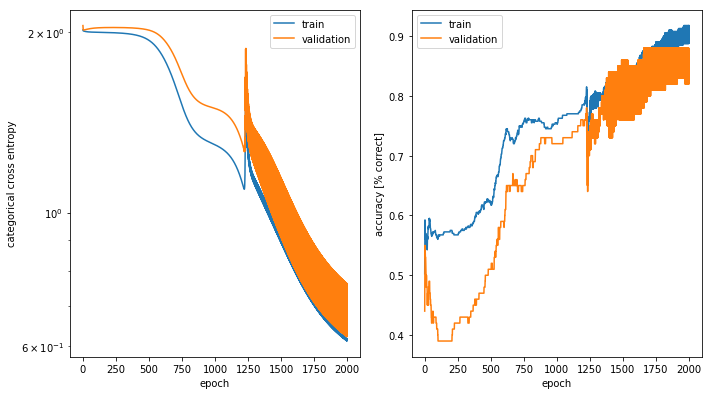

In [34]:
plot_report(report2);

In [35]:
x_test, y_test = generate_grid_data(minn=0, maxx=1, num_of_points_per_dim=51)
test_acc, test_loss, y_pred = model.evaluate(x_test, label2one_hot(y_test, val=-1), return_pred=True)
test_acc, test_loss

(tensor(0.9535), 0.2687545716762543)

points: <class 'numpy.ndarray'> -- points: (2601, 2)


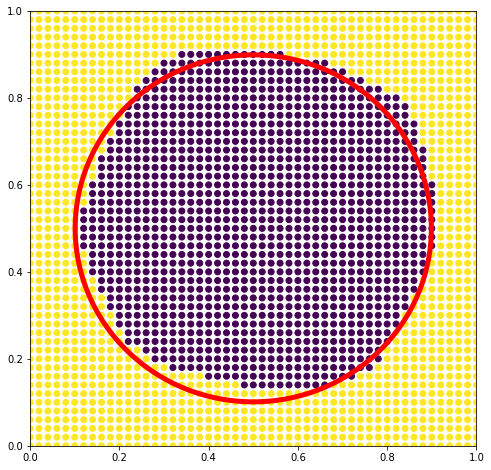

In [36]:
plot_data(x_test, y_pred)